In [1]:
library(readr)
library(mechkar)
library(dplyr)
library(ggplot2)



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [2]:
# general visualisation
library('ggplot2') # visualisation
library('scales') # visualisation
library('grid') # visualisation
library('gridExtra') # visualisation
library('RColorBrewer') # visualisation
library('corrplot') # visualisation

# general data manipulation
library('dplyr') # data manipulation
library('readr') # input/output
library('data.table') # data manipulation
library('tibble') # data wrangling
library('tidyr') # data wrangling
library('stringr') # string manipulation
library('forcats') # factor manipulation

# specific visualisation
library('ggrepel') # visualisation
library('treemapify') # visualisation
library('ggforce') # visualisation
library('ggridges') # visualization

# specific data manipulation
library('broom') # data wrangling
library('purrr') # string manipulation

# Date plus forecast
library('lubridate') # date and time
library(prophet)
library(xgboost)
library(caret)
library('timeDate') # date and time

Warning message:
"package 'scales' was built under R version 4.0.3"

Attaching package: 'scales'


The following object is masked from 'package:readr':

    col_factor


Warning message:
"package 'gridExtra' was built under R version 4.0.3"

Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine


Warning message:
"package 'RColorBrewer' was built under R version 4.0.3"
corrplot 0.84 loaded


Attaching package: 'data.table'


The following objects are masked from 'package:dplyr':

    between, first, last


Warning message:
"package 'stringr' was built under R version 4.0.3"
Warning message:
"package 'forcats' was built under R version 4.0.3"
Warning message:
"package 'ggrepel' was built under R version 4.0.3"
Warning message:
"package 'treemapify' was built under R version 4.0.3"
Warning message:
"package 'ggforce' was built under R version 4.0.3"
Warning message:
"package 'ggridges' was built under R version 4.0.3"
Warning message:
"package

In [3]:
dfitems <- read.csv("C:/Users/Eyal Bijaoui/datascience/project/items.csv")
dfstores <- read.csv("C:/Users/Eyal Bijaoui/datascience/project/stores.csv")
dftransactions <- read.csv("C:/Users/Eyal Bijaoui/datascience/project/transactions.csv")
dfholidays <- read.csv("C:/Users/Eyal Bijaoui/datascience/project/holidays_events.csv")
dfoil <- read.csv("C:/Users/Eyal Bijaoui/datascience/project/oil.csv")


In [5]:
dfseafoodff<-read.csv("C:/Users/Eyal Bijaoui/datascience/project/SEAFOOD_FF_28.12.2020.csv")

In [6]:
head(dfseafoodff)

,ן..YYYYMM,YYYY,MM,store_nbr,item_nbr,sum_of_unitsales,onpromotion,family,class,perishable,...,locale_Salinas,locale_Santo_Domingo,National_Ecuador,Regional_Cotopaxi,Regional_Imbabura,Regional_Santa_Elena,Regional_Santo_Domingo_de_los_Tsachilas,averageoil,maxoil,minoil
,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<int>,<int>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,201301,2013,1,7,695758,244,,SEAFOOD,2802,1,...,0,0,3,0,0,0,0,94.333333,97,92
2,201301,2013,1,6,699745,92,,SEAFOOD,2802,1,...,0,0,3,0,0,0,0,94.333333,97,92
3,201301,2013,1,26,741201,69,,SEAFOOD,2854,1,...,0,0,3,0,0,0,0,94.333333,97,92
4,201301,2013,1,49,252698,331,,SEAFOOD,2806,1,...,0,0,3,0,0,0,0,94.333333,97,92
5,201301,2013,1,23,589403,19,,SEAFOOD,2850,1,...,0,0,3,0,0,0,0,94.333333,97,92
6,201301,2013,1,27,1110679,59,,SEAFOOD,2850,1,...,0,0,3,0,0,0,0,94.333333,97,92


In [7]:
sum(is.na(dfseafoodff))

[1] 0

In [8]:
getMissingness(dfseafoodff)

list(var = character(0), na_count = numeric(0), rate = numeric(0))This dataset has 19336 (100%) complete rows. Original data has 19336 rows.



var,na_count,rate
<chr>,<dbl>,<dbl>


In [9]:
library(data.table)
setnames(dfseafoodff, "ן..YYYYMM", "YYYYMM")
setnames(dfseafoodff, "sum_of_unitsales", "sales")

In [10]:
#Dealing with SQL NULL's

In [11]:
for (col in names(dfseafoodff)) {
  set(dfseafoodff, which(dfseafoodff[[col]]==""), col, NA)
}

In [12]:
for (col in names(dfseafoodff)) {
  set(dfseafoodff, which(dfseafoodff[[col]]=="NULL"), col, NA)
}


In [13]:
sum(is.na(dfseafoodff))

[1] 8843

In [14]:
getMissingness(dfseafoodff)

list(var = c("onpromotion", "averageoil", "maxoil", "minoil", "locale_Ambato", "locale_Cayambe", "locale_Cuenca", "locale_El_Carmen", "locale_Esmeraldas", "locale_Guaranda"), na_count = c(2561, 574, 574, 574, 190, 190, 190, 190, 190, 190), rate = c(13.2, 3, 3, 3, 1, 1, 1, 1, 1, 1))This dataset has 16506 (85.4%) complete rows. Original data has 19336 rows.



var,na_count,rate
<chr>,<dbl>,<dbl>
onpromotion,2561,13.2
averageoil,574,3.0
maxoil,574,3.0
minoil,574,3.0
locale_Ambato,190,1.0
locale_Cayambe,190,1.0
locale_Cuenca,190,1.0
locale_El_Carmen,190,1.0
locale_Esmeraldas,190,1.0


In [733]:
#dfdeliff <- read.csv("C:/Users/Eyal Bijaoui/datascience/project/DELI_FF_26.12.2020.csv")

In [15]:
dim(dfseafoodff)

[1] 19336    42

In [16]:
head(dfseafoodff)

,YYYYMM,YYYY,MM,store_nbr,item_nbr,sales,onpromotion,family,class,perishable,...,locale_Salinas,locale_Santo_Domingo,National_Ecuador,Regional_Cotopaxi,Regional_Imbabura,Regional_Santa_Elena,Regional_Santo_Domingo_de_los_Tsachilas,averageoil,maxoil,minoil
,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<int>,<int>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,201301,2013,1,7,695758,244,NA,SEAFOOD,2802,1,...,0,0,3,0,0,0,0,94.333333,97,92
2,201301,2013,1,6,699745,92,NA,SEAFOOD,2802,1,...,0,0,3,0,0,0,0,94.333333,97,92
3,201301,2013,1,26,741201,69,NA,SEAFOOD,2854,1,...,0,0,3,0,0,0,0,94.333333,97,92
4,201301,2013,1,49,252698,331,NA,SEAFOOD,2806,1,...,0,0,3,0,0,0,0,94.333333,97,92
5,201301,2013,1,23,589403,19,NA,SEAFOOD,2850,1,...,0,0,3,0,0,0,0,94.333333,97,92
6,201301,2013,1,27,1110679,59,NA,SEAFOOD,2850,1,...,0,0,3,0,0,0,0,94.333333,97,92


In [124]:
#summary(dfseafoodff)

In [17]:
colnames(dfseafoodff)

[1] "YYYYMM"                                 
 [2] "YYYY"                                   
 [3] "MM"                                     
 [4] "store_nbr"                              
 [5] "item_nbr"                               
 [6] "sales"                                  
 [7] "onpromotion"                            
 [8] "family"                                 
 [9] "class"                                  
[10] "perishable"                             
[11] "city"                                   
[12] "state"                                  
[13] "store_type"                             
[14] "cluster"                                
[15] "sumtaransactions"                       
[16] "locale_Ambato"                          
[17] "locale_Cayambe"                         
[18] "locale_Cuenca"                          
[19] "locale_El_Carmen"                       
[20] "locale_Esmeraldas"                      
[21] "locale_Guaranda"                        
[22] "locale_Guayaquil"                       
[23] "locale_Ibarra"                          
[24] "locale_Latacunga"                       
[25] "locale_Libertad"                        
[26] "locale_Loja"                            
[27] "locale_Machala"                         
[28] "locale_Manta"                           
[29] "locale_Puyo"                            
[30] "locale_Quevedo"                         
[31] "locale_Quito"                           
[32] "locale_Riobamba"                        
[33] "locale_Salinas"                         
[34] "locale_Santo_Domingo"                   
[35] "National_Ecuador"                       
[36] "Regional_Cotopaxi"                      
[37] "Regional_Imbabura"                      
[38] "Regional_Santa_Elena"                   
[39] "Regional_Santo_Domingo_de_los_Tsachilas"
[40] "averageoil"                             
[41] "maxoil"                                 
[42] "minoil"

In [18]:
#### Change char to factor

In [19]:
dfseafoodff[] <- lapply( dfseafoodff, factor) 

In [20]:
dfseafoodff$sales<-as.numeric(dfseafoodff$sales)
dfseafoodff$averageoil<-as.numeric(dfseafoodff$averageoil)
dfseafoodff$maxoil<-as.numeric(dfseafoodff$maxoil)
dfseafoodff$minoil<-as.numeric(dfseafoodff$minoil)
dfseafoodff$sumtaransactions<-as.numeric(dfseafoodff$sumtaransactions)
dfseafoodff$National_Ecuador<-as.numeric(dfseafoodff$National_Ecuador)

In [21]:
# Dealing with holidays >2 as 1 which represent holidays (2or 3)

library(plyr)
revalue(dfseafoodff$locale_Cuenca, c("2" = "1")) -> dfseafoodff$locale_Cuenca
#levels(dfseafoodff$locale_Cuenca)[2] <- '1'

levels(dfseafoodff$locale_Guayaquil)[2] <- '1'
levels(dfseafoodff$locale_Guayaquil)[3] <- '1'
levels(dfseafoodff$locale_Quito)[2] <- '1'

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: 'plyr'


The following object is masked from 'package:purrr':

    compact


The following objects are masked from 'package:dplyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize




In [22]:
#A magnitude 7.8 earthquake struck Ecuador on April 16, 2016
dfseafoodff$EQ_Impact <- 0
dfseafoodff$EQ_Impact[dfseafoodff$YYYYMM=='201604'] <-1              
dfseafoodff$EQ_Impact[dfseafoodff$YYYYMM=='201605'] <-1
dfseafoodff$EQ_Impact <-as.factor(dfseafoodff$EQ_Impact)
summary(dfseafoodff$EQ_Impact)

0     1 
18528   808

In [23]:
for(v in names(dfseafoodff)) {
  if(is.character(dfseafoodff[[v]])==TRUE) {
    df[[v]] <- factor(dfseafoodff[[v]])
  }
}

In [24]:
class(dfseafoodff[])

[1] "data.frame"

In [72]:
#head(dfseafoodff)

In [73]:
#glimpse(dfseafoodff)

In [25]:
df<-dfseafoodff


In [26]:
### characters
strlst <- NULL
numlst <- NULL
for (v in names(df)) {
    if(typeof(df[[v]])=='character' | is.factor(df[[v]])) {
        strlst <- c(strlst,v) 
    } else {
        numlst <- c(numlst, v)
    }
}
strlst
numlst

[1] "YYYYMM"                                 
 [2] "YYYY"                                   
 [3] "MM"                                     
 [4] "store_nbr"                              
 [5] "item_nbr"                               
 [6] "onpromotion"                            
 [7] "family"                                 
 [8] "class"                                  
 [9] "perishable"                             
[10] "city"                                   
[11] "state"                                  
[12] "store_type"                             
[13] "cluster"                                
[14] "locale_Ambato"                          
[15] "locale_Cayambe"                         
[16] "locale_Cuenca"                          
[17] "locale_El_Carmen"                       
[18] "locale_Esmeraldas"                      
[19] "locale_Guaranda"                        
[20] "locale_Guayaquil"                       
[21] "locale_Ibarra"                          
[22] "locale_Latacunga"                       
[23] "locale_Libertad"                        
[24] "locale_Loja"                            
[25] "locale_Machala"                         
[26] "locale_Manta"                           
[27] "locale_Puyo"                            
[28] "locale_Quevedo"                         
[29] "locale_Quito"                           
[30] "locale_Riobamba"                        
[31] "locale_Salinas"                         
[32] "locale_Santo_Domingo"                   
[33] "Regional_Cotopaxi"                      
[34] "Regional_Imbabura"                      
[35] "Regional_Santa_Elena"                   
[36] "Regional_Santo_Domingo_de_los_Tsachilas"
[37] "EQ_Impact"

[1] "sales"            "sumtaransactions" "National_Ecuador" "averageoil"      
[5] "maxoil"           "minoil"

In [27]:
summary(df)

     YYYYMM        YYYY            MM         store_nbr        item_nbr   
 201704 :  471   2013:1965   8      :1815   3      :  649   1247036:3435  
 201705 :  465   2014:3616   7      :1811   2      :  643   589403 :2845  
 201703 :  463   2015:5104   6      :1715   6      :  643   695758 :2433  
 201707 :  449   2016:5064   5      :1682   45     :  641   741201 :2400  
 201601 :  447   2017:3587   4      :1665   48     :  641   1110679:2378  
 201702 :  446               3      :1653   47     :  638   804098 :2174  
 (Other):16595               (Other):8995   (Other):15481   (Other):3671  
     sales       onpromotion      family       class      perishable
 Min.   :  1.0   False:8689   SEAFOOD:19336   2802:4282   1:19336   
 1st Qu.: 17.0   True :8086                   2806:1822             
 Median : 47.0   NA's :2561                   2850:5223             
 Mean   :101.9                                2854:4574             
 3rd Qu.:123.0                                2864:3435

In [28]:
nm <- names(df)
nm

[1] "YYYYMM"                                 
 [2] "YYYY"                                   
 [3] "MM"                                     
 [4] "store_nbr"                              
 [5] "item_nbr"                               
 [6] "sales"                                  
 [7] "onpromotion"                            
 [8] "family"                                 
 [9] "class"                                  
[10] "perishable"                             
[11] "city"                                   
[12] "state"                                  
[13] "store_type"                             
[14] "cluster"                                
[15] "sumtaransactions"                       
[16] "locale_Ambato"                          
[17] "locale_Cayambe"                         
[18] "locale_Cuenca"                          
[19] "locale_El_Carmen"                       
[20] "locale_Esmeraldas"                      
[21] "locale_Guaranda"                        
[22] "locale_Guayaquil"                       
[23] "locale_Ibarra"                          
[24] "locale_Latacunga"                       
[25] "locale_Libertad"                        
[26] "locale_Loja"                            
[27] "locale_Machala"                         
[28] "locale_Manta"                           
[29] "locale_Puyo"                            
[30] "locale_Quevedo"                         
[31] "locale_Quito"                           
[32] "locale_Riobamba"                        
[33] "locale_Salinas"                         
[34] "locale_Santo_Domingo"                   
[35] "National_Ecuador"                       
[36] "Regional_Cotopaxi"                      
[37] "Regional_Imbabura"                      
[38] "Regional_Santa_Elena"                   
[39] "Regional_Santo_Domingo_de_los_Tsachilas"
[40] "averageoil"                             
[41] "maxoil"                                 
[42] "minoil"                                 
[43] "EQ_Impact"

In [29]:
###EDA

In [30]:
head(df)

,YYYYMM,YYYY,MM,store_nbr,item_nbr,sales,onpromotion,family,class,perishable,...,locale_Santo_Domingo,National_Ecuador,Regional_Cotopaxi,Regional_Imbabura,Regional_Santa_Elena,Regional_Santo_Domingo_de_los_Tsachilas,averageoil,maxoil,minoil,EQ_Impact
,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,...,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<fct>
1,201301,2013,1,7,695758,246,NA,SEAFOOD,2802,1,...,0,7,0,0,0,0,42,22,24,0
2,201301,2013,1,6,699745,94,NA,SEAFOOD,2802,1,...,0,7,0,0,0,0,42,22,24,0
3,201301,2013,1,26,741201,71,NA,SEAFOOD,2854,1,...,0,7,0,0,0,0,42,22,24,0
4,201301,2013,1,49,252698,333,NA,SEAFOOD,2806,1,...,0,7,0,0,0,0,42,22,24,0
5,201301,2013,1,23,589403,21,NA,SEAFOOD,2850,1,...,0,7,0,0,0,0,42,22,24,0
6,201301,2013,1,27,1110679,61,NA,SEAFOOD,2850,1,...,0,7,0,0,0,0,42,22,24,0


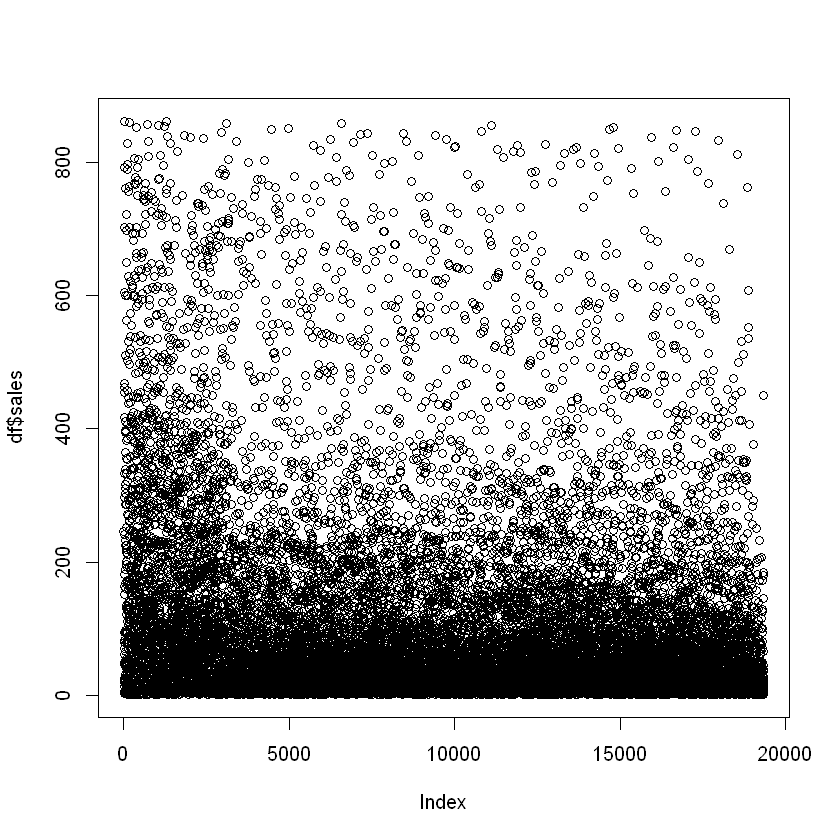

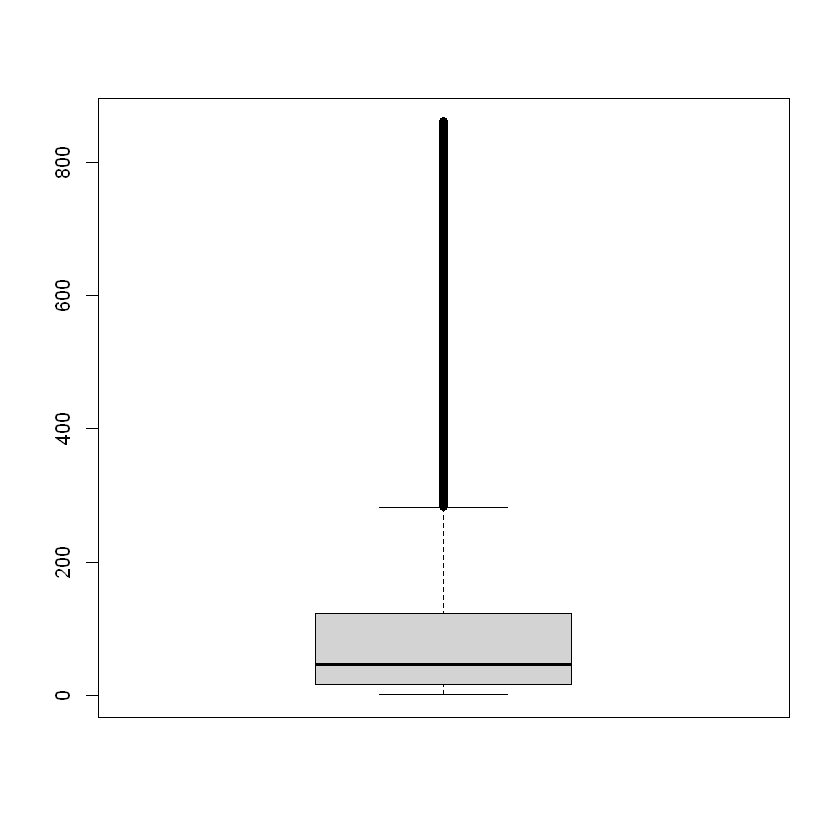

In [31]:
plot(df$sales)
boxplot(df$sales)

In [32]:
df$log_sales <- log(df$sales+1)

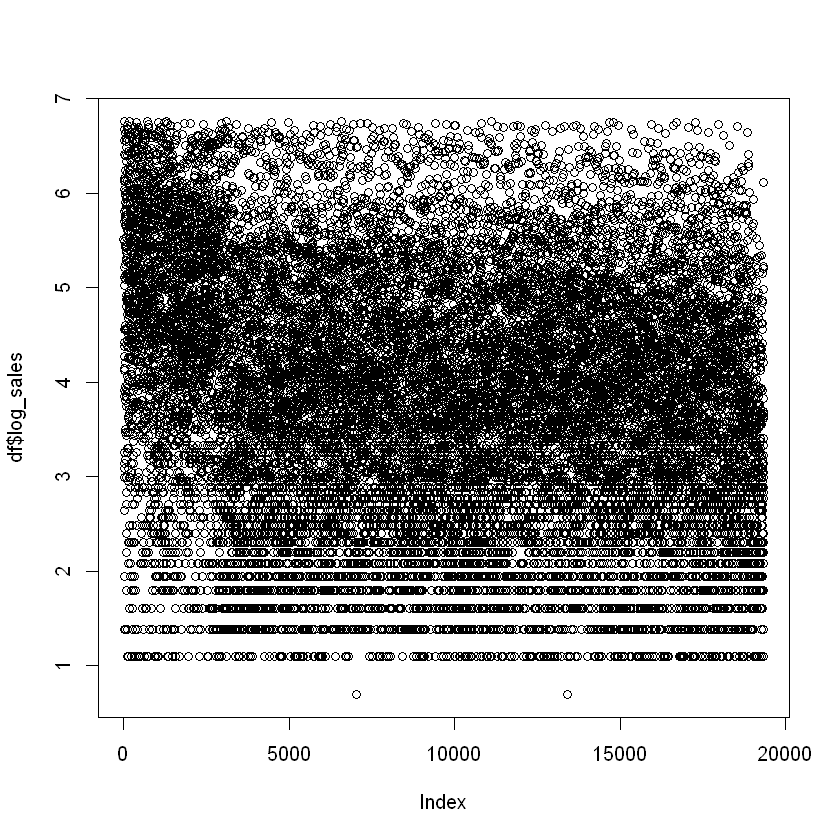

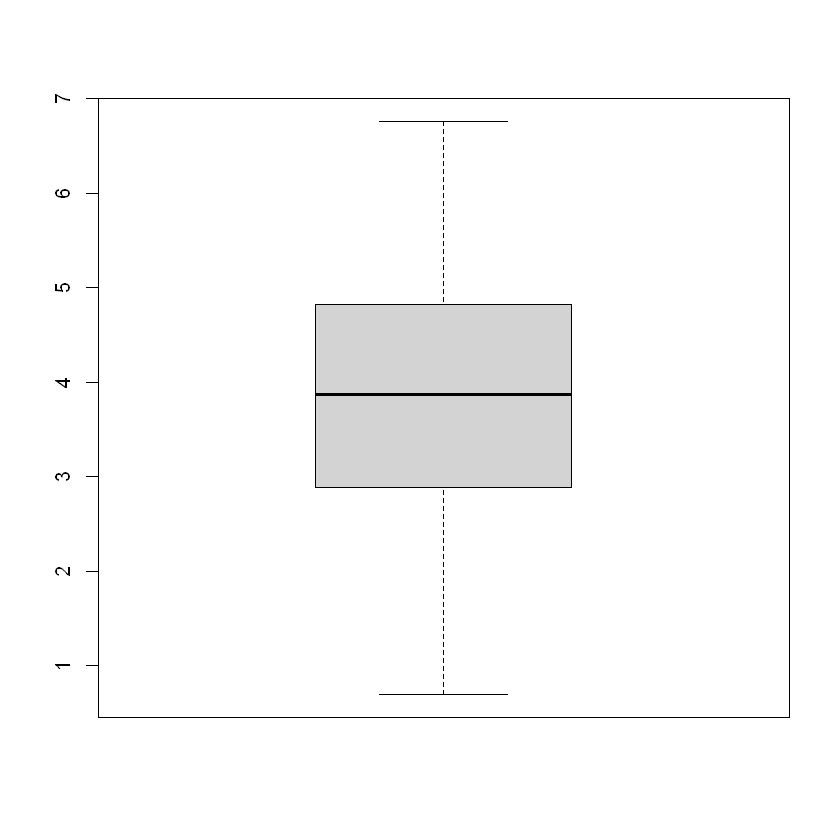

In [33]:
plot(df$log_sales)
boxplot(df$log_sales)

In [34]:
summary(df$log_sales)
summary(df$sales)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.6931  2.8904  3.8712  3.8476  4.8203  6.7604 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0    17.0    47.0   101.9   123.0   862.0 

In [35]:
df1<-df

In [36]:
head(df1)

,YYYYMM,YYYY,MM,store_nbr,item_nbr,sales,onpromotion,family,class,perishable,...,National_Ecuador,Regional_Cotopaxi,Regional_Imbabura,Regional_Santa_Elena,Regional_Santo_Domingo_de_los_Tsachilas,averageoil,maxoil,minoil,EQ_Impact,log_sales
,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,...,<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
1,201301,2013,1,7,695758,246,NA,SEAFOOD,2802,1,...,7,0,0,0,0,42,22,24,0,5.509388
2,201301,2013,1,6,699745,94,NA,SEAFOOD,2802,1,...,7,0,0,0,0,42,22,24,0,4.553877
3,201301,2013,1,26,741201,71,NA,SEAFOOD,2854,1,...,7,0,0,0,0,42,22,24,0,4.276666
4,201301,2013,1,49,252698,333,NA,SEAFOOD,2806,1,...,7,0,0,0,0,42,22,24,0,5.811141
5,201301,2013,1,23,589403,21,NA,SEAFOOD,2850,1,...,7,0,0,0,0,42,22,24,0,3.091042
6,201301,2013,1,27,1110679,61,NA,SEAFOOD,2850,1,...,7,0,0,0,0,42,22,24,0,4.127134


In [37]:
###         Remove YYYYMM, Sales (Y- because making a transformation LogY ) ,Family= Seafood Columns and Perishable ### 
df1<-df1[,-c(1,6,8,10)]

In [38]:
head(df1)

,YYYY,MM,store_nbr,item_nbr,onpromotion,class,city,state,store_type,cluster,...,National_Ecuador,Regional_Cotopaxi,Regional_Imbabura,Regional_Santa_Elena,Regional_Santo_Domingo_de_los_Tsachilas,averageoil,maxoil,minoil,EQ_Impact,log_sales
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,...,<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
1,2013,1,7,695758,NA,2802,Quito,Pichincha,D,8,...,7,0,0,0,0,42,22,24,0,5.509388
2,2013,1,6,699745,NA,2802,Quito,Pichincha,D,13,...,7,0,0,0,0,42,22,24,0,4.553877
3,2013,1,26,741201,NA,2854,Guayaquil,Guayas,D,10,...,7,0,0,0,0,42,22,24,0,4.276666
4,2013,1,49,252698,NA,2806,Quito,Pichincha,A,11,...,7,0,0,0,0,42,22,24,0,5.811141
5,2013,1,23,589403,NA,2850,Ambato,Tungurahua,D,9,...,7,0,0,0,0,42,22,24,0,3.091042
6,2013,1,27,1110679,NA,2850,Daule,Guayas,D,1,...,7,0,0,0,0,42,22,24,0,4.127134


In [39]:
### characters
strlst1 <- NULL
numlst1 <- NULL
for (v in names(df1)) {
    if(typeof(df1[[v]])=='character' | is.factor(df1[[v]])) {
        strlst1 <- c(strlst1,v) 
    } else {
        numlst1 <- c(numlst1, v)
    }
}
strlst1
numlst1

[1] "YYYY"                                   
 [2] "MM"                                     
 [3] "store_nbr"                              
 [4] "item_nbr"                               
 [5] "onpromotion"                            
 [6] "class"                                  
 [7] "city"                                   
 [8] "state"                                  
 [9] "store_type"                             
[10] "cluster"                                
[11] "locale_Ambato"                          
[12] "locale_Cayambe"                         
[13] "locale_Cuenca"                          
[14] "locale_El_Carmen"                       
[15] "locale_Esmeraldas"                      
[16] "locale_Guaranda"                        
[17] "locale_Guayaquil"                       
[18] "locale_Ibarra"                          
[19] "locale_Latacunga"                       
[20] "locale_Libertad"                        
[21] "locale_Loja"                            
[22] "locale_Machala"                         
[23] "locale_Manta"                           
[24] "locale_Puyo"                            
[25] "locale_Quevedo"                         
[26] "locale_Quito"                           
[27] "locale_Riobamba"                        
[28] "locale_Salinas"                         
[29] "locale_Santo_Domingo"                   
[30] "Regional_Cotopaxi"                      
[31] "Regional_Imbabura"                      
[32] "Regional_Santa_Elena"                   
[33] "Regional_Santo_Domingo_de_los_Tsachilas"
[34] "EQ_Impact"

[1] "sumtaransactions" "National_Ecuador" "averageoil"       "maxoil"          
[5] "minoil"           "log_sales"

In [40]:
###      Remove Variables Storenbr(45) and City (22) with # levels>20 for table1 and explore data     ###
###      Remove Perishable Varaiables with only 1 lecel = 1      #####
df2 <- df1[ ,-c(3,7) ]
head(df2)

,YYYY,MM,item_nbr,onpromotion,class,state,store_type,cluster,sumtaransactions,locale_Ambato,...,National_Ecuador,Regional_Cotopaxi,Regional_Imbabura,Regional_Santa_Elena,Regional_Santo_Domingo_de_los_Tsachilas,averageoil,maxoil,minoil,EQ_Impact,log_sales
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,...,<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
1,2013,1,695758,NA,2802,Pichincha,D,8,1652,0,...,7,0,0,0,0,42,22,24,0,5.509388
2,2013,1,699745,NA,2802,Pichincha,D,13,1796,0,...,7,0,0,0,0,42,22,24,0,4.553877
3,2013,1,741201,NA,2854,Guayas,D,10,308,0,...,7,0,0,0,0,42,22,24,0,4.276666
4,2013,1,252698,NA,2806,Pichincha,A,11,1927,0,...,7,0,0,0,0,42,22,24,0,5.811141
5,2013,1,589403,NA,2850,Tungurahua,D,9,808,0,...,7,0,0,0,0,42,22,24,0,3.091042
6,2013,1,1110679,NA,2850,Guayas,D,1,778,0,...,7,0,0,0,0,42,22,24,0,4.127134


In [41]:
tab2 <- Table1(data=df2)
dftab2<-data.frame(tab2)
dftab2

Warning message in Table1(data = df2):
"The following variables have unique values and will not be included in the analysis: "


  |======================================================================| 100%

Warning message:
"The `x` argument of `as_tibble.matrix()` must have unique column names if `.name_repair` is omitted as of tibble 2.0.0.
Using compatibility `.name_repair`.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated."


V1,V2,Pop
<chr>,<chr>,<chr>
Variables,Categories,Population
Individuals,n,19336
YYYY,2013,"1,965 (10.2%)"
YYYY,2014,"3,616 (18.7%)"
YYYY,2015,"5,104 (26.4%)"
YYYY,2016,"5,064 (26.2%)"
YYYY,2017,"3,587 (18.6%)"
MM,1,"1,610 (8.3%)"
MM,2,"1,650 (8.5%)"


In [42]:
tab2[tab2$V1 == 'locale_Cuenca',]
tab2[tab2$V1 == 'locale_Guayaquil',]
tab2[tab2$V1 == 'locale_Quito',]




V1,V2,Pop
<chr>,<chr>,<chr>
locale_Cuenca,0,"17,481 (91.3%)"
locale_Cuenca,1,"1,665 (8.7%)"


V1,V2,Pop
<chr>,<chr>,<chr>
locale_Guayaquil,0,"17,335 (90.5%)"
locale_Guayaquil,1,"1,811 (9.5%)"


V1,V2,Pop
<chr>,<chr>,<chr>
locale_Quito,0,"17,712 (92.5%)"
locale_Quito,1,"1,434 (7.5%)"


In [43]:
nm2 <- names(df2)
nm2

[1] "YYYY"                                   
 [2] "MM"                                     
 [3] "item_nbr"                               
 [4] "onpromotion"                            
 [5] "class"                                  
 [6] "state"                                  
 [7] "store_type"                             
 [8] "cluster"                                
 [9] "sumtaransactions"                       
[10] "locale_Ambato"                          
[11] "locale_Cayambe"                         
[12] "locale_Cuenca"                          
[13] "locale_El_Carmen"                       
[14] "locale_Esmeraldas"                      
[15] "locale_Guaranda"                        
[16] "locale_Guayaquil"                       
[17] "locale_Ibarra"                          
[18] "locale_Latacunga"                       
[19] "locale_Libertad"                        
[20] "locale_Loja"                            
[21] "locale_Machala"                         
[22] "locale_Manta"                           
[23] "locale_Puyo"                            
[24] "locale_Quevedo"                         
[25] "locale_Quito"                           
[26] "locale_Riobamba"                        
[27] "locale_Salinas"                         
[28] "locale_Santo_Domingo"                   
[29] "National_Ecuador"                       
[30] "Regional_Cotopaxi"                      
[31] "Regional_Imbabura"                      
[32] "Regional_Santa_Elena"                   
[33] "Regional_Santo_Domingo_de_los_Tsachilas"
[34] "averageoil"                             
[35] "maxoil"                                 
[36] "minoil"                                 
[37] "EQ_Impact"                              
[38] "log_sales"

In [44]:
## check each of the variable statistics
for (n in nm2[3:length(nm2)-1]) {
    print(n)
    print(tab2[tab2$V1 == n,])
}

[1] "MM"
# A tibble: 12 x 3
   V1    V2    Pop         
   <chr> <chr> <chr>       
 1 MM    1     1,610 (8.3%)
 2 MM    2     1,650 (8.5%)
 3 MM    3     1,653 (8.5%)
 4 MM    4     1,665 (8.6%)
 5 MM    5     1,682 (8.7%)
 6 MM    6     1,715 (8.9%)
 7 MM    7     1,811 (9.4%)
 8 MM    8     1,815 (9.4%)
 9 MM    9     1,417 (7.3%)
10 MM    10    1,449 (7.5%)
11 MM    11    1,435 (7.4%)
12 MM    12    1,434 (7.4%)
[1] "item_nbr"
# A tibble: 8 x 3
  V1       V2      Pop          
  <chr>    <chr>   <chr>        
1 item_nbr 252698  1,822 (9.4%) 
2 item_nbr 589403  2,845 (14.7%)
3 item_nbr 695758  2,433 (12.6%)
4 item_nbr 699745  1,849 (9.6%) 
5 item_nbr 741201  2,400 (12.4%)
6 item_nbr 804098  2,174 (11.2%)
7 item_nbr 1110679 2,378 (12.3%)
8 item_nbr 1247036 3,435 (17.8%)
[1] "onpromotion"
# A tibble: 2 x 3
  V1          V2    Pop          
  <chr>       <chr> <chr>        
1 onpromotion False 8,689 (51.8%)
2 onpromotion True  8,086 (48.2%)
[1] "class"
# A tibble: 5 x 3
  V1    V2    P

In [ ]:
# Back to df1

In [ ]:
#Distribution of variables and Relationship with the outcome

In [45]:
suppressWarnings(mechkar::exploreData(data=df1, y="log_sales"))

  |                                                                      |   0%

`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

`geom_smooth()` using formula 'y ~ x'



  |====================================================================  |  98%

In [277]:
exploreData(data=df1)

  |====================================================================  |  98%

In [761]:
nm1 <- names(df1)
nm1

[1] "YYYY"                                   
 [2] "MM"                                     
 [3] "store_nbr"                              
 [4] "item_nbr"                               
 [5] "onpromotion"                            
 [6] "class"                                  
 [7] "city"                                   
 [8] "state"                                  
 [9] "store_type"                             
[10] "cluster"                                
[11] "sumtaransactions"                       
[12] "locale_Ambato"                          
[13] "locale_Cayambe"                         
[14] "locale_Cuenca"                          
[15] "locale_El_Carmen"                       
[16] "locale_Esmeraldas"                      
[17] "locale_Guaranda"                        
[18] "locale_Guayaquil"                       
[19] "locale_Ibarra"                          
[20] "locale_Latacunga"                       
[21] "locale_Libertad"                        
[22] "locale_Loja"                            
[23] "locale_Machala"                         
[24] "locale_Manta"                           
[25] "locale_Puyo"                            
[26] "locale_Quevedo"                         
[27] "locale_Quito"                           
[28] "locale_Riobamba"                        
[29] "locale_Salinas"                         
[30] "locale_Santo_Domingo"                   
[31] "National_Ecuador"                       
[32] "Regional_Cotopaxi"                      
[33] "Regional_Imbabura"                      
[34] "Regional_Santa_Elena"                   
[35] "Regional_Santo_Domingo_de_los_Tsachilas"
[36] "averageoil"                             
[37] "maxoil"                                 
[38] "minoil"                                 
[39] "EQ_Impact"                              
[40] "log_sales"

In [46]:
exploreData(data.frame(df1),factorSize =3, y="log_sales") #dir="C:/Users/Eyal Bijaoui/datascience"

  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 190 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 574 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 574 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 574 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'



  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'



  |====================================================================  |  98%

In [ ]:
#Review the relationship between the categorical values

In [ ]:
# Check log_sales vs. Factor variables dist

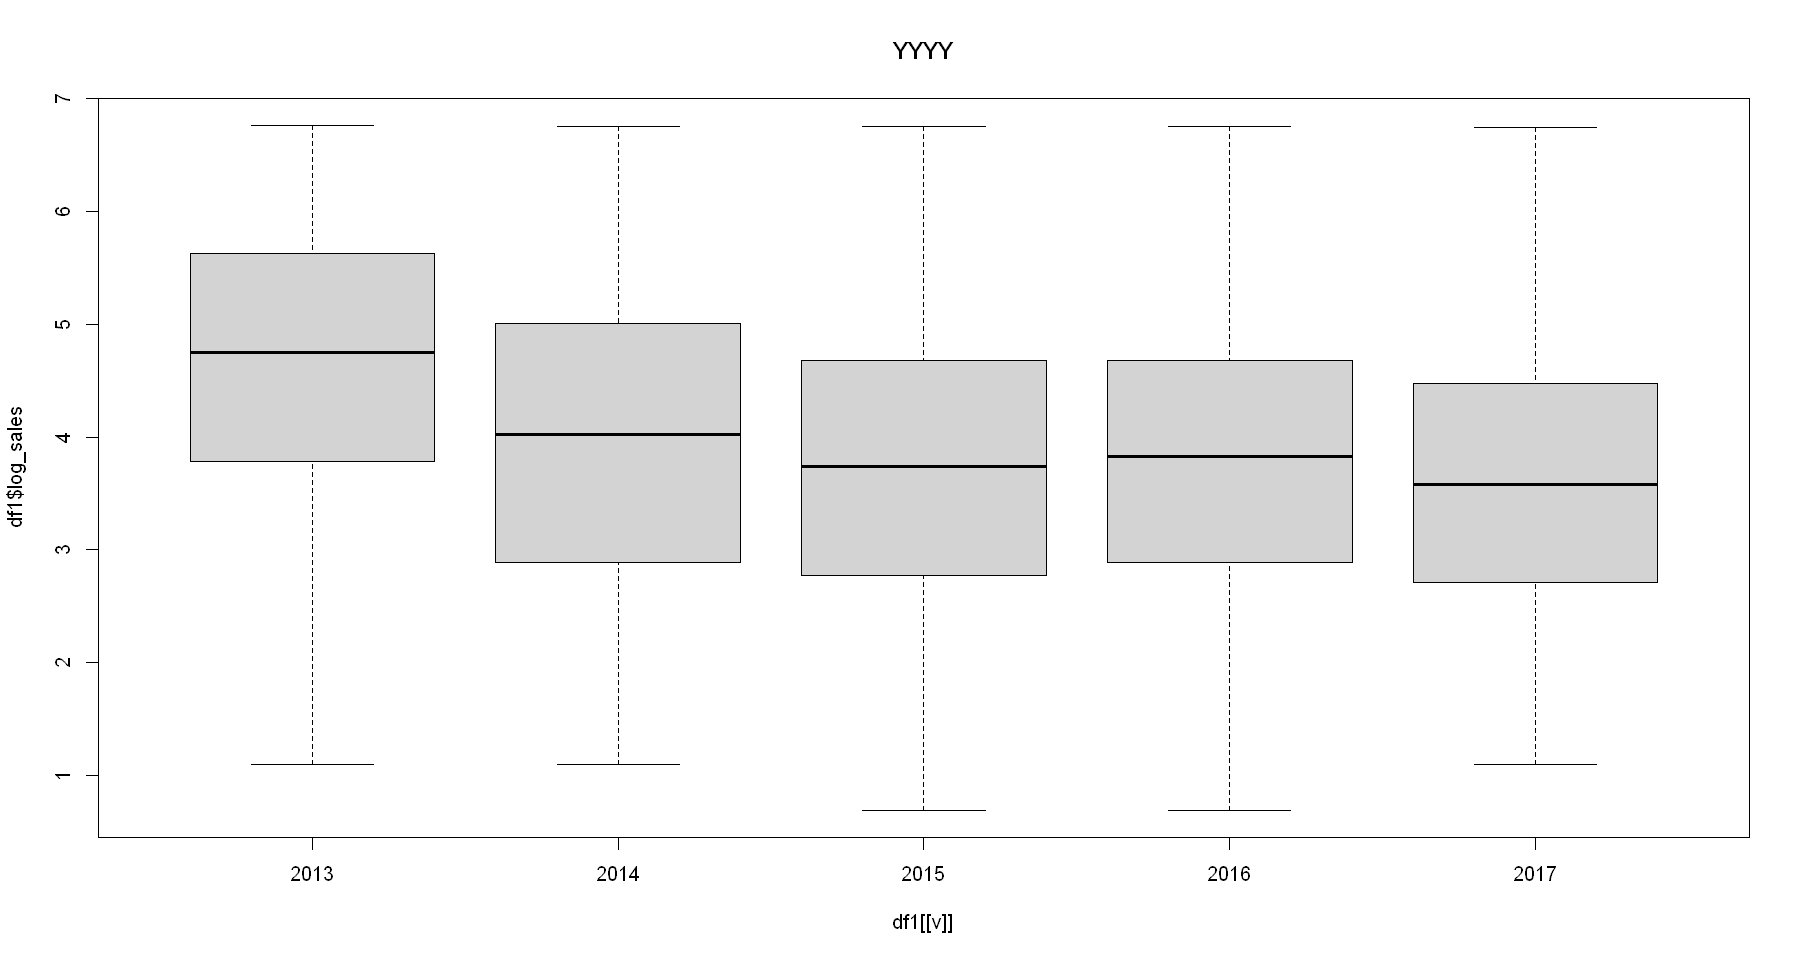

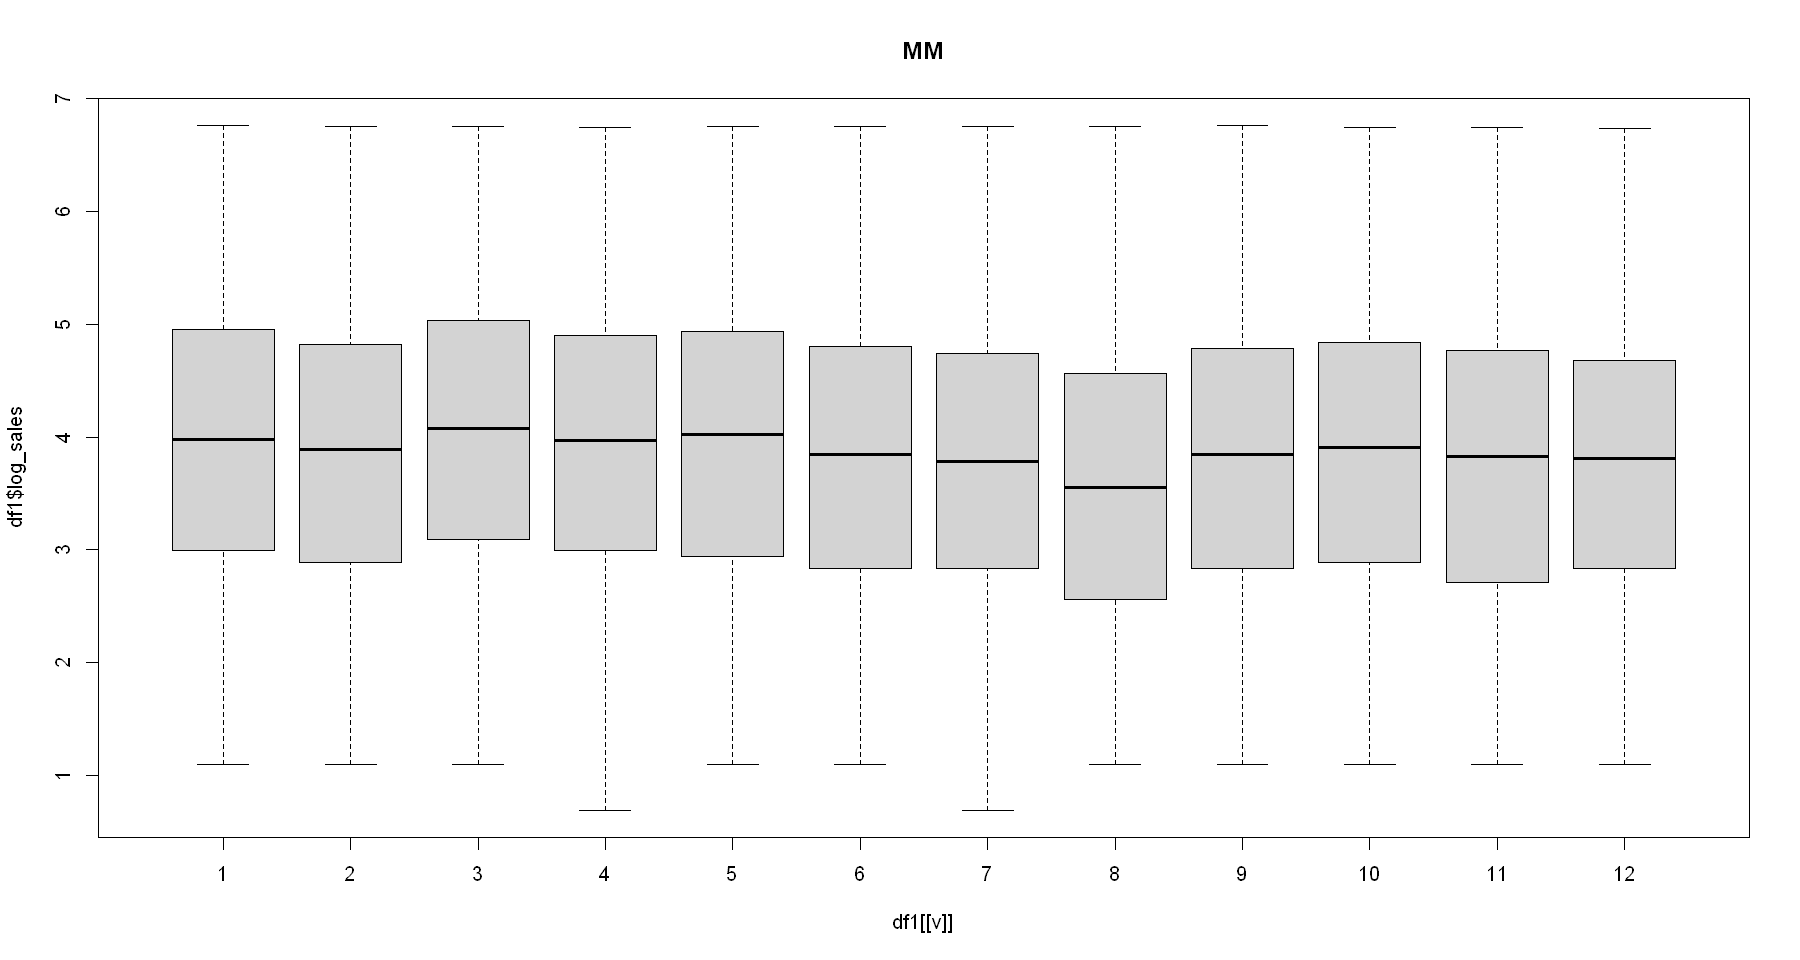

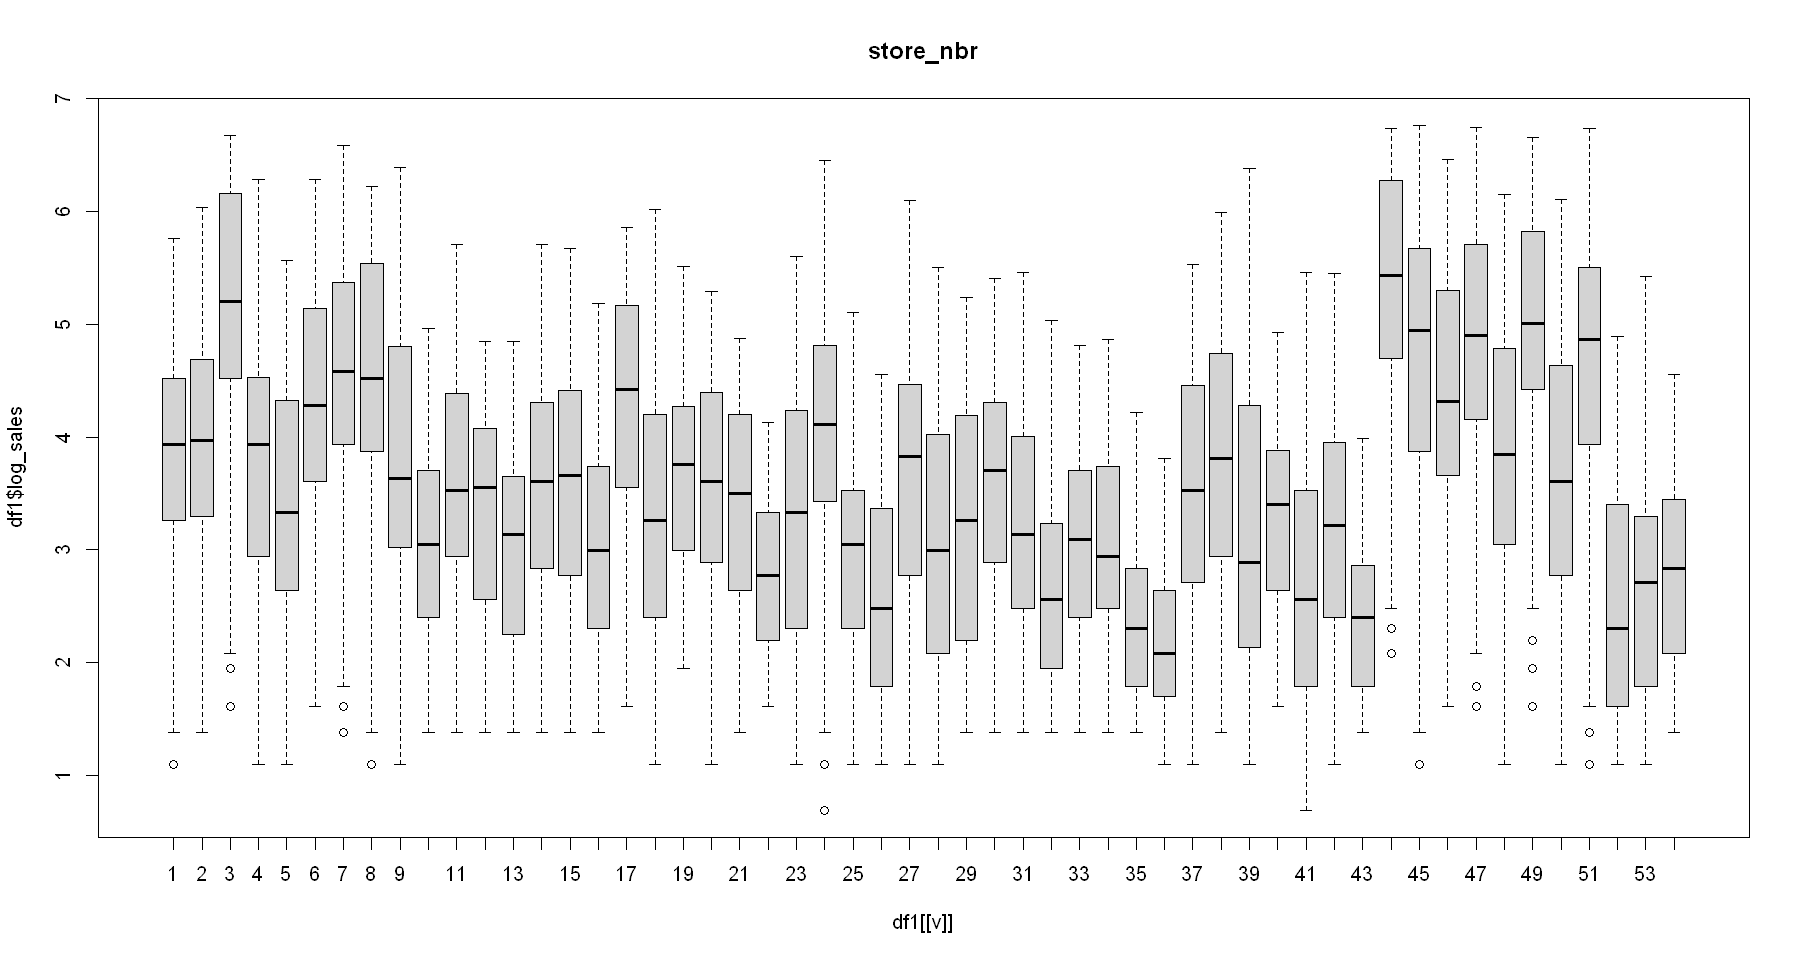

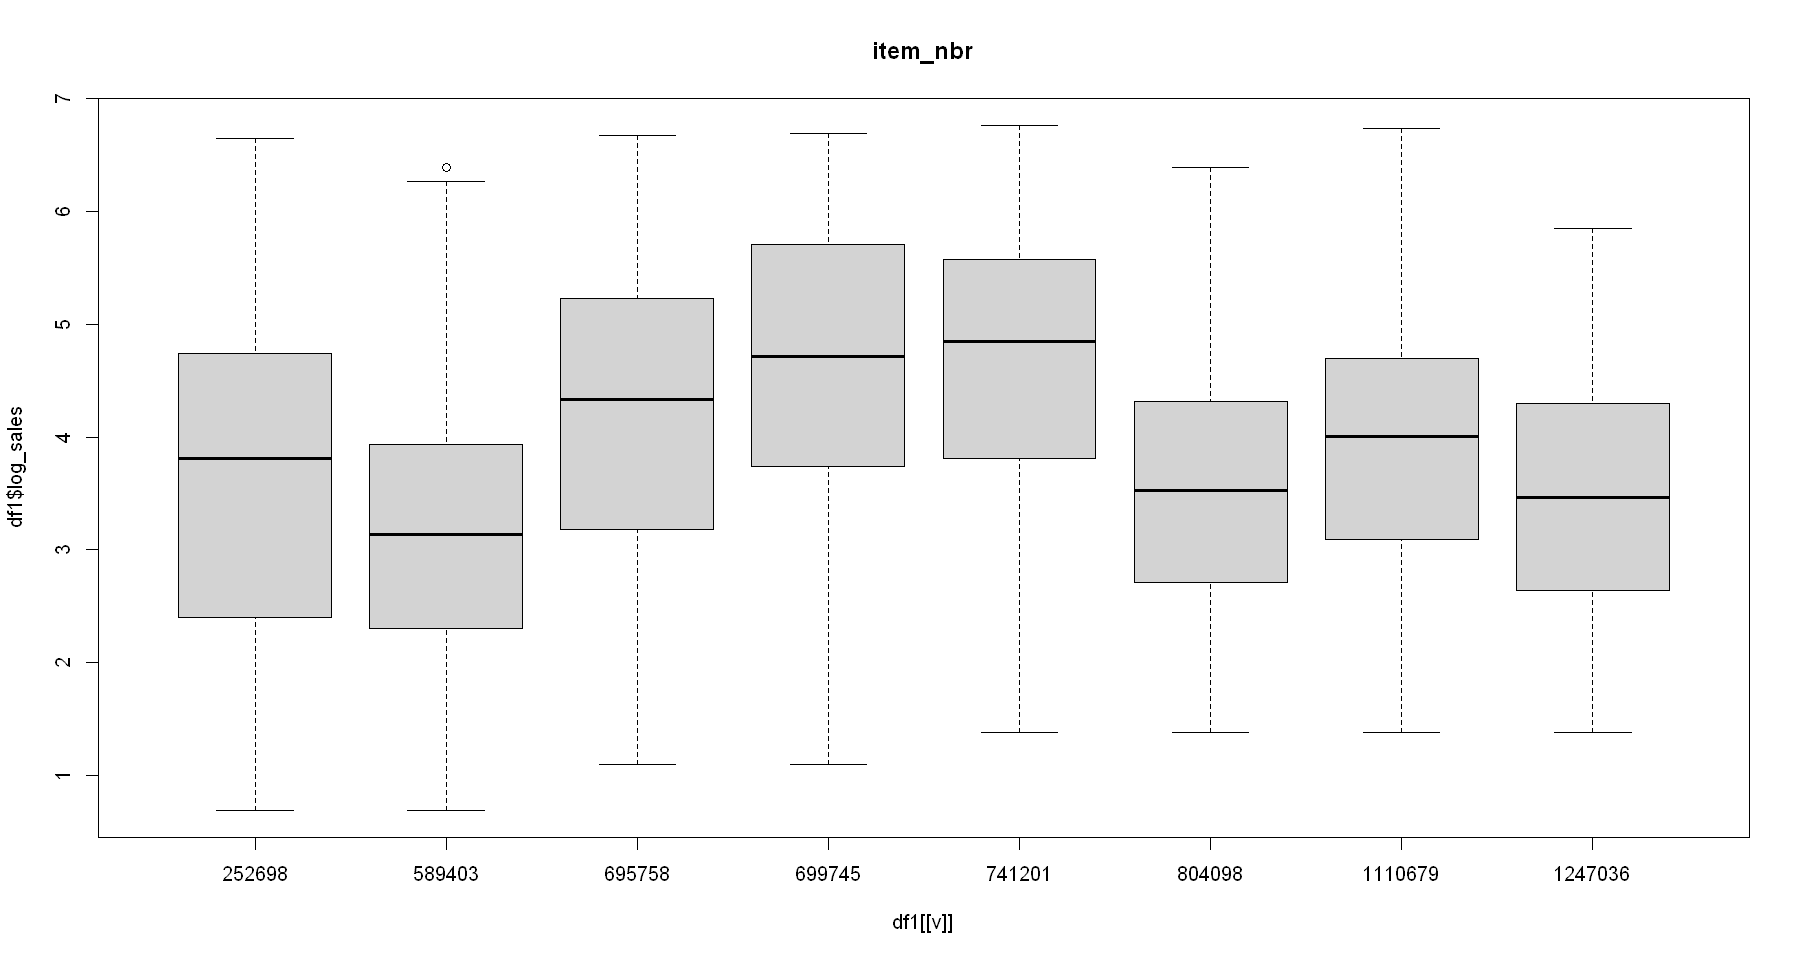

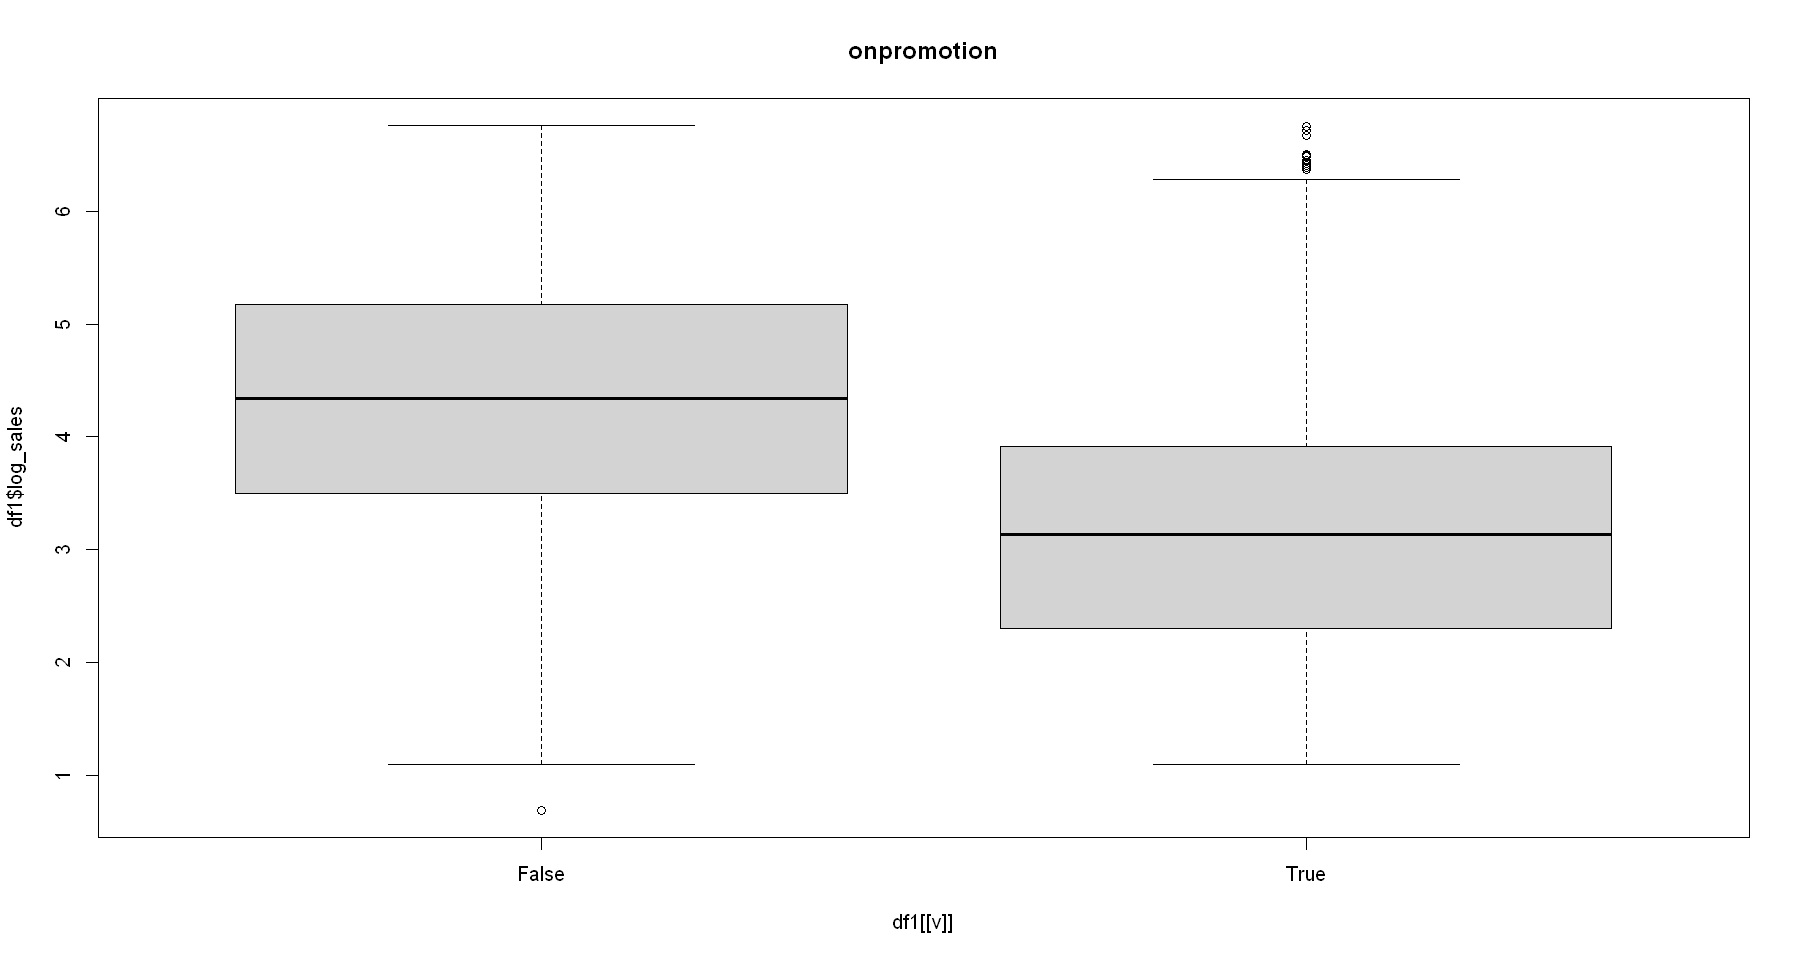

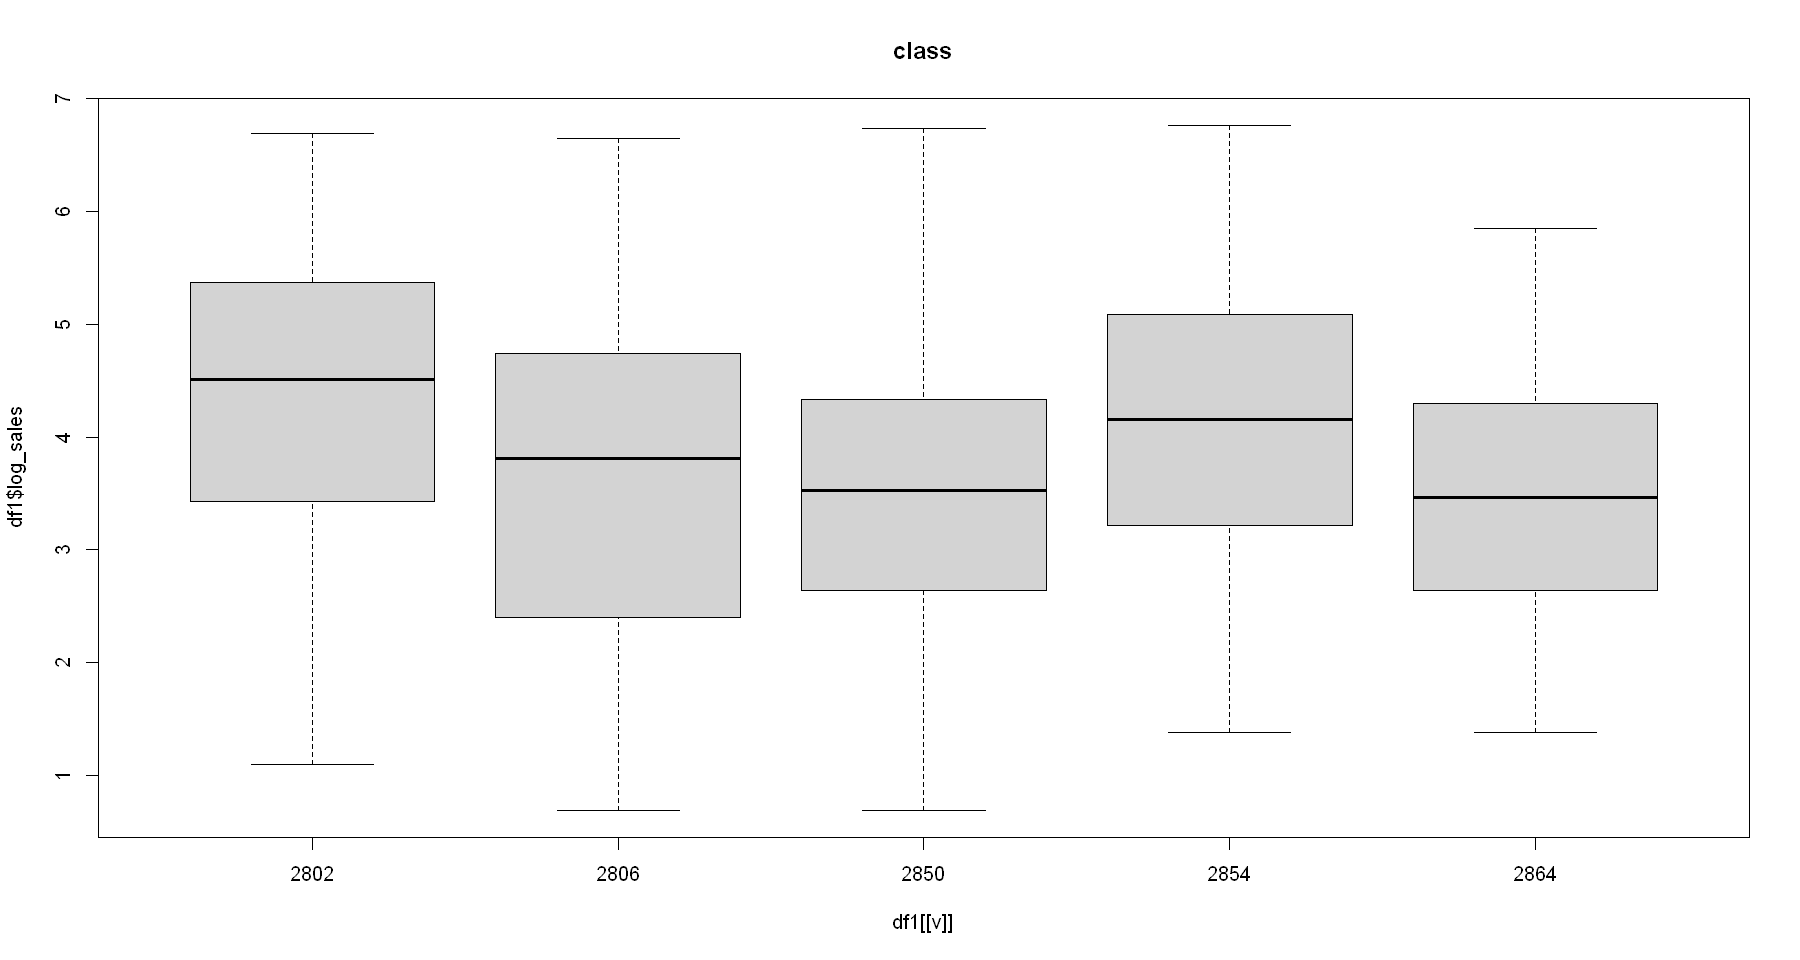

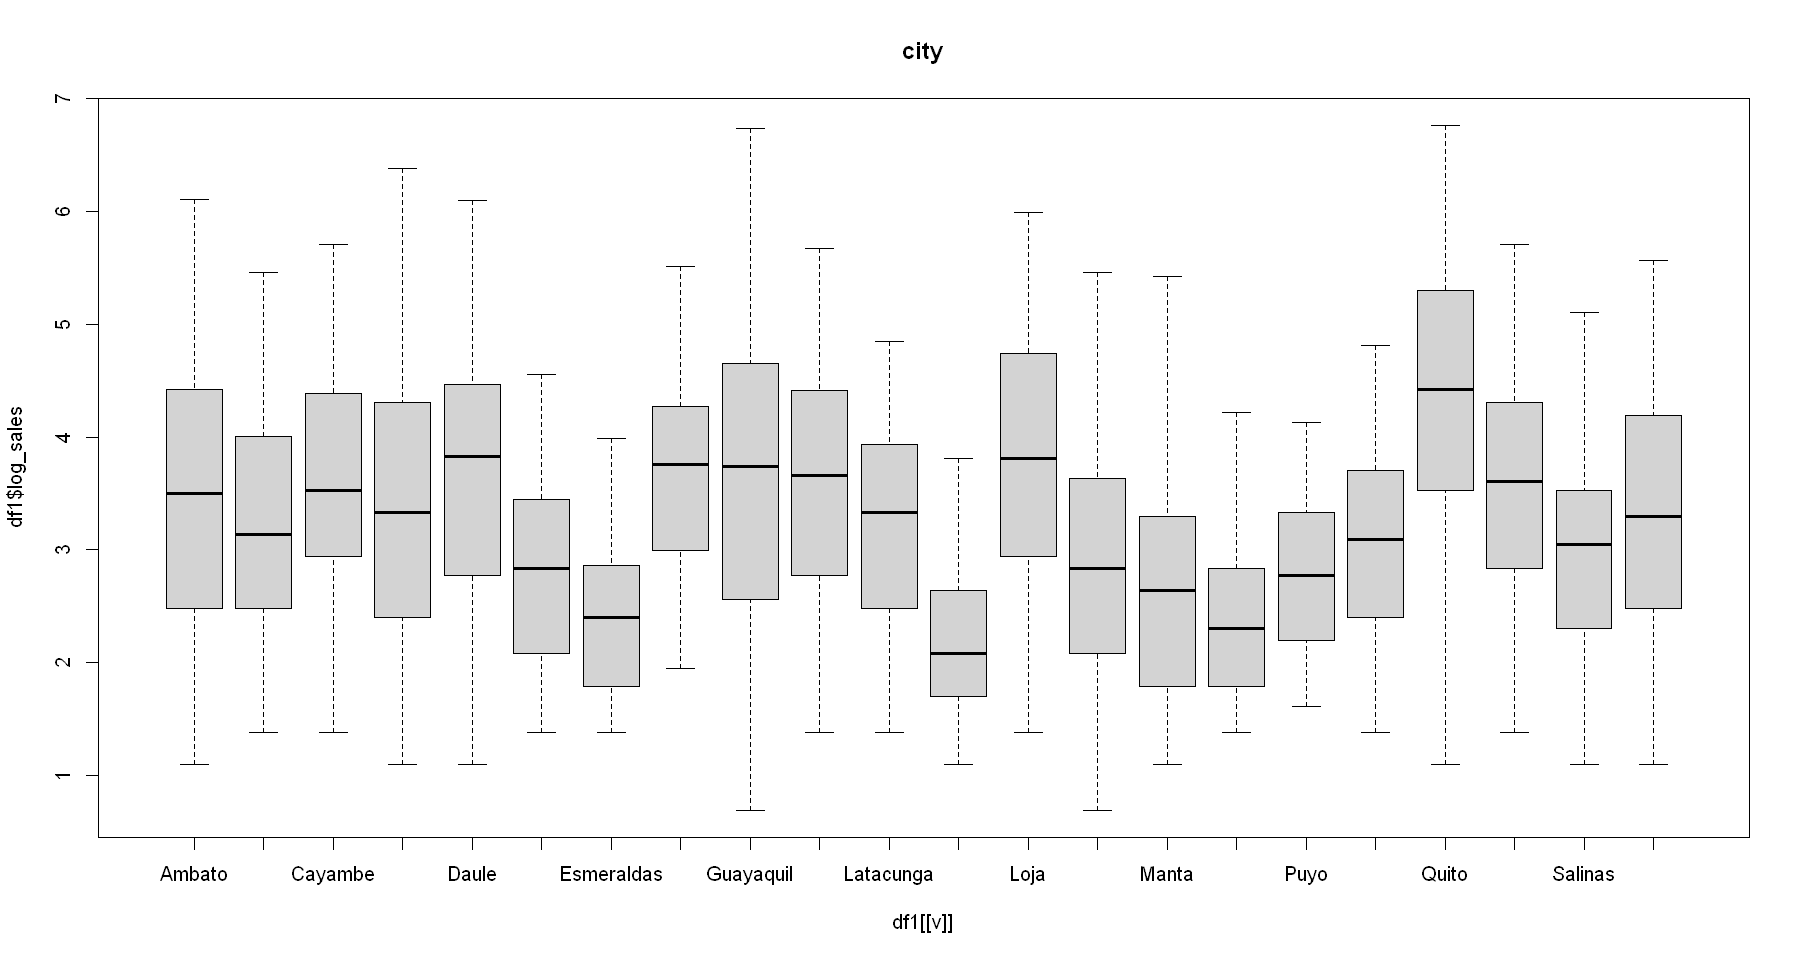

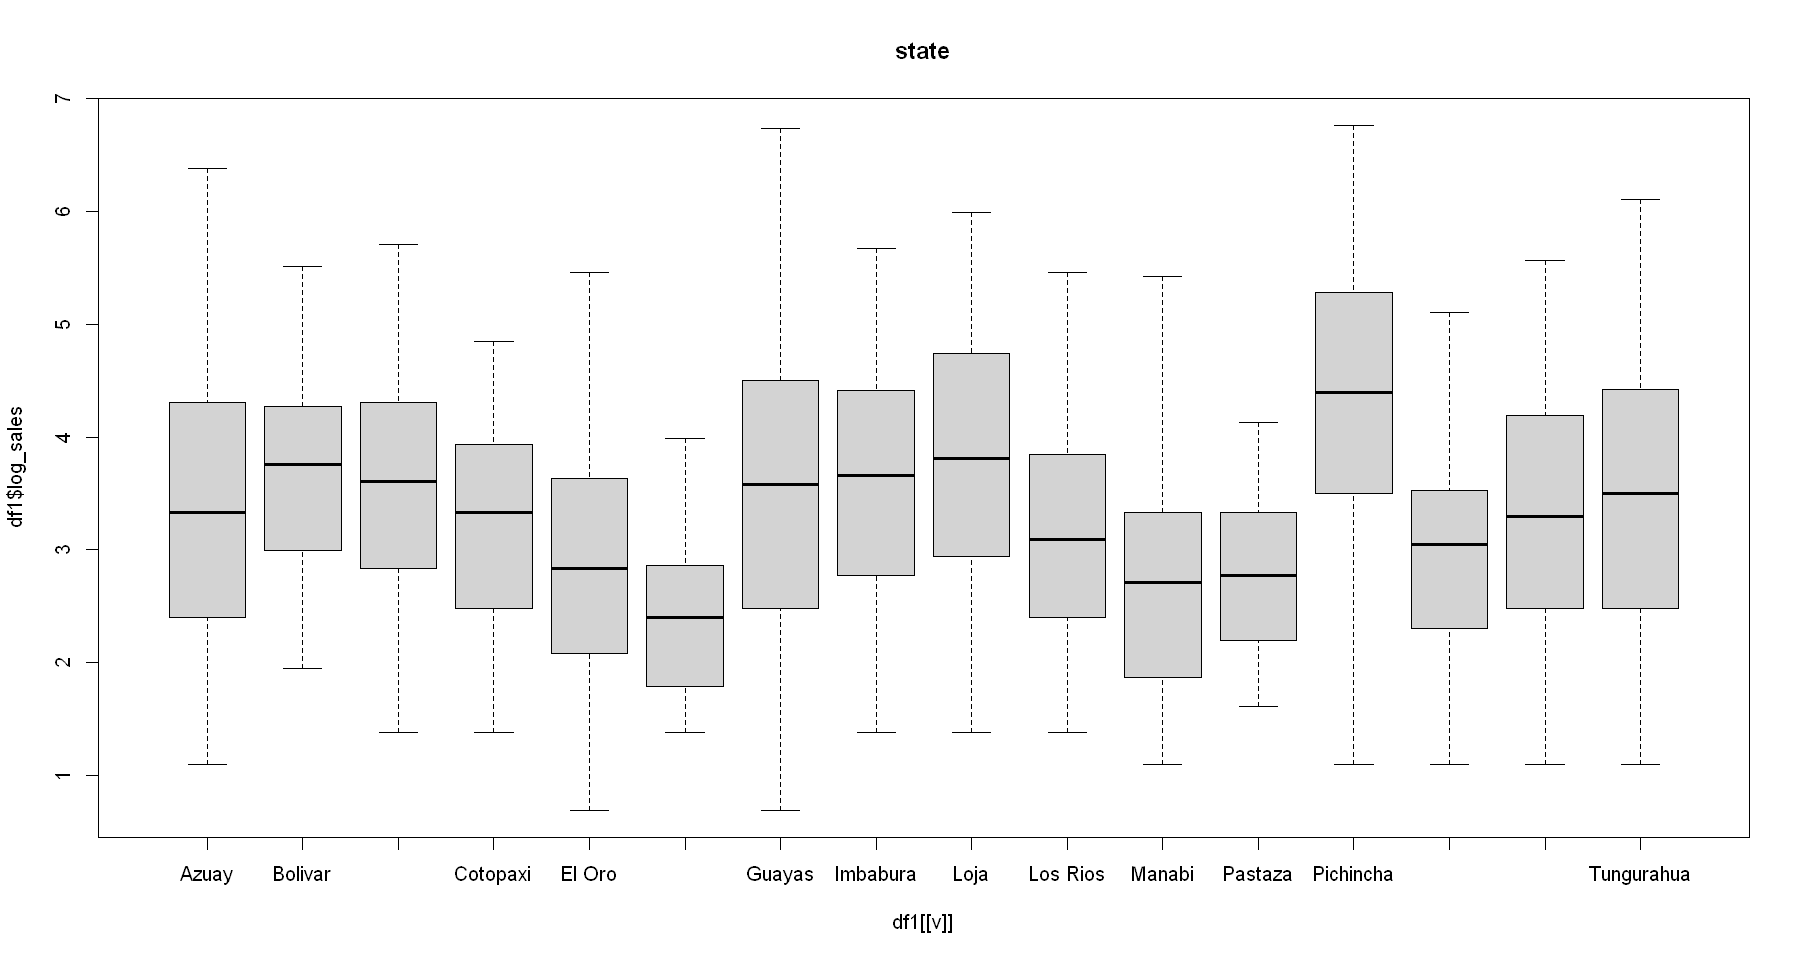

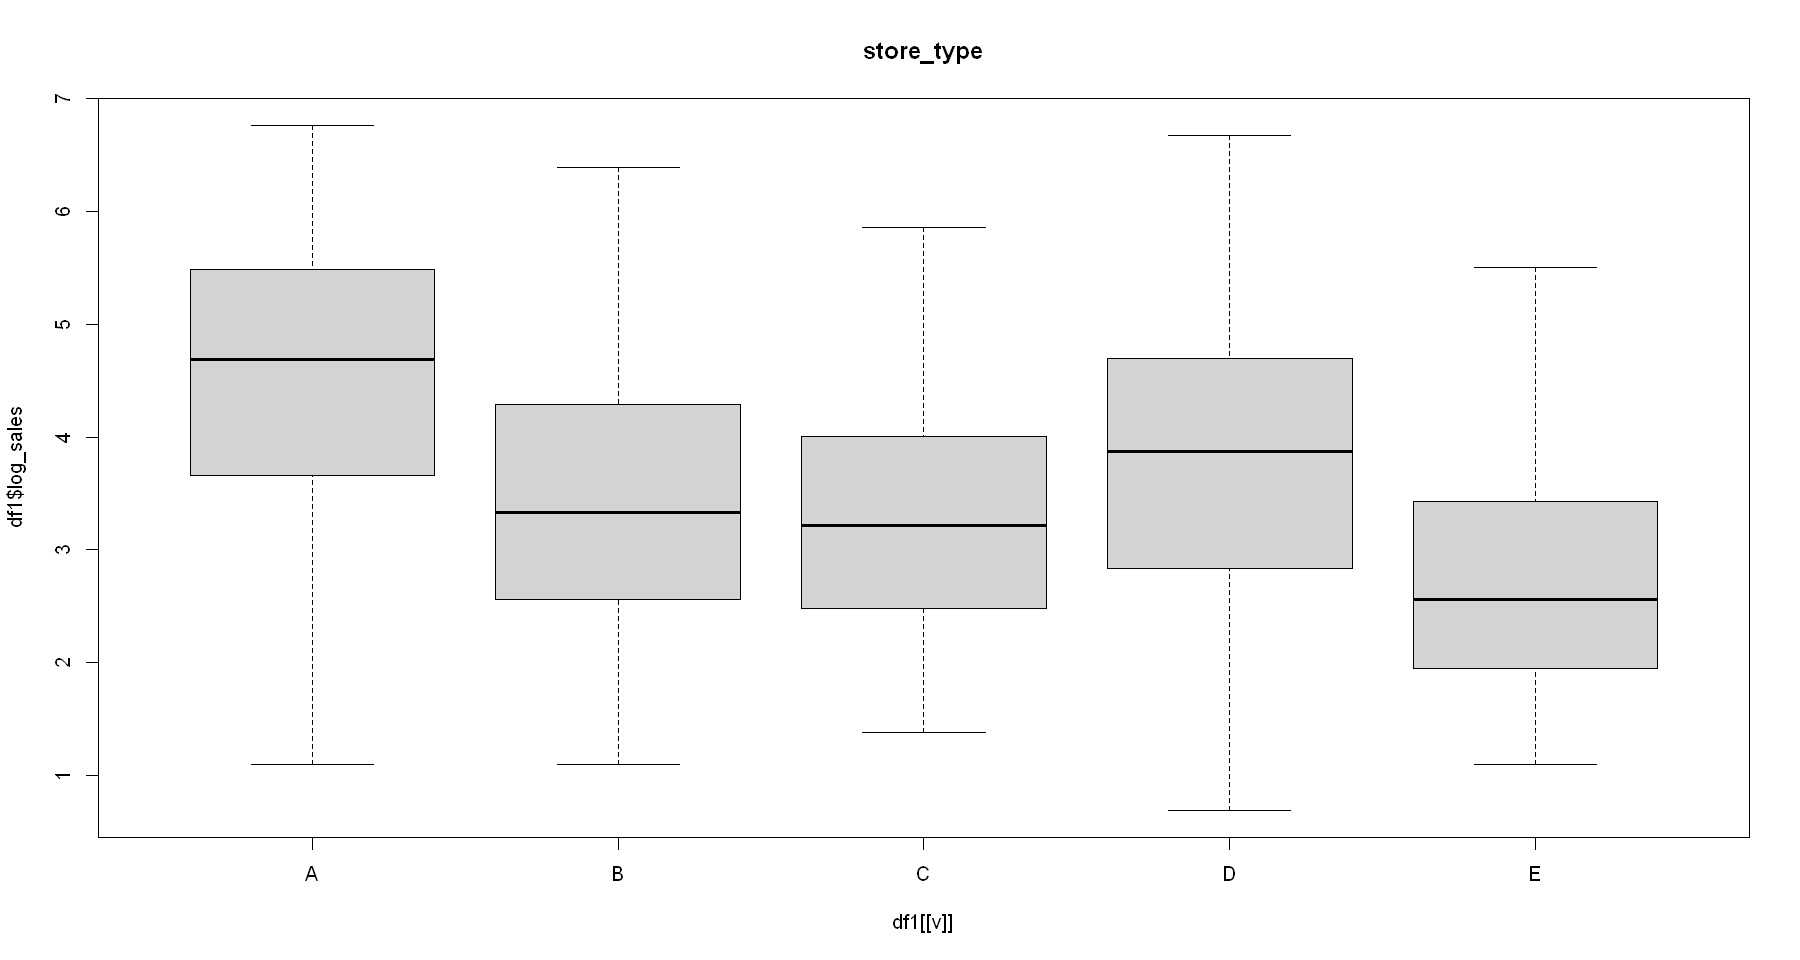

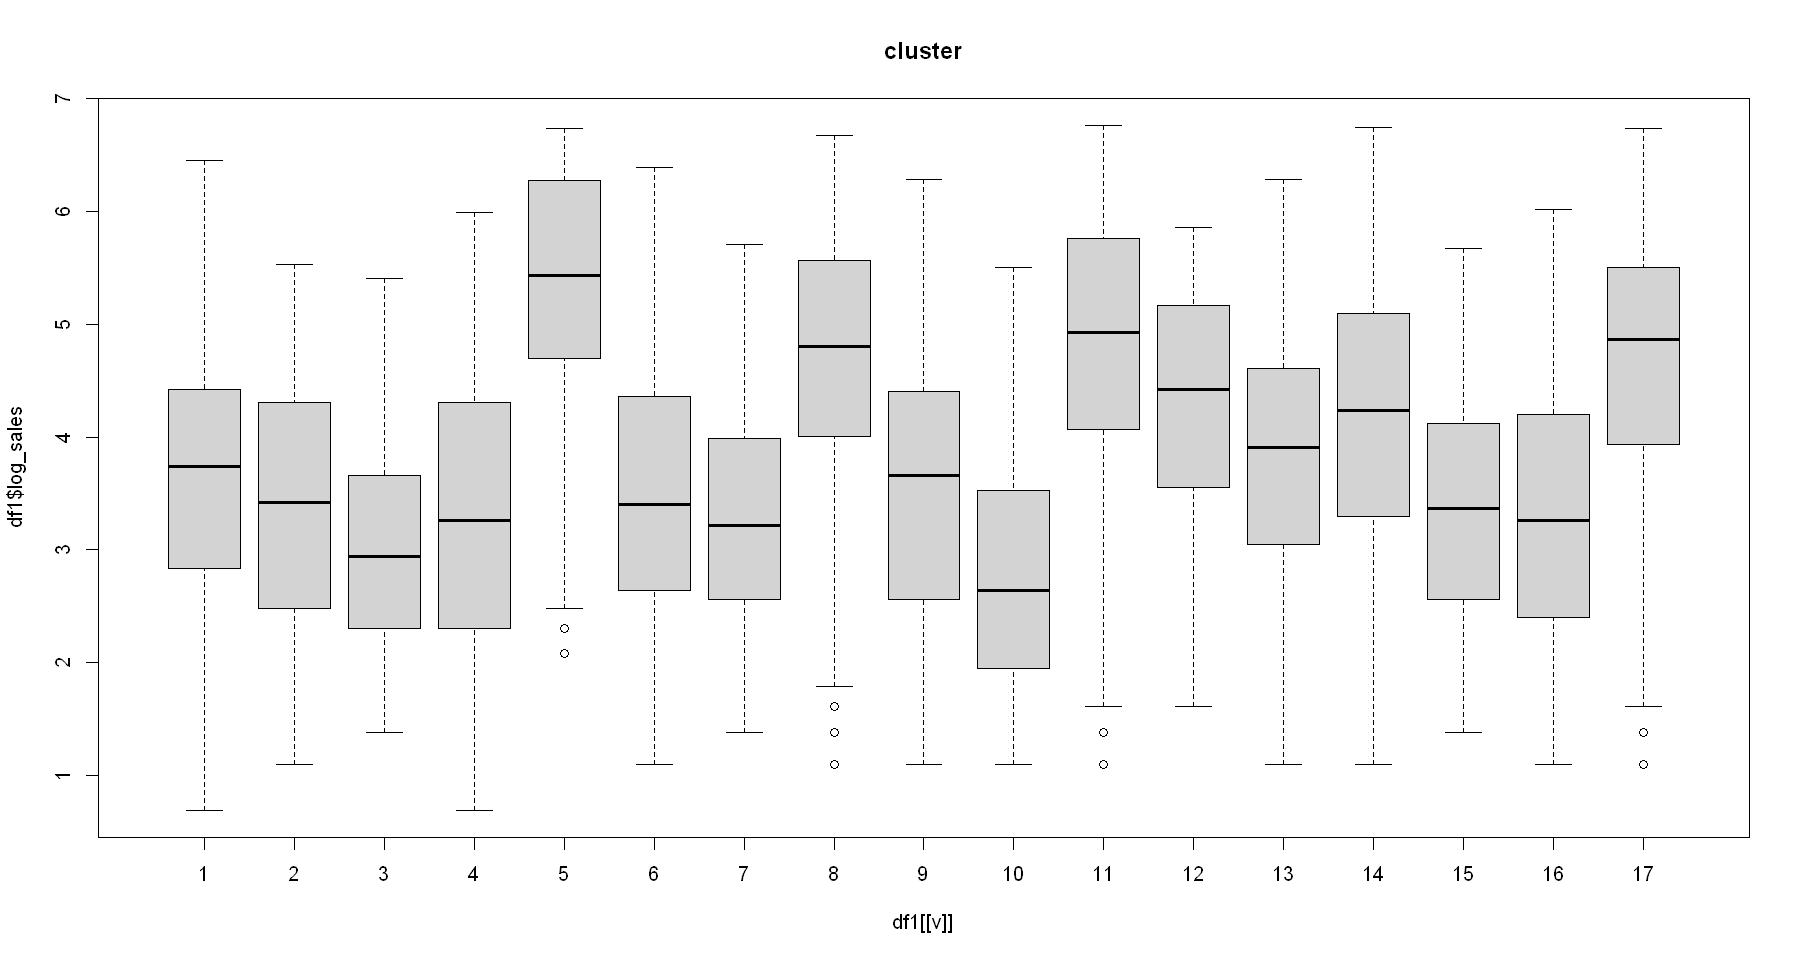

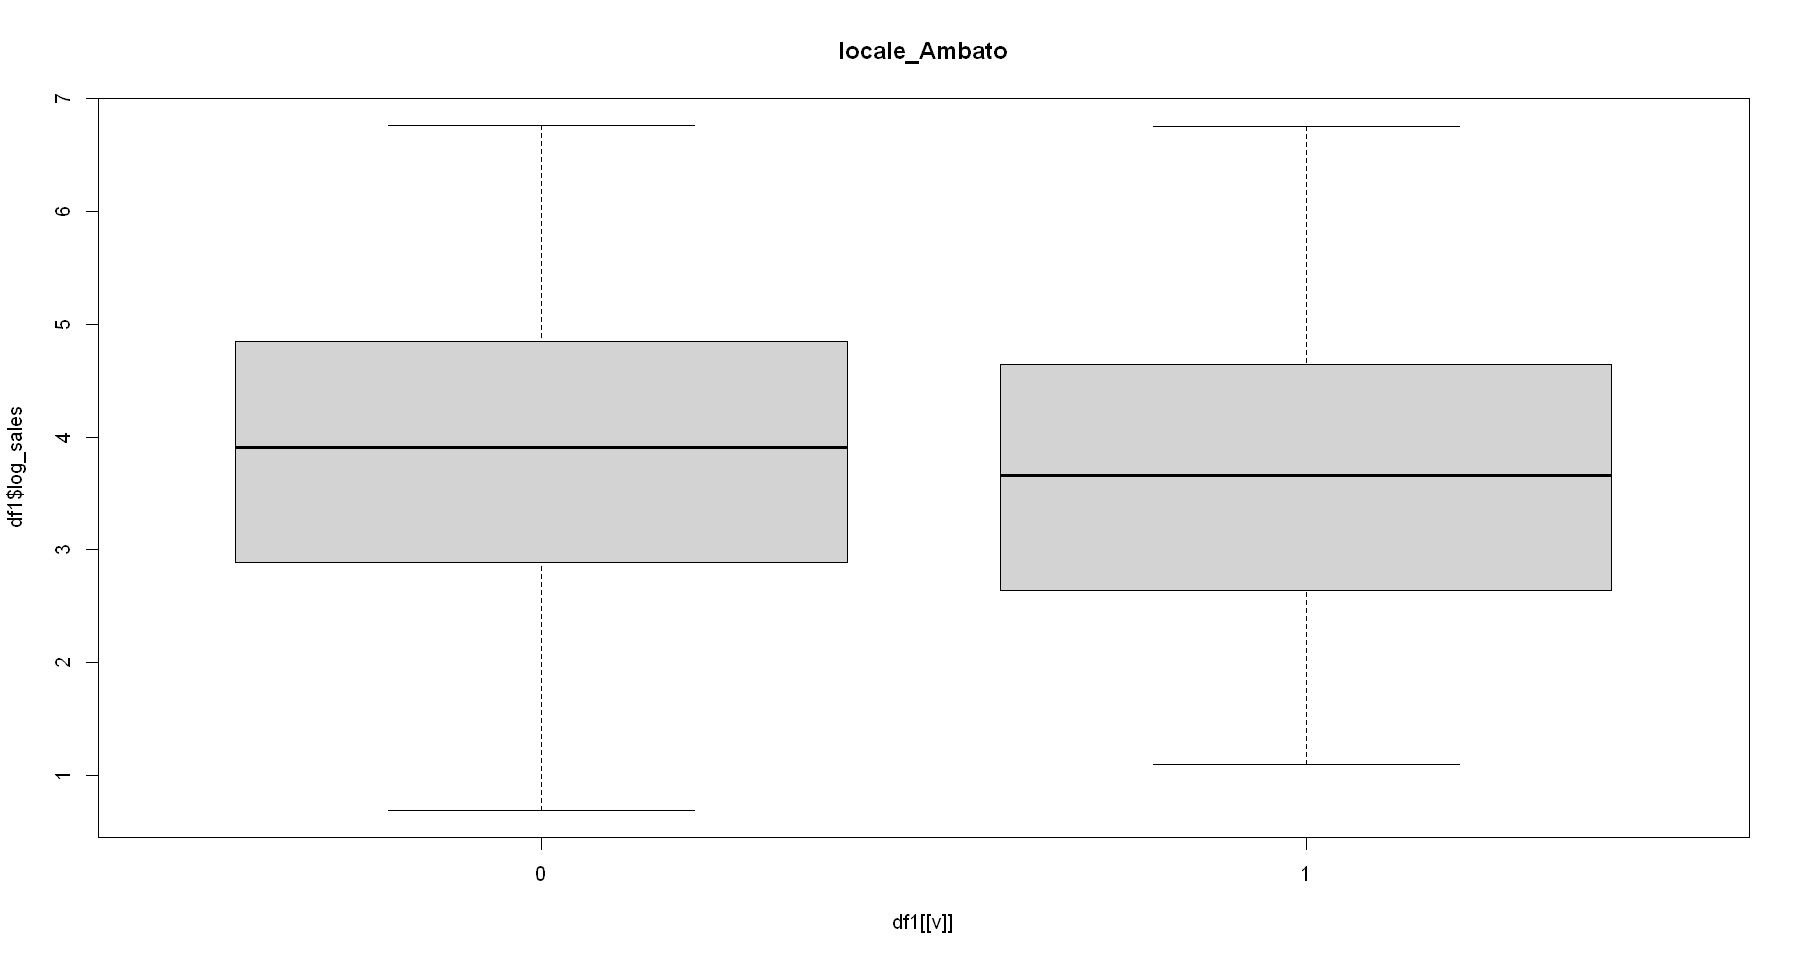

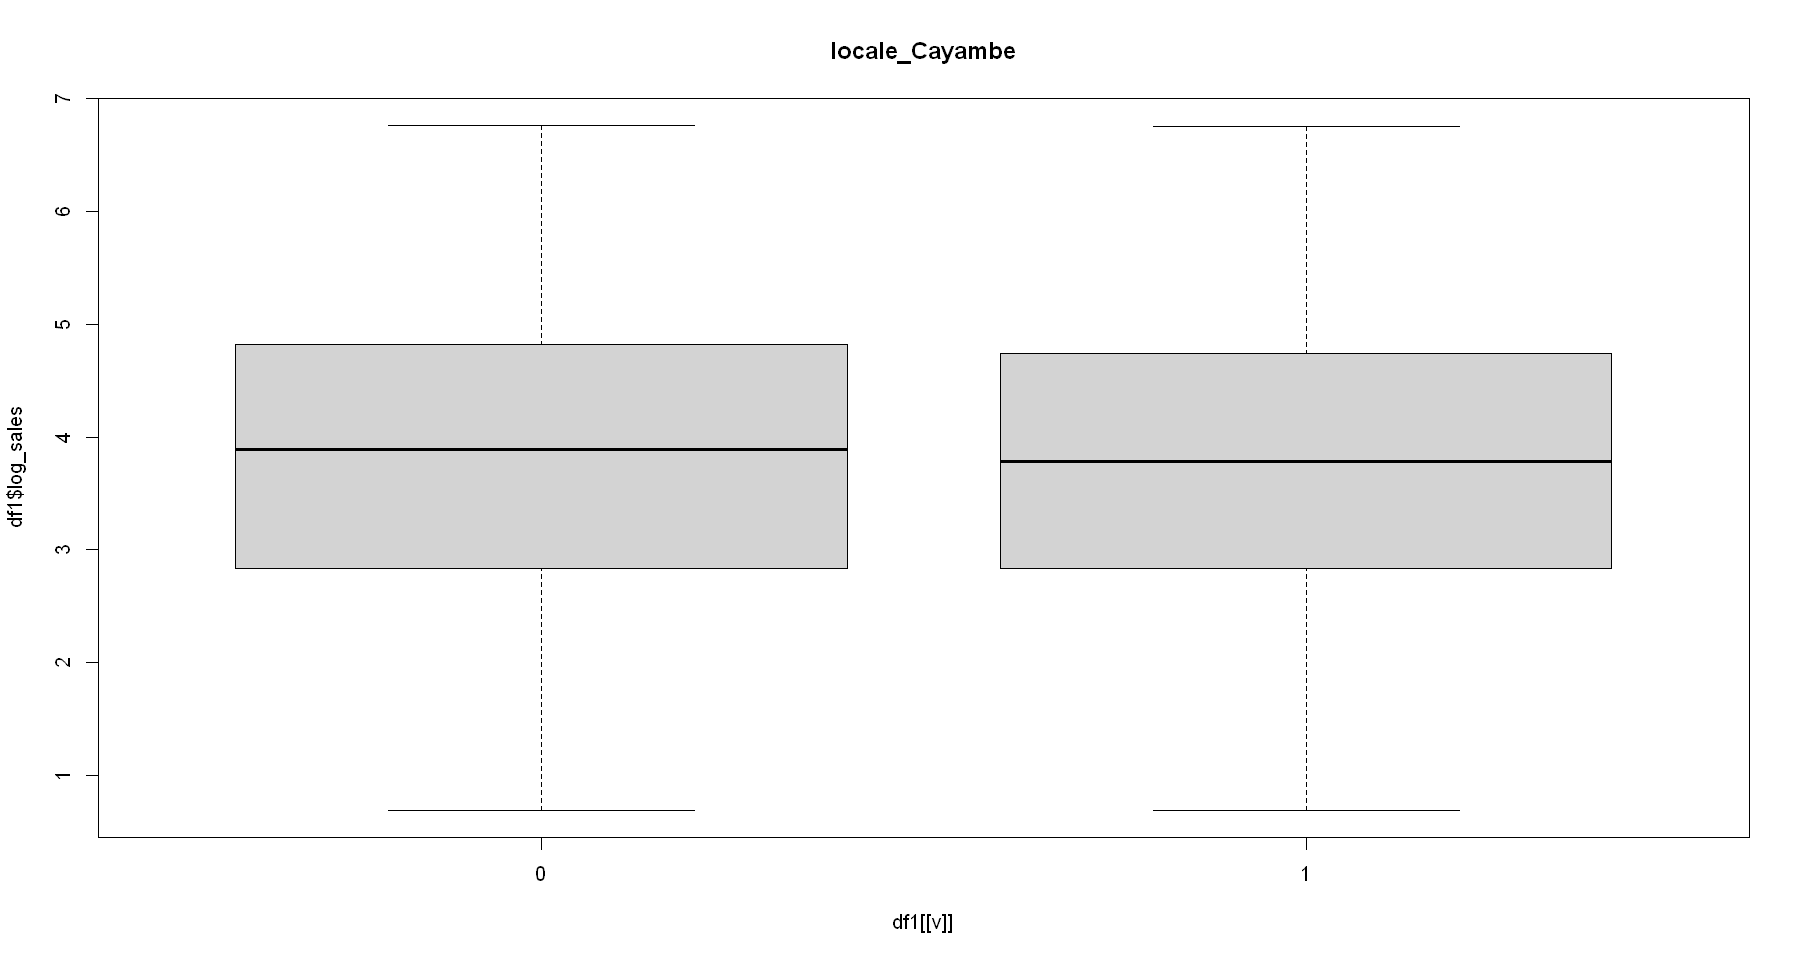

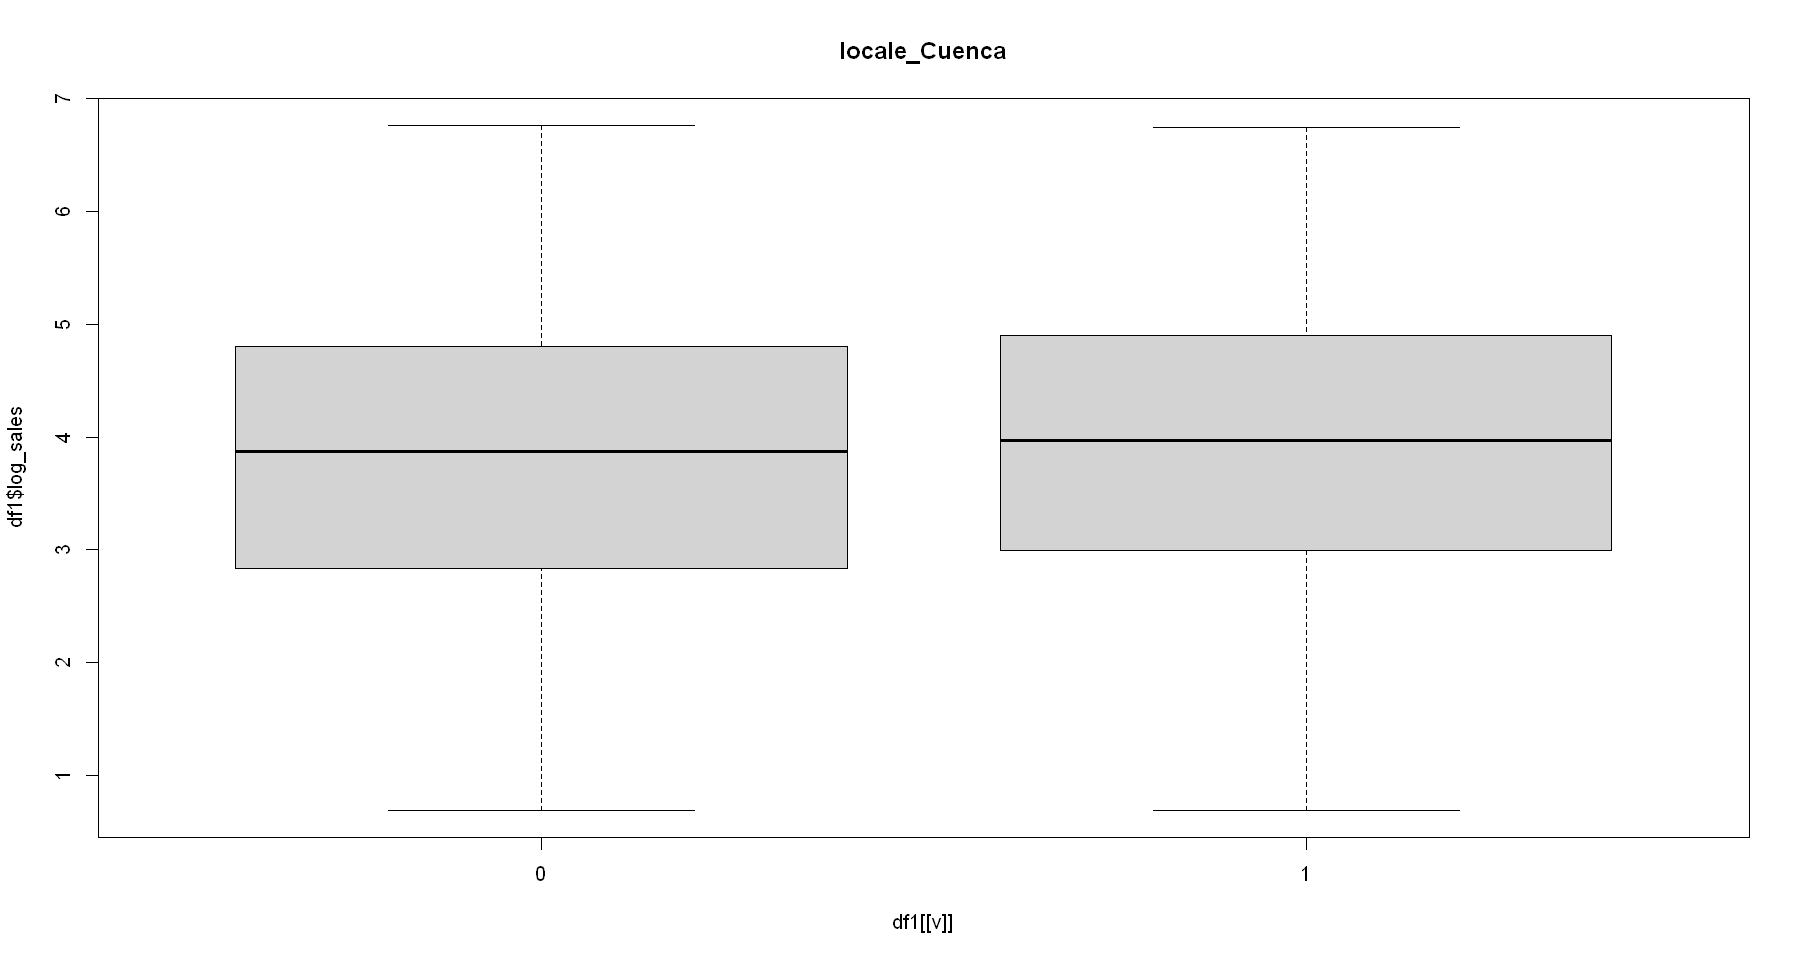

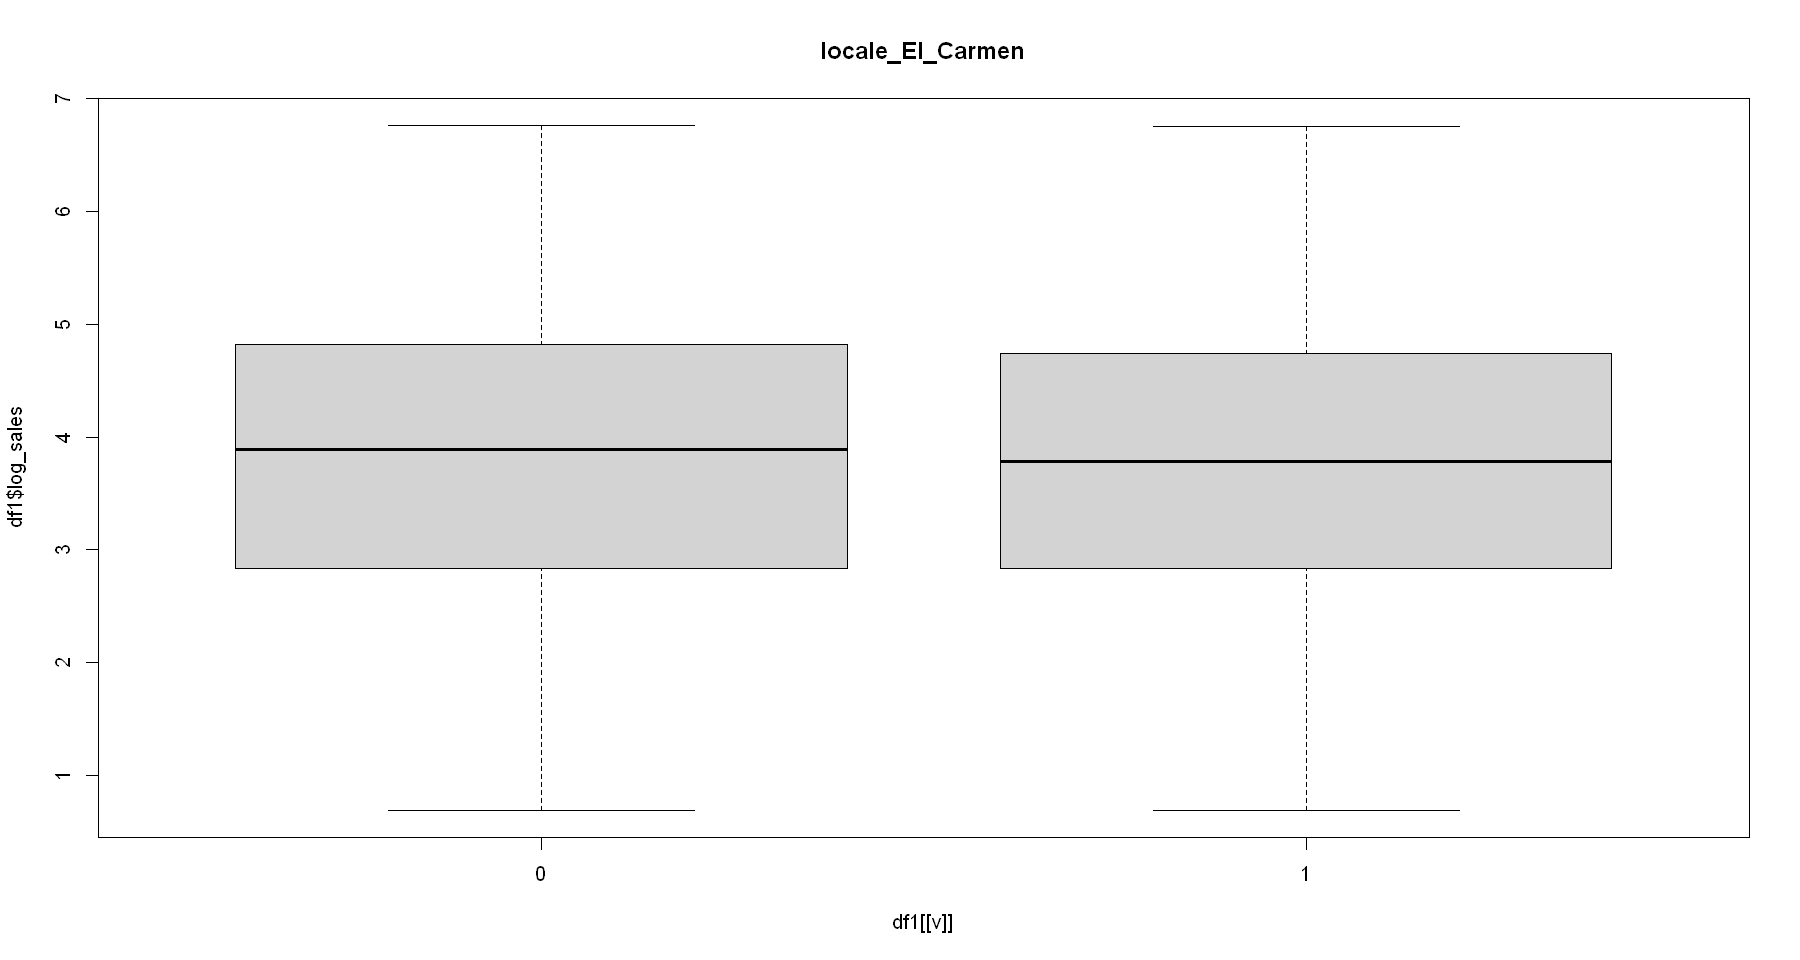

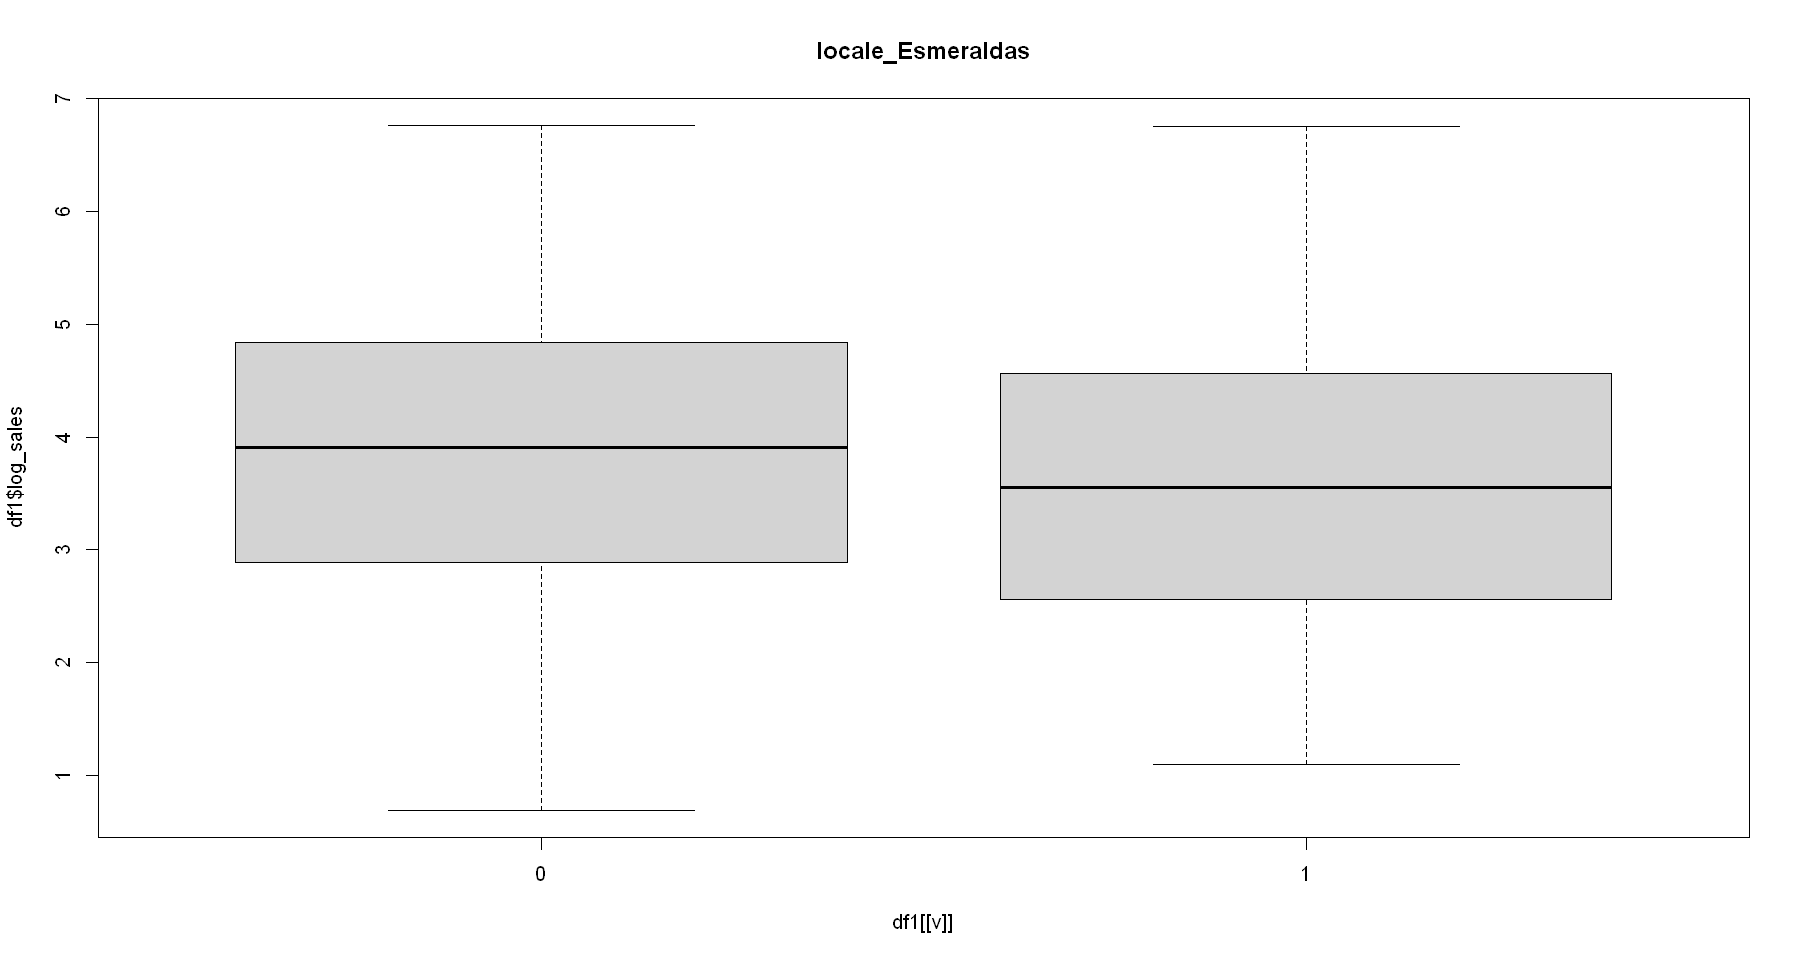

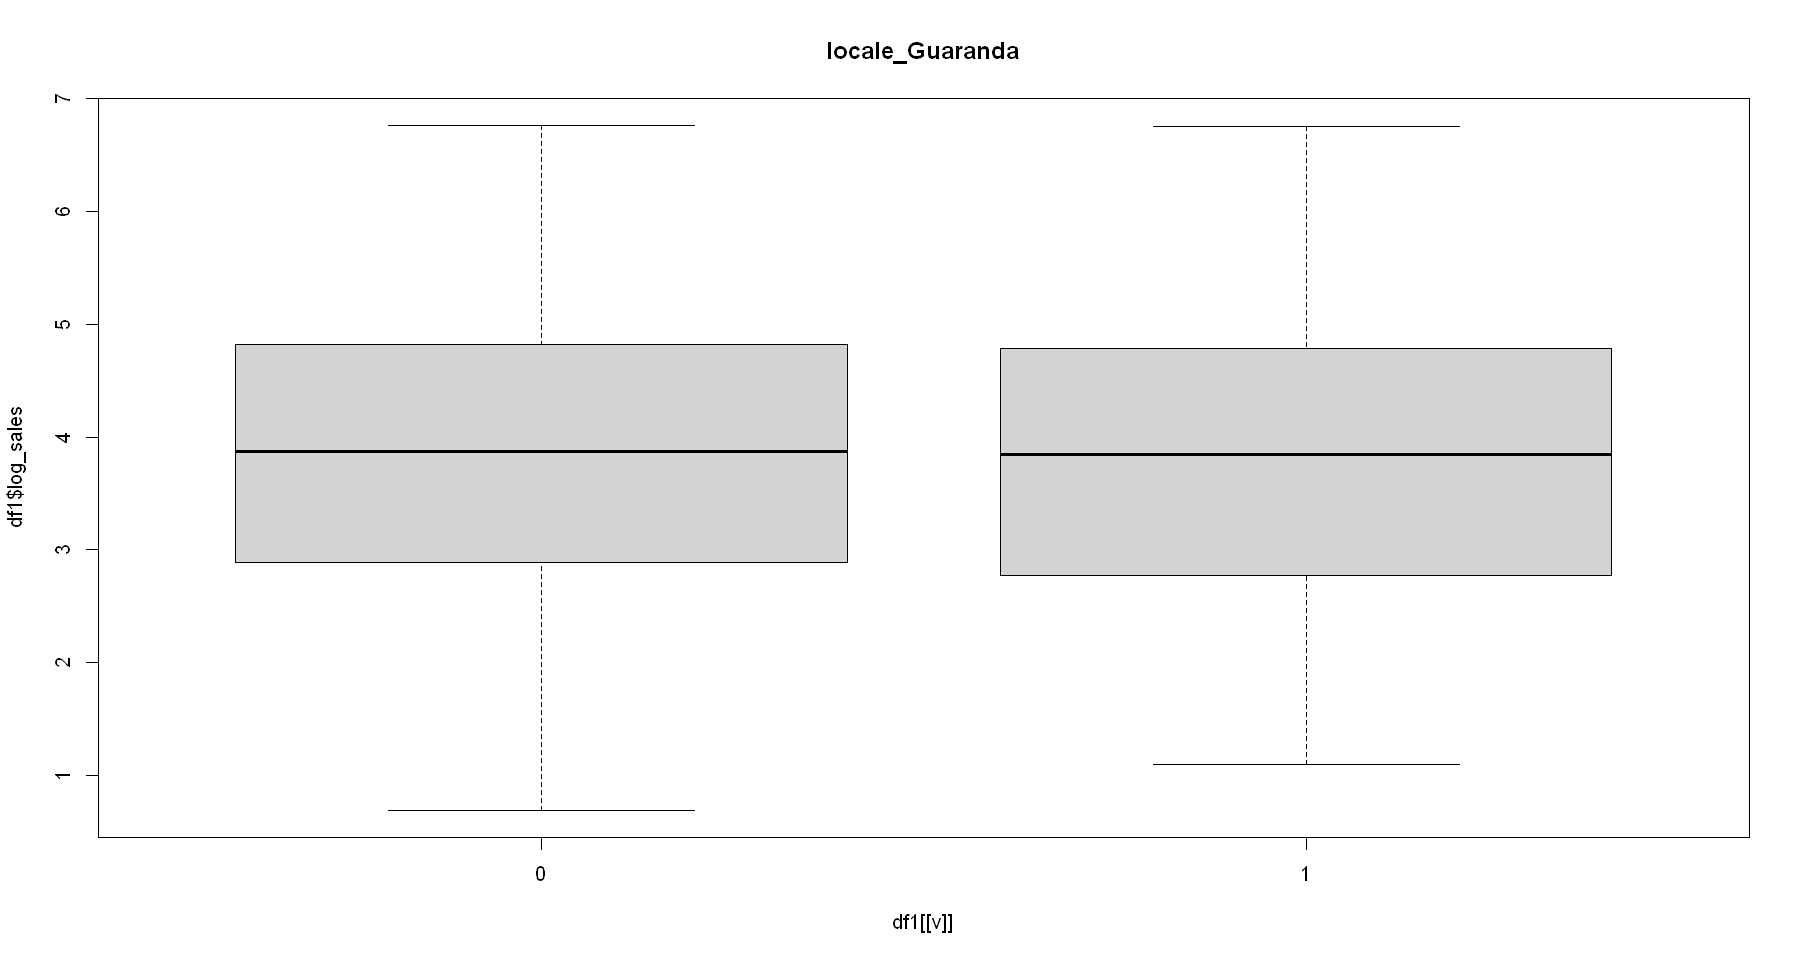

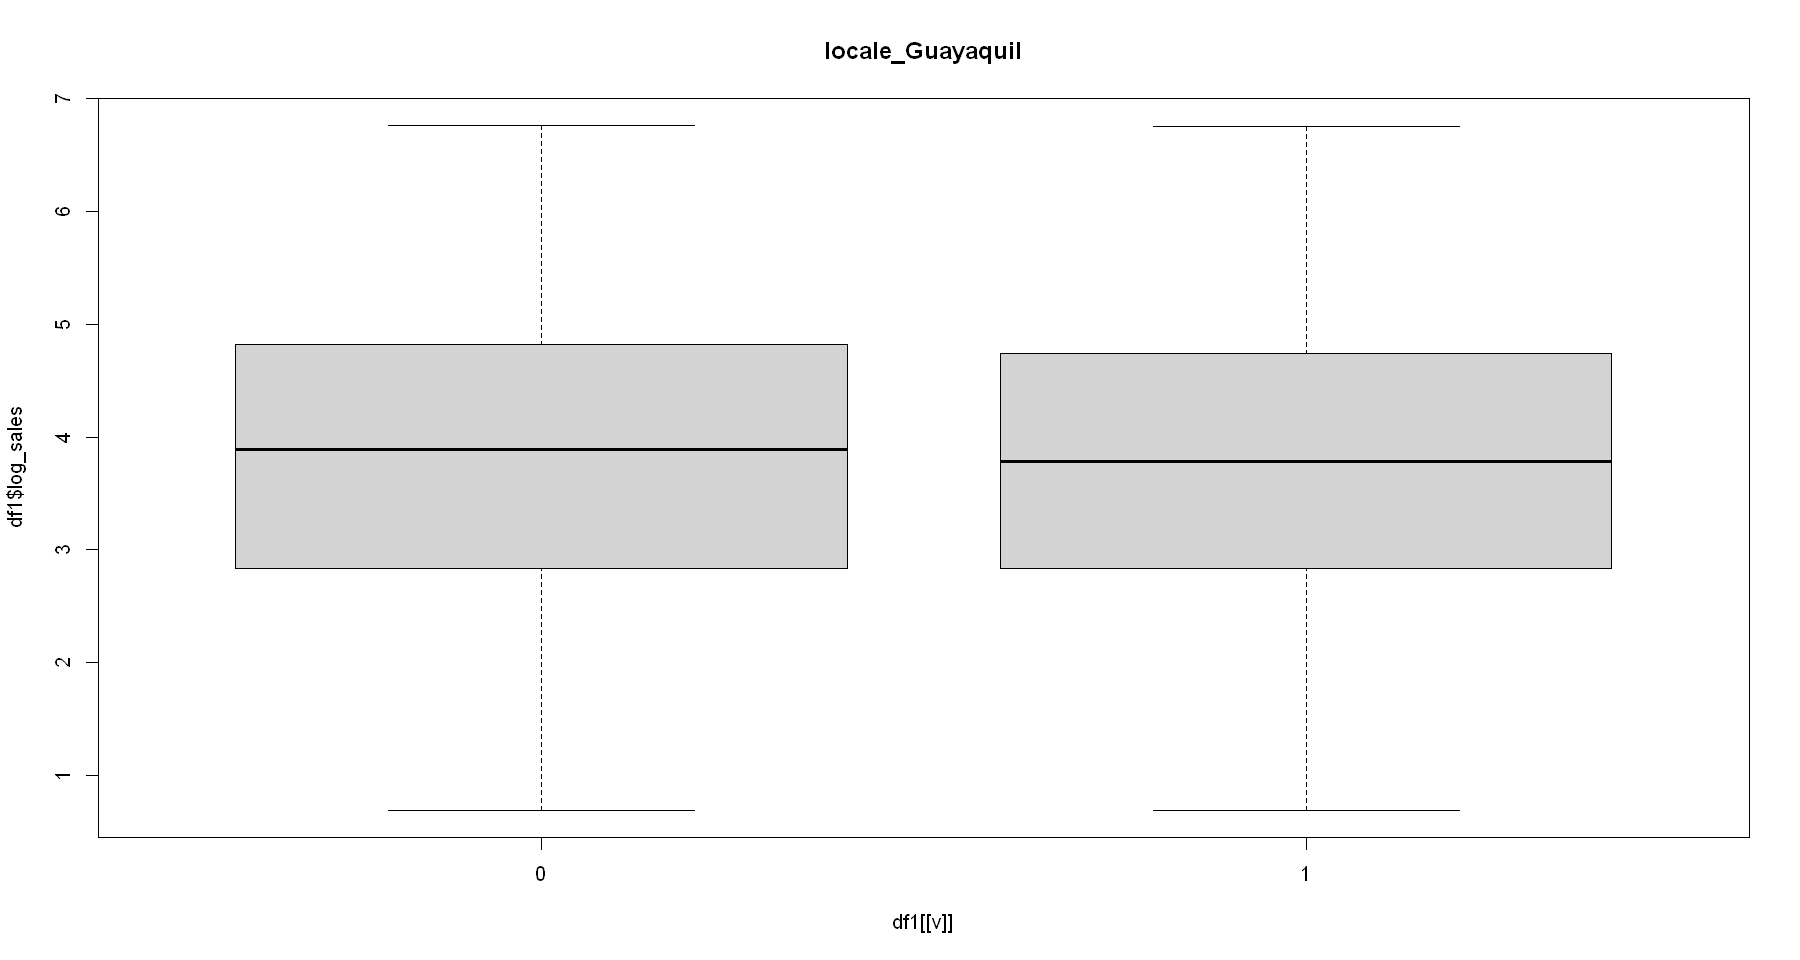

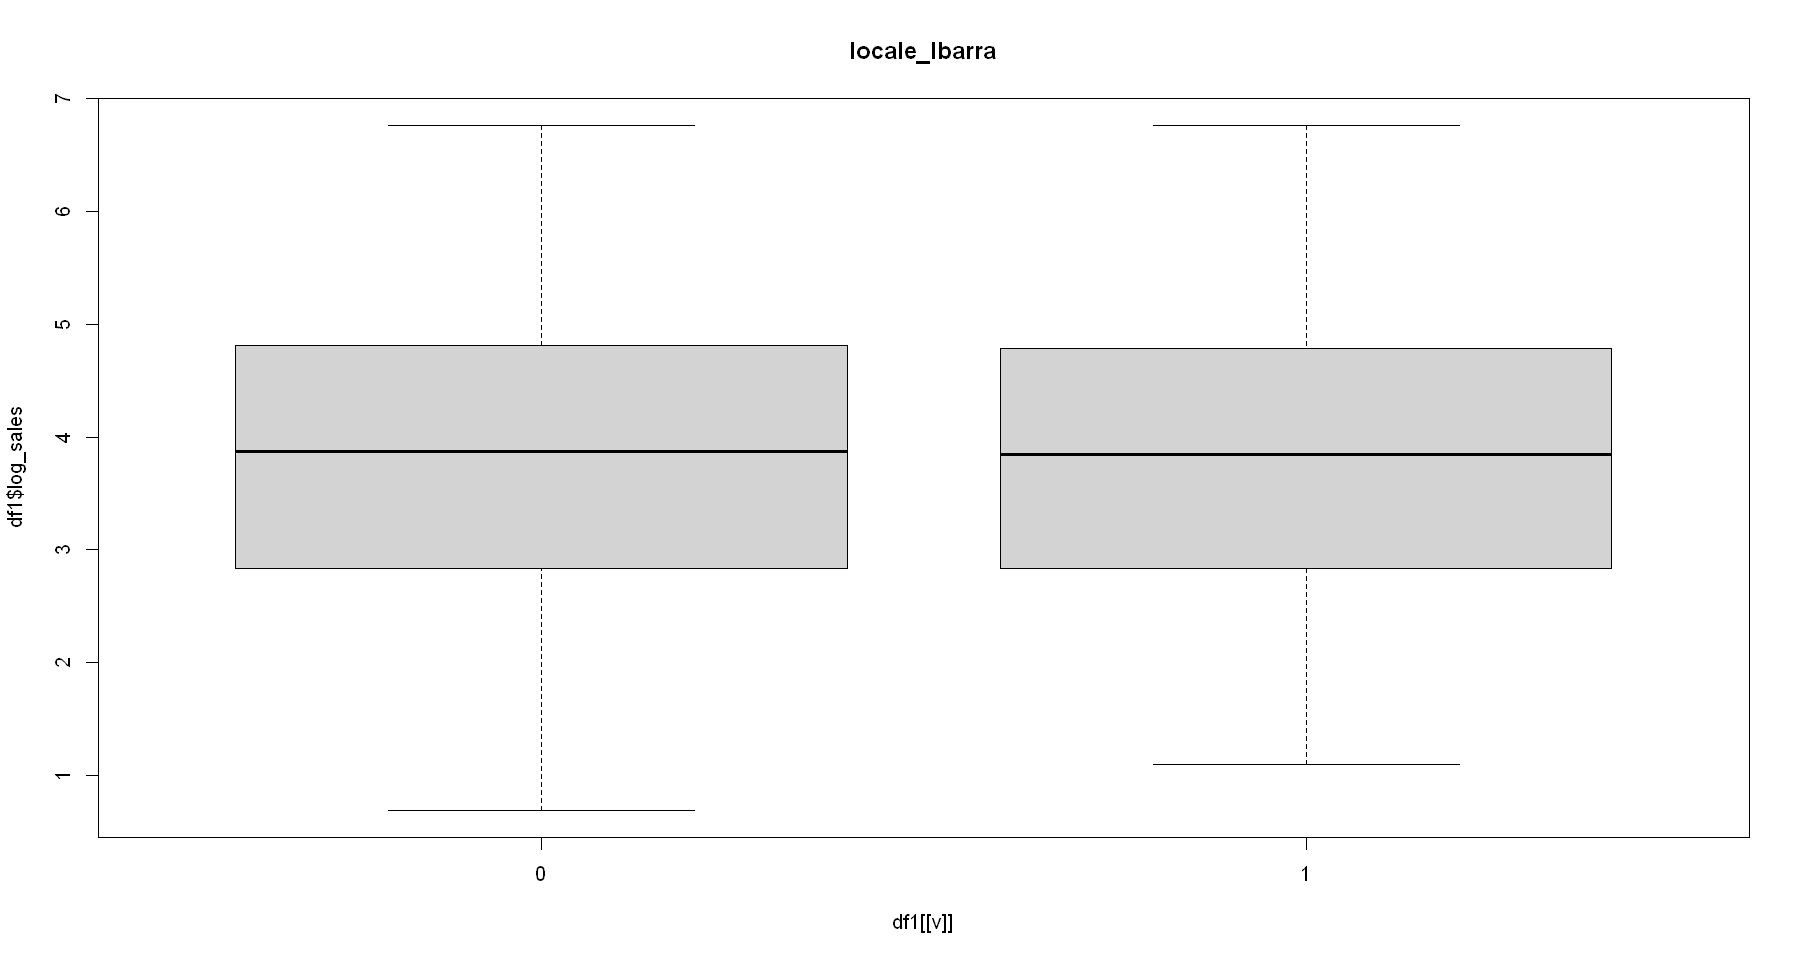

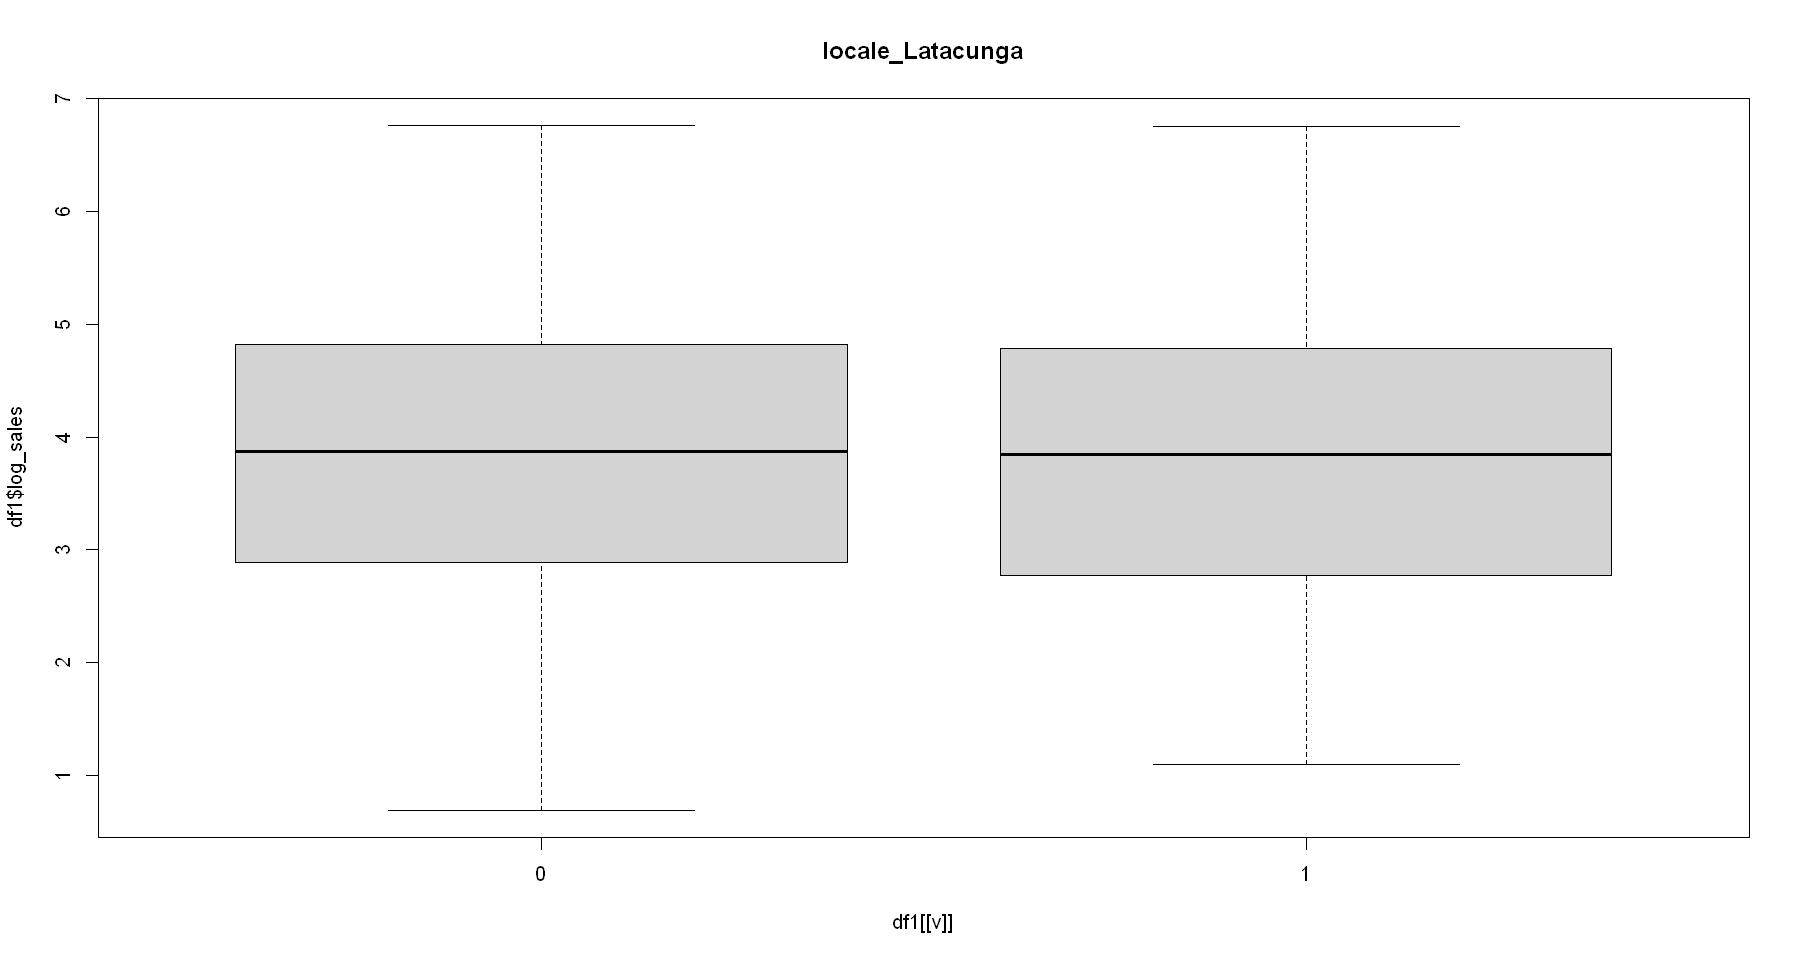

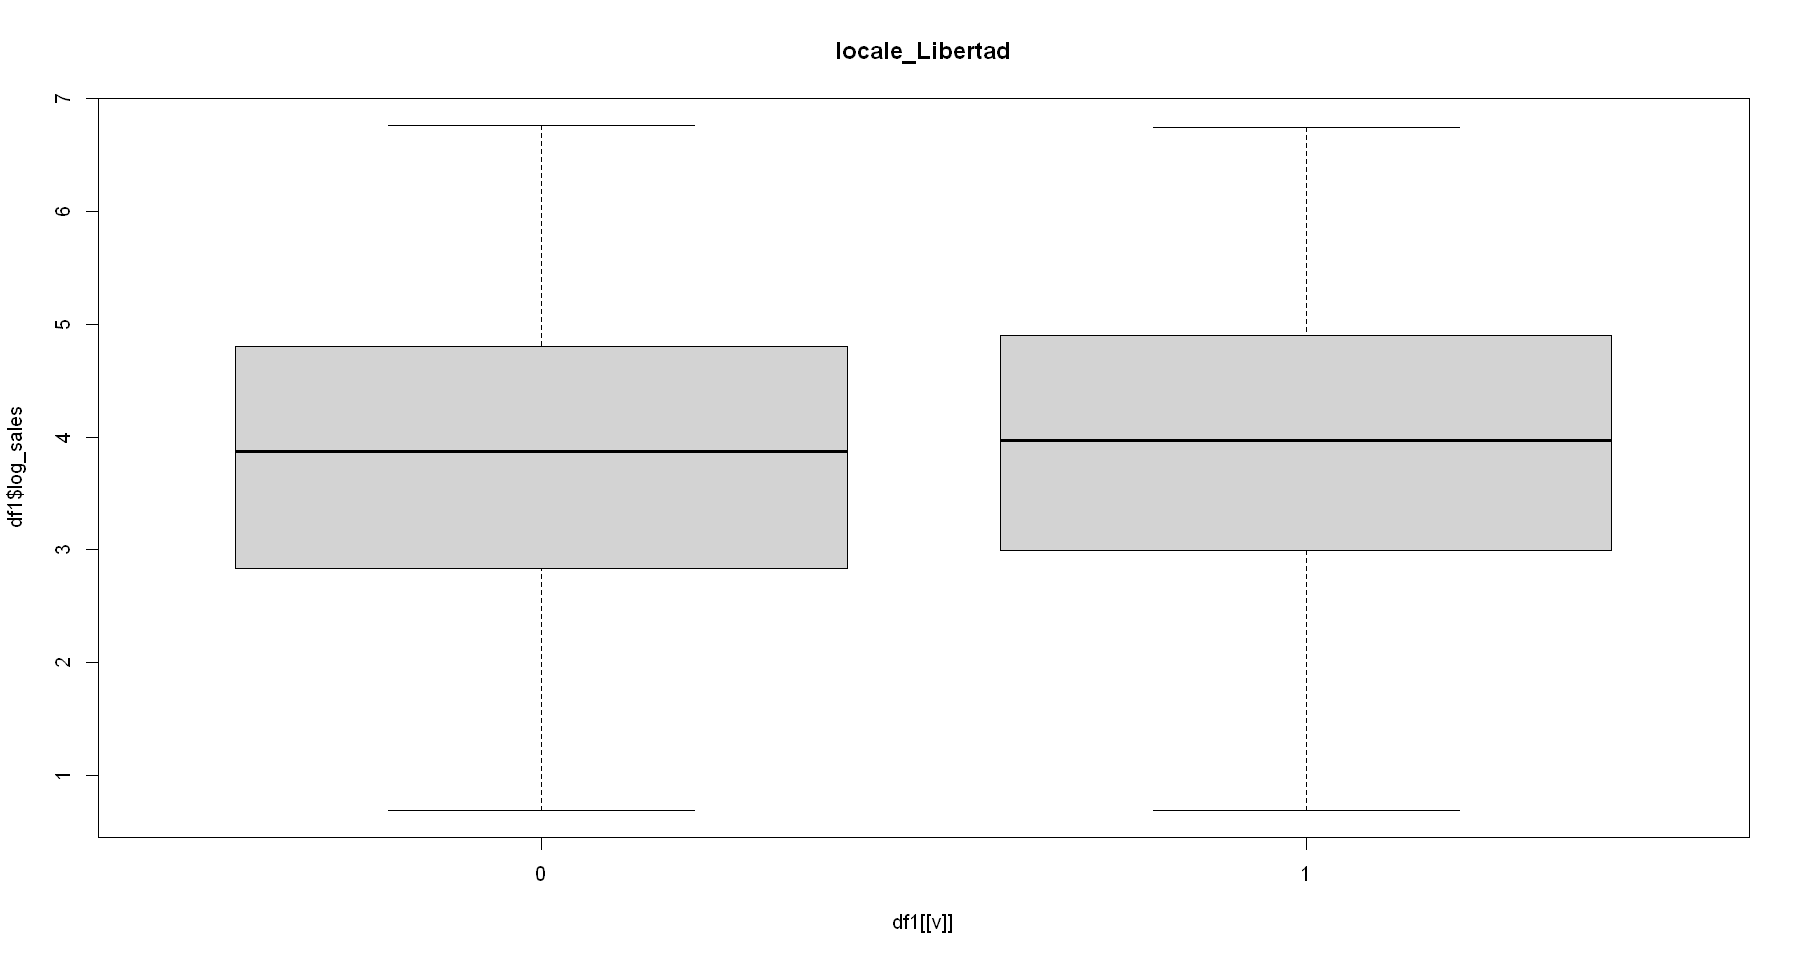

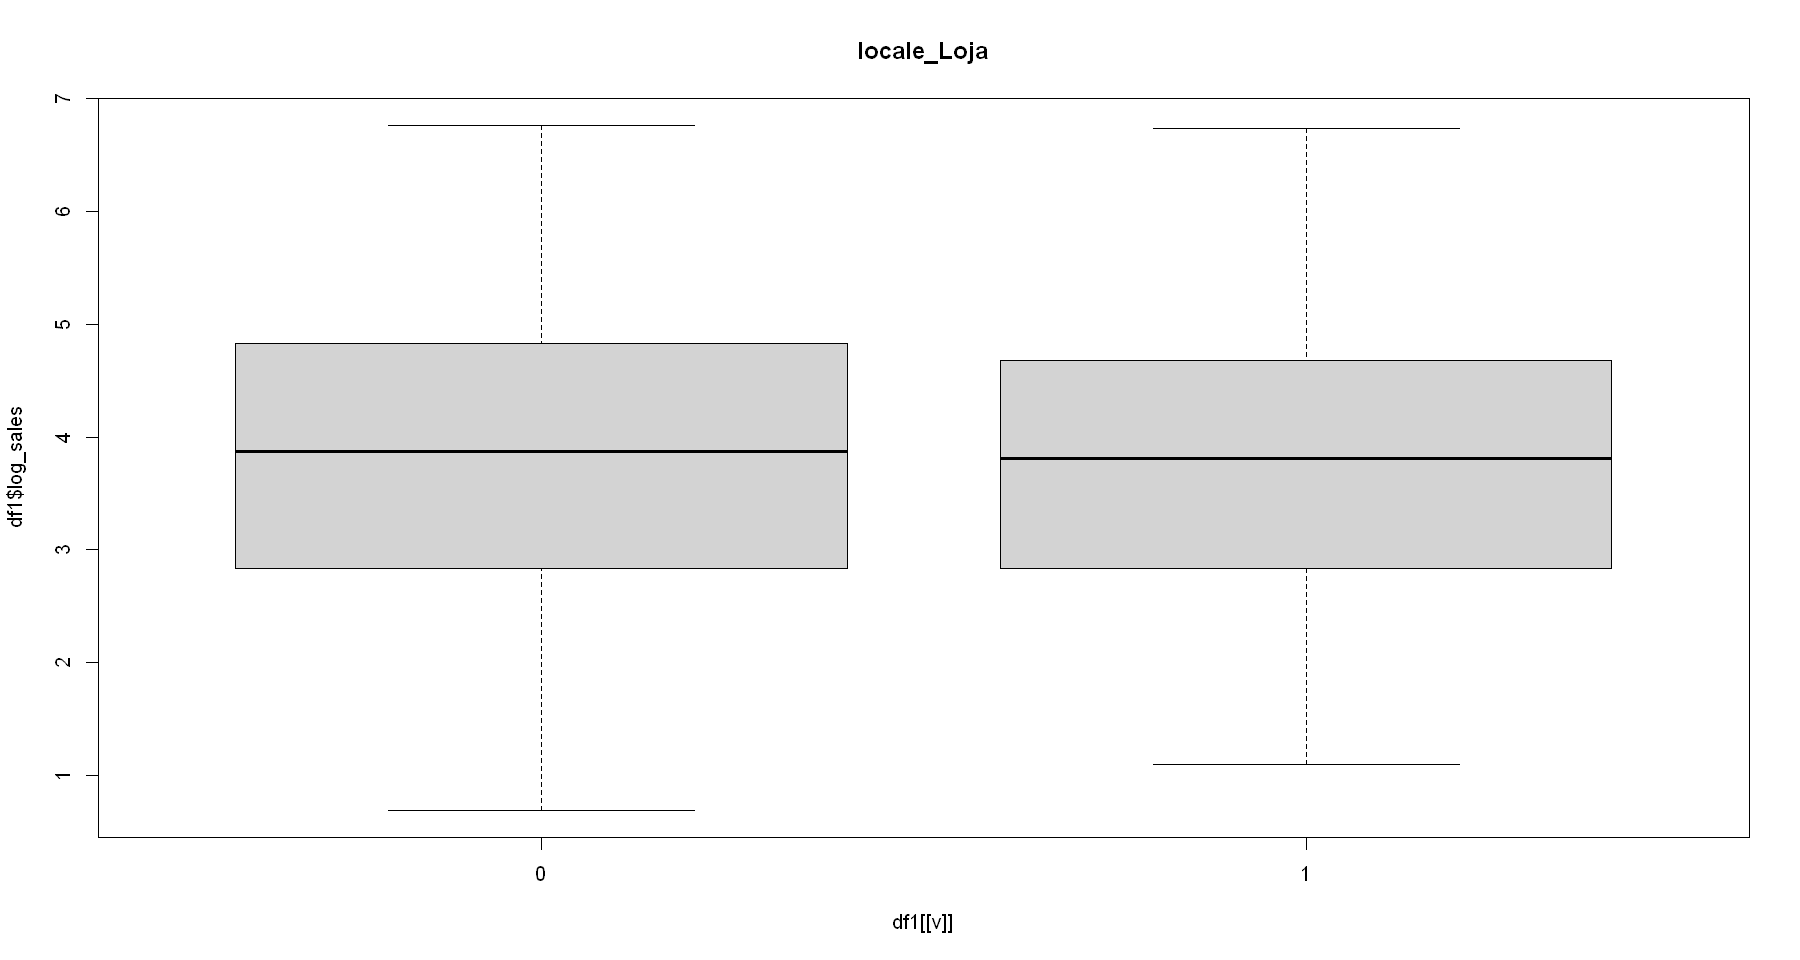

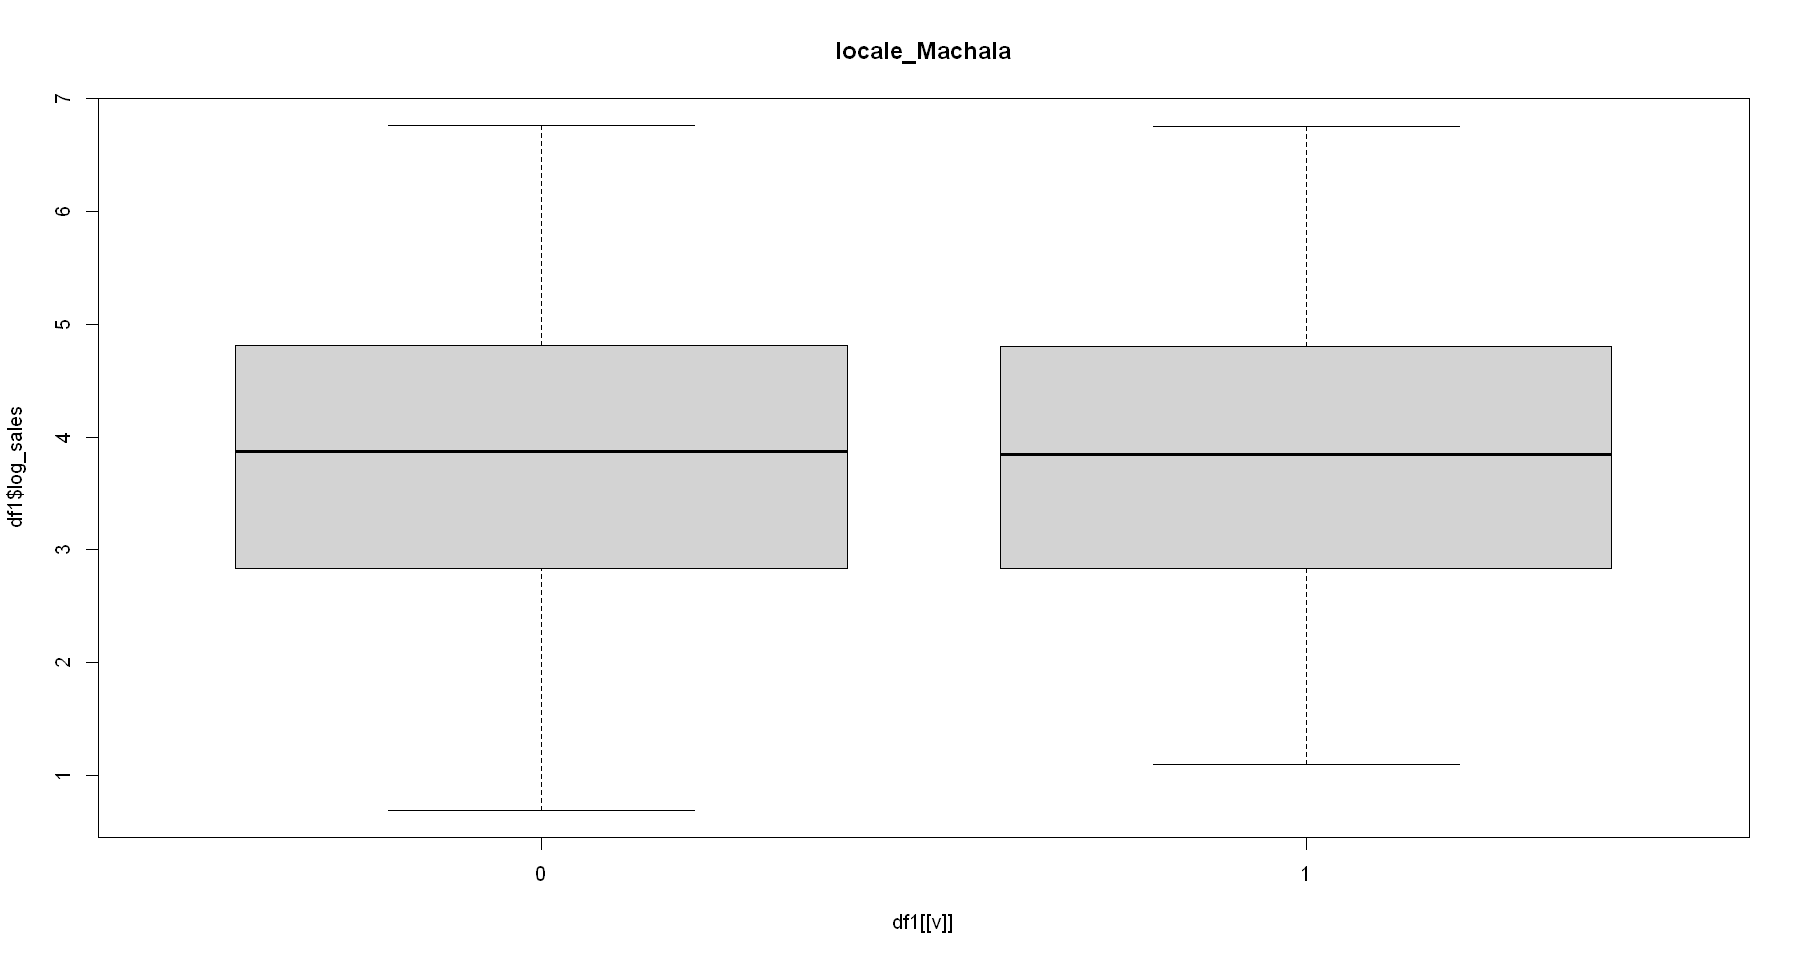

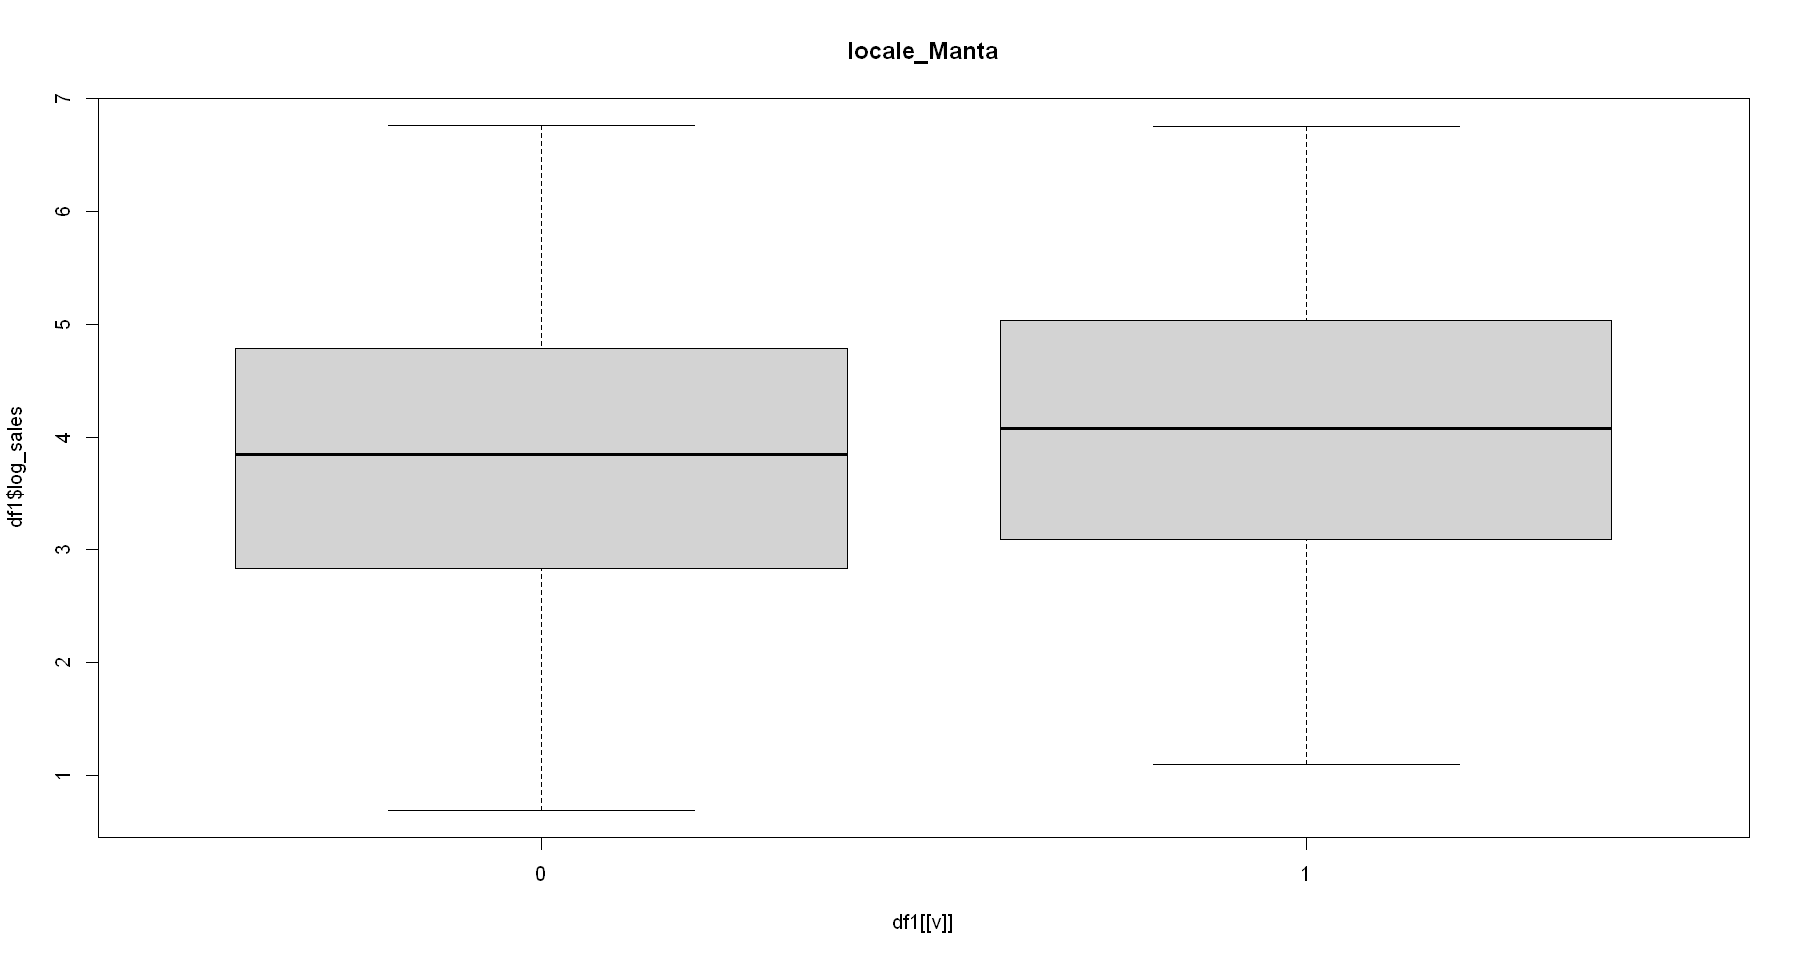

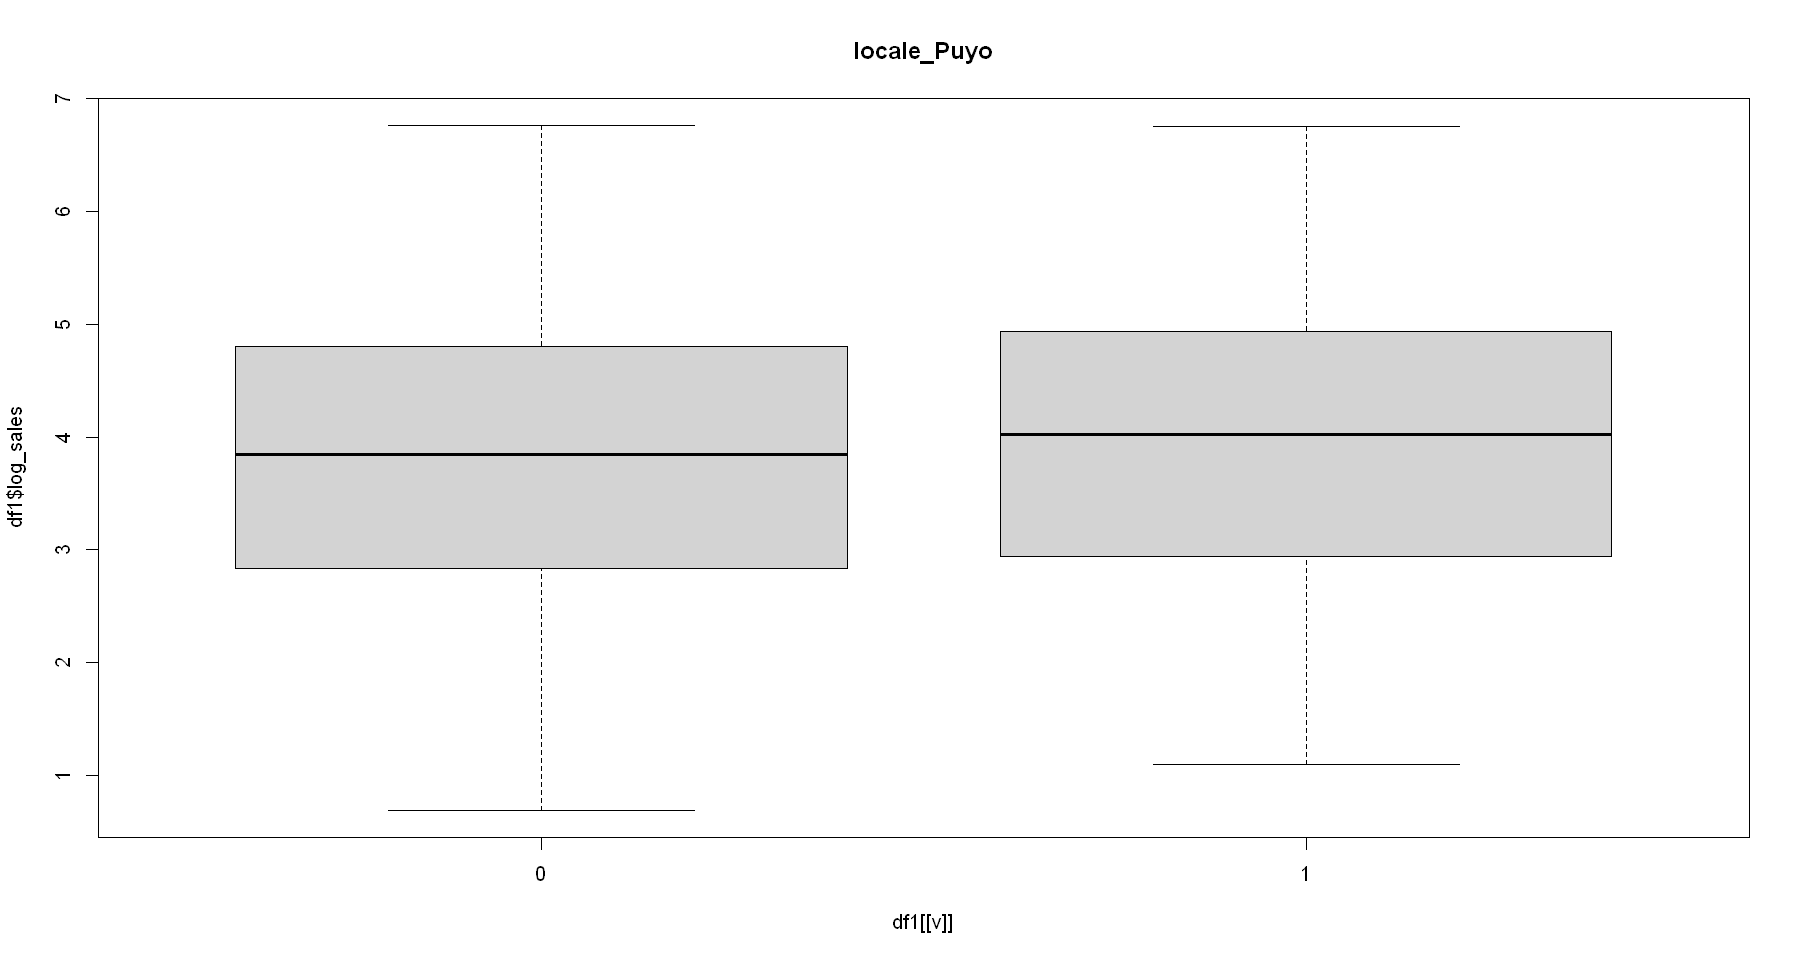

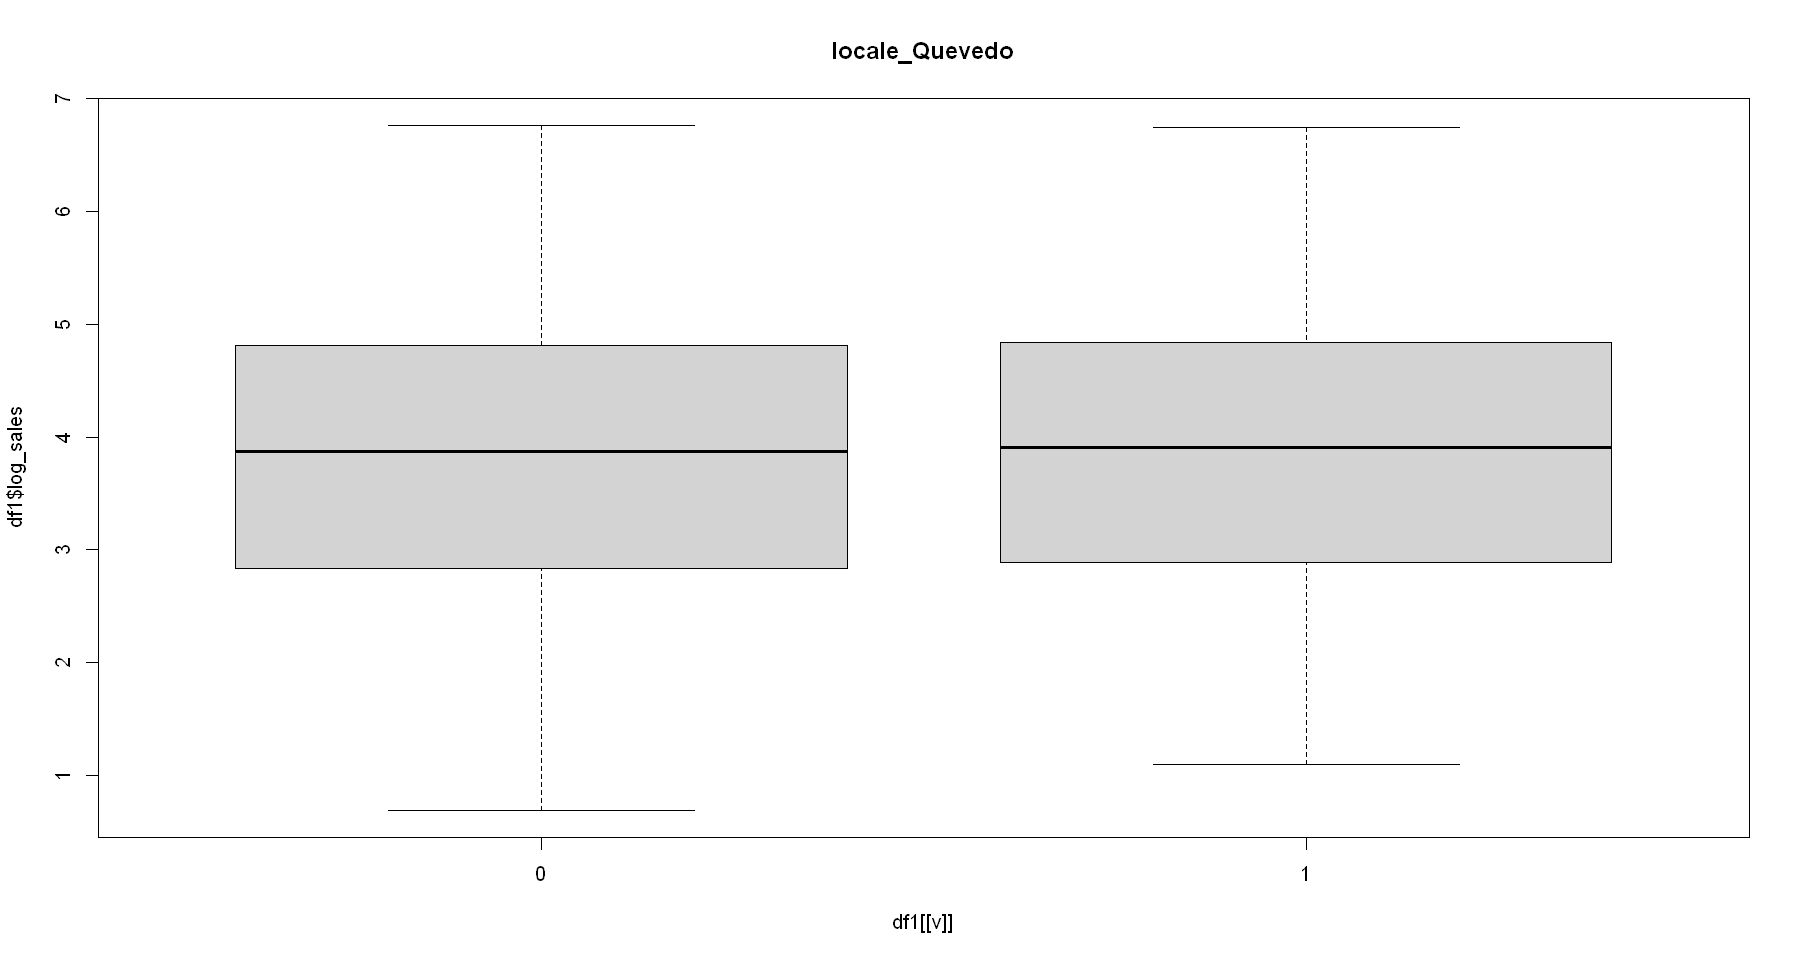

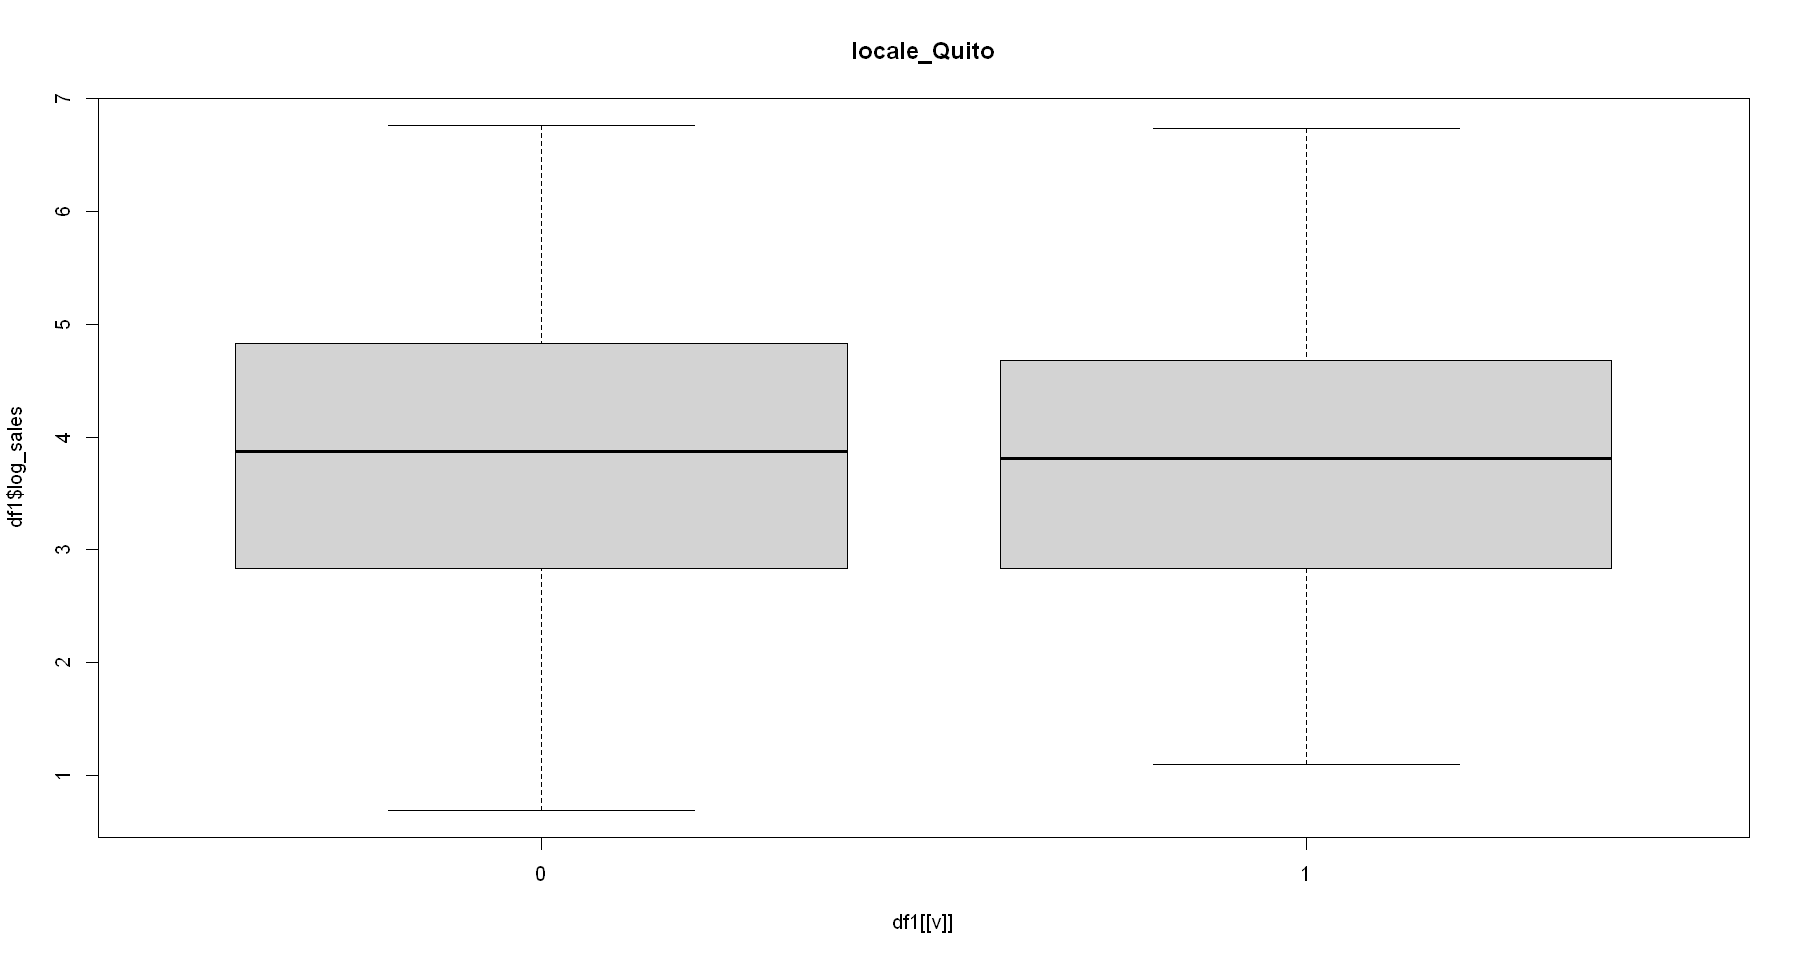

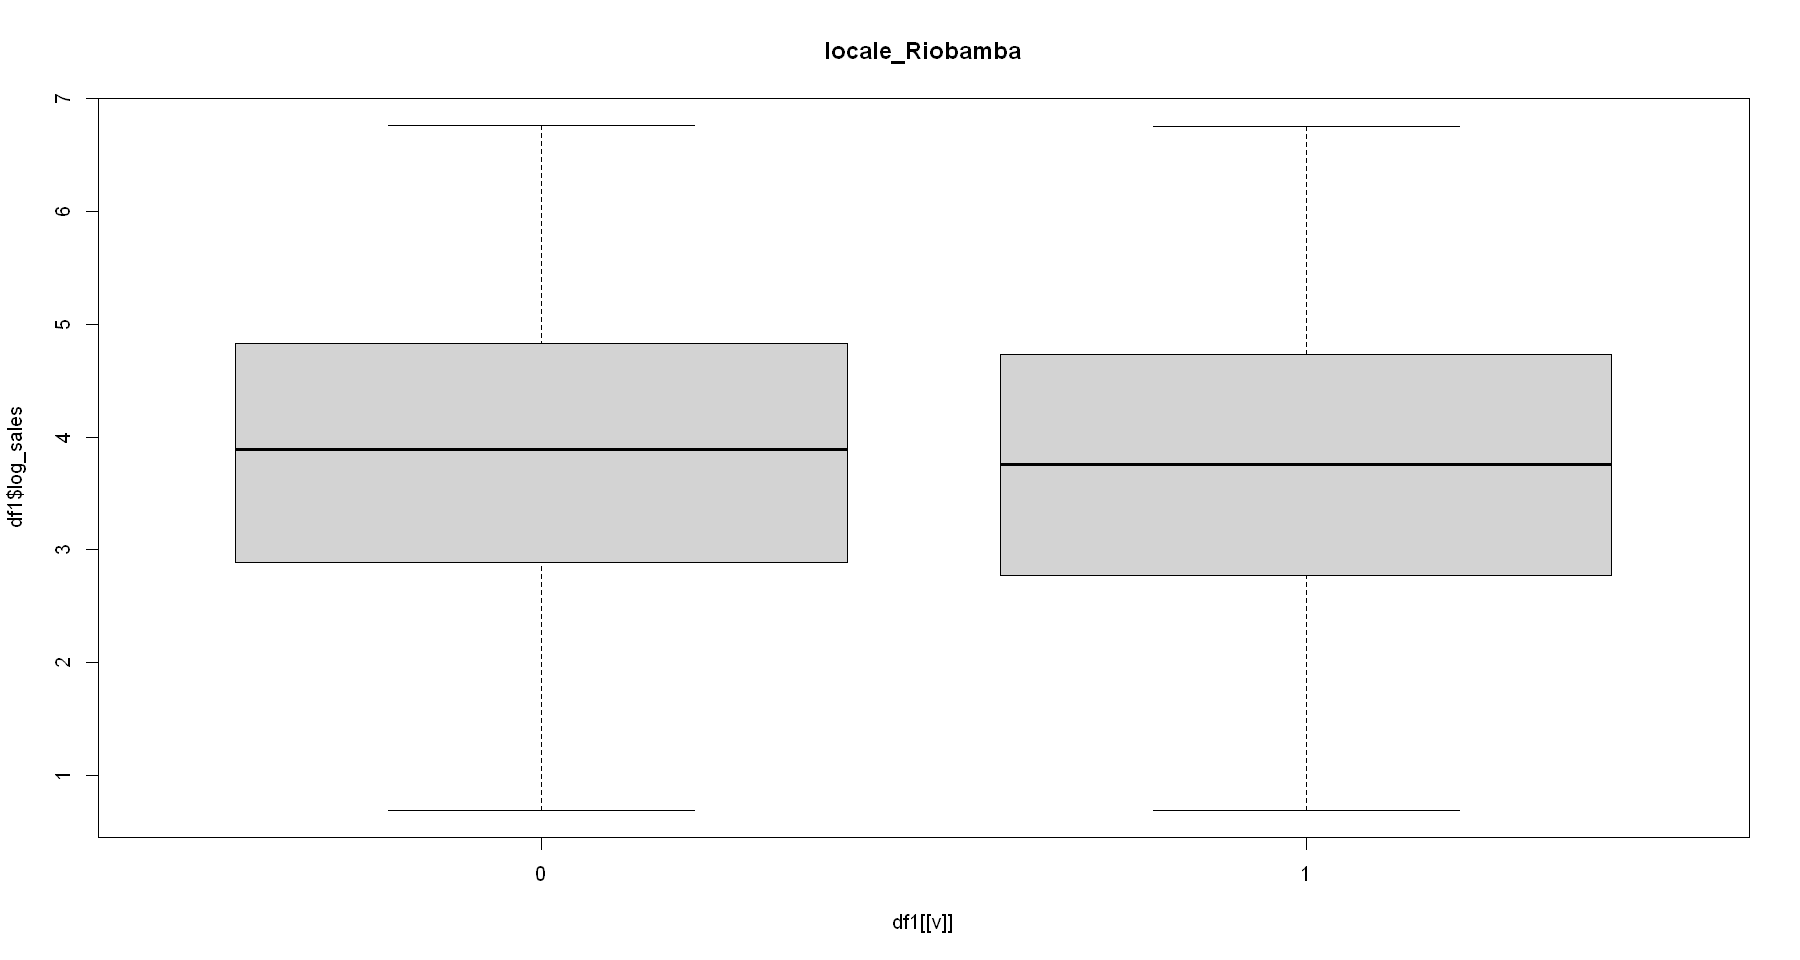

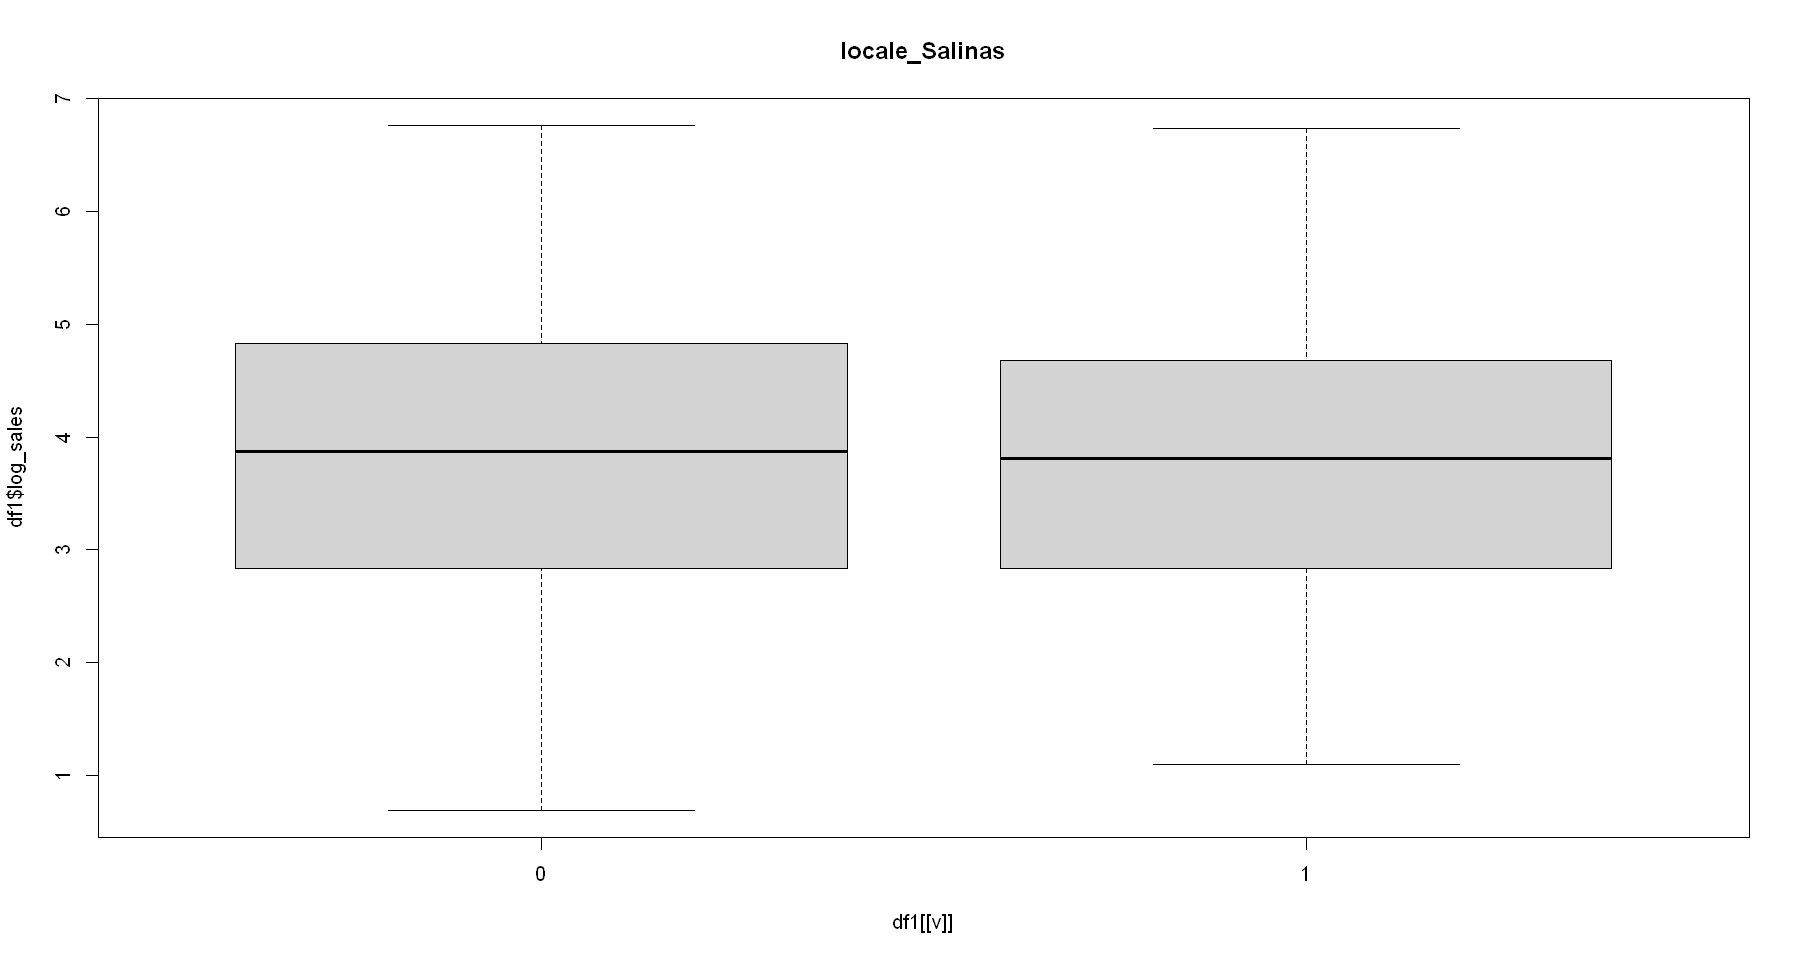

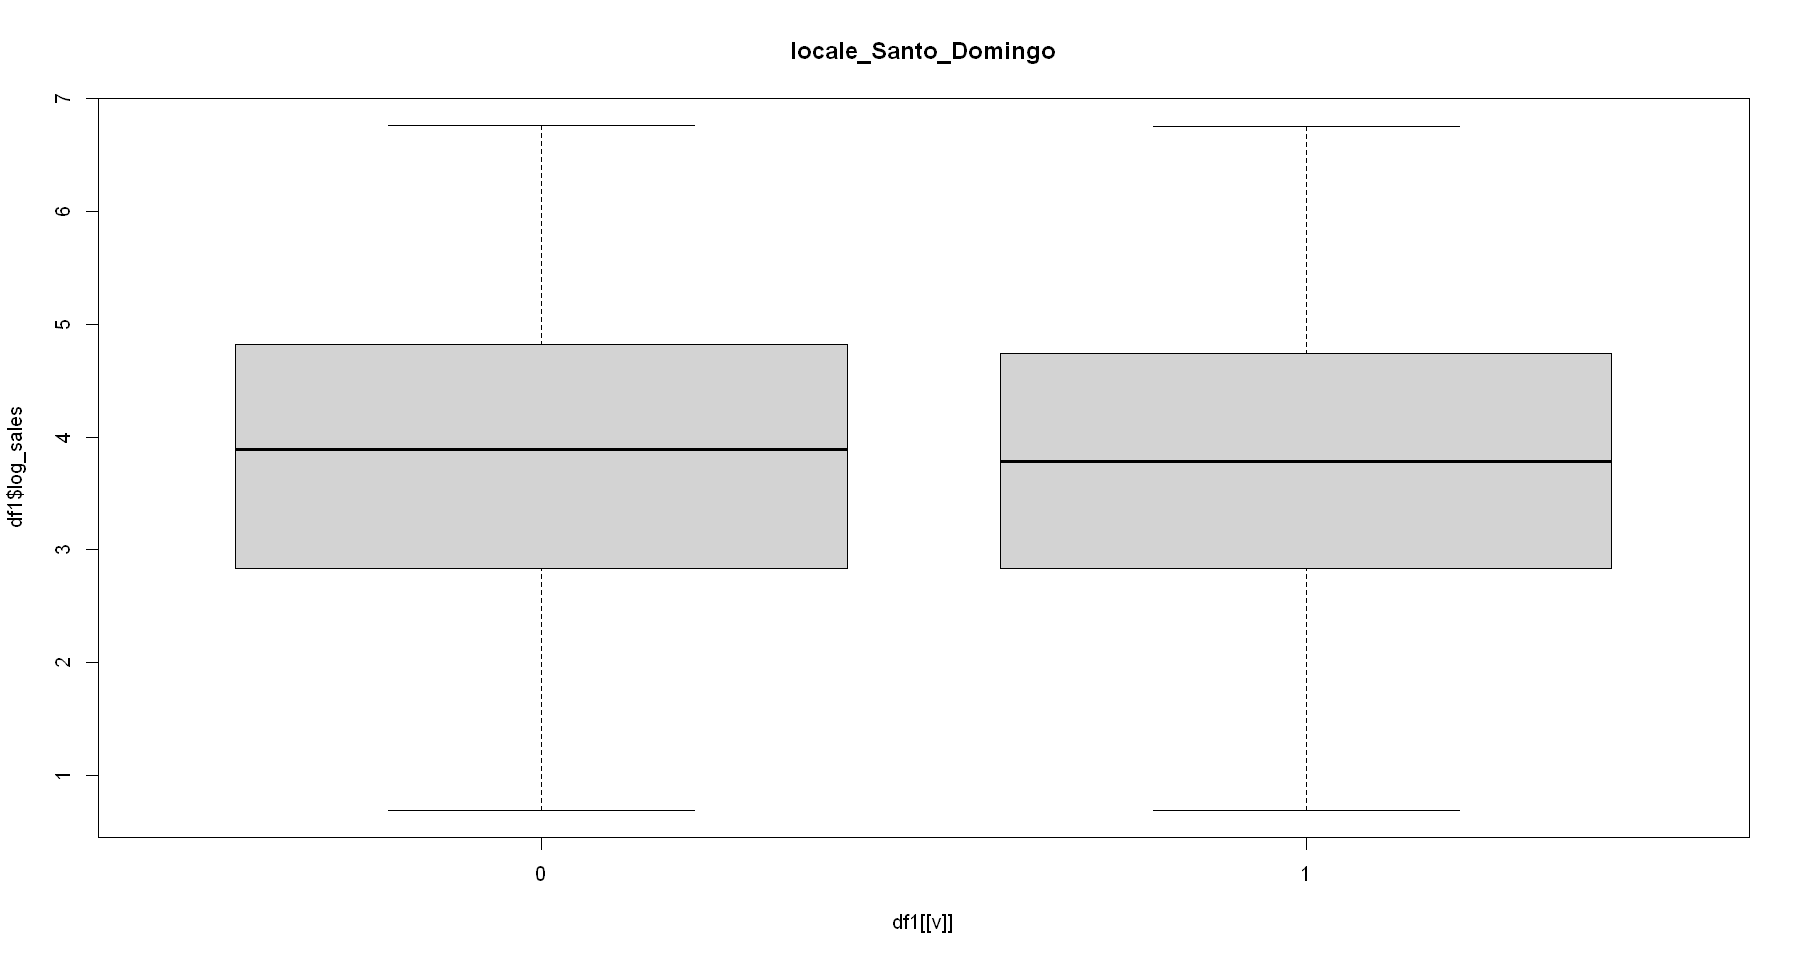

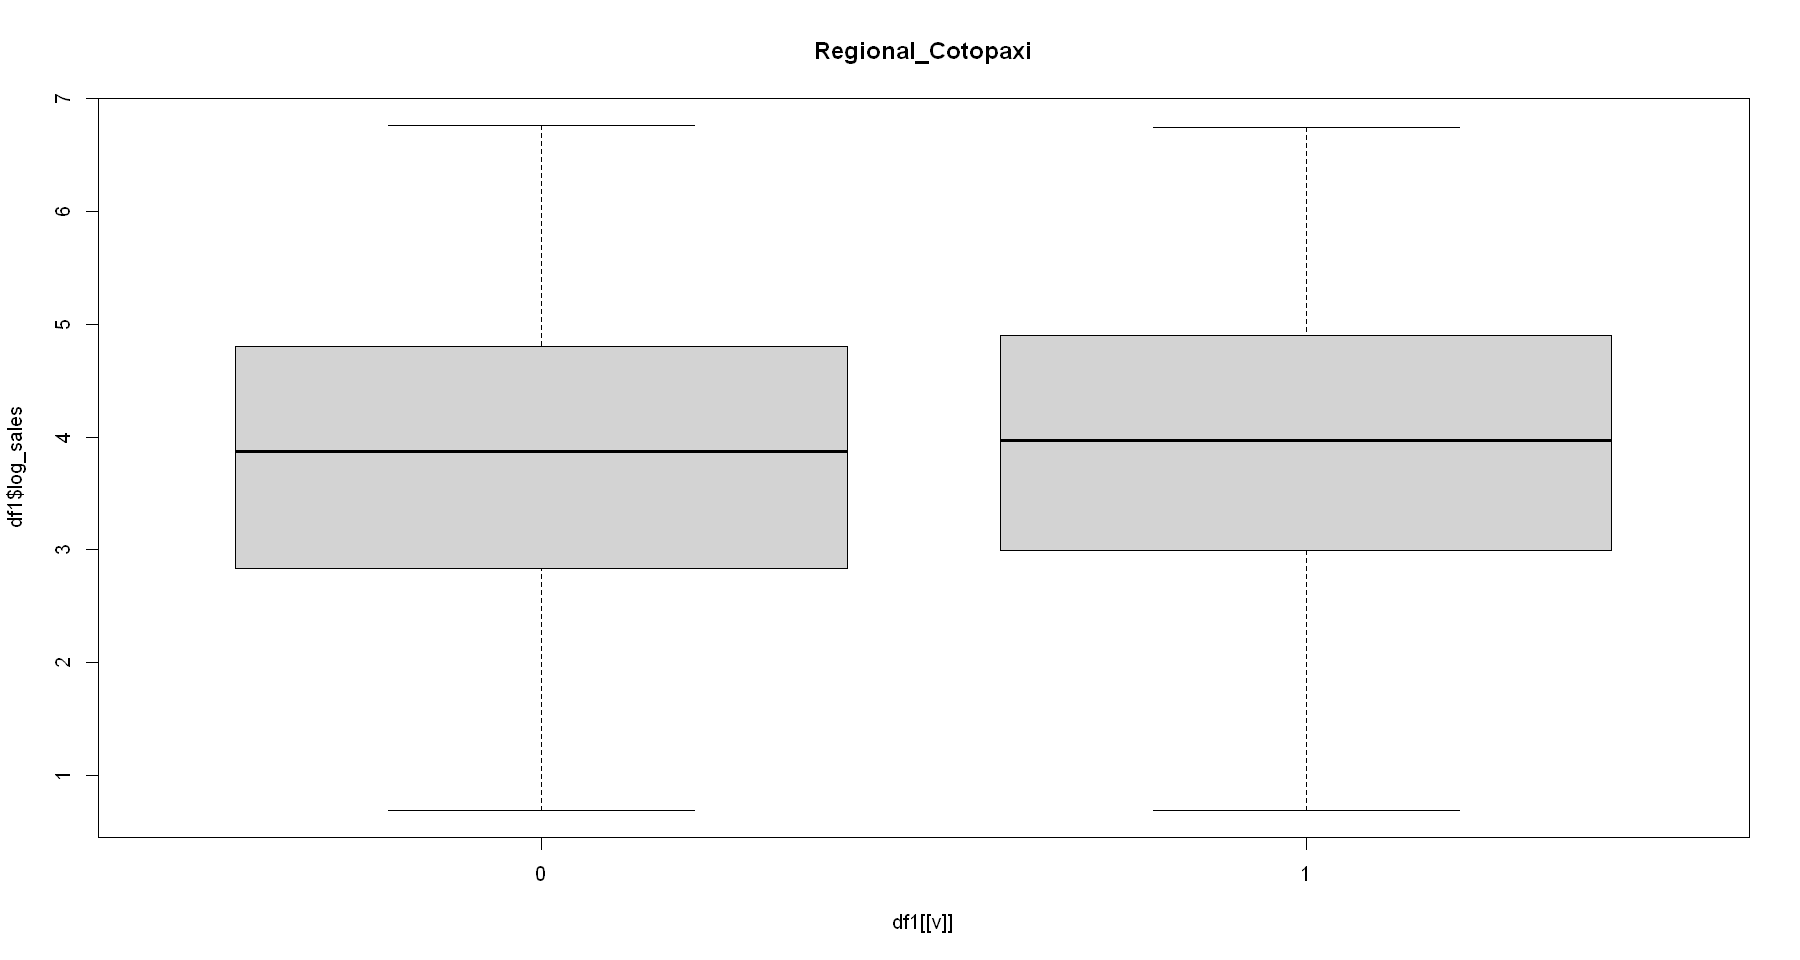

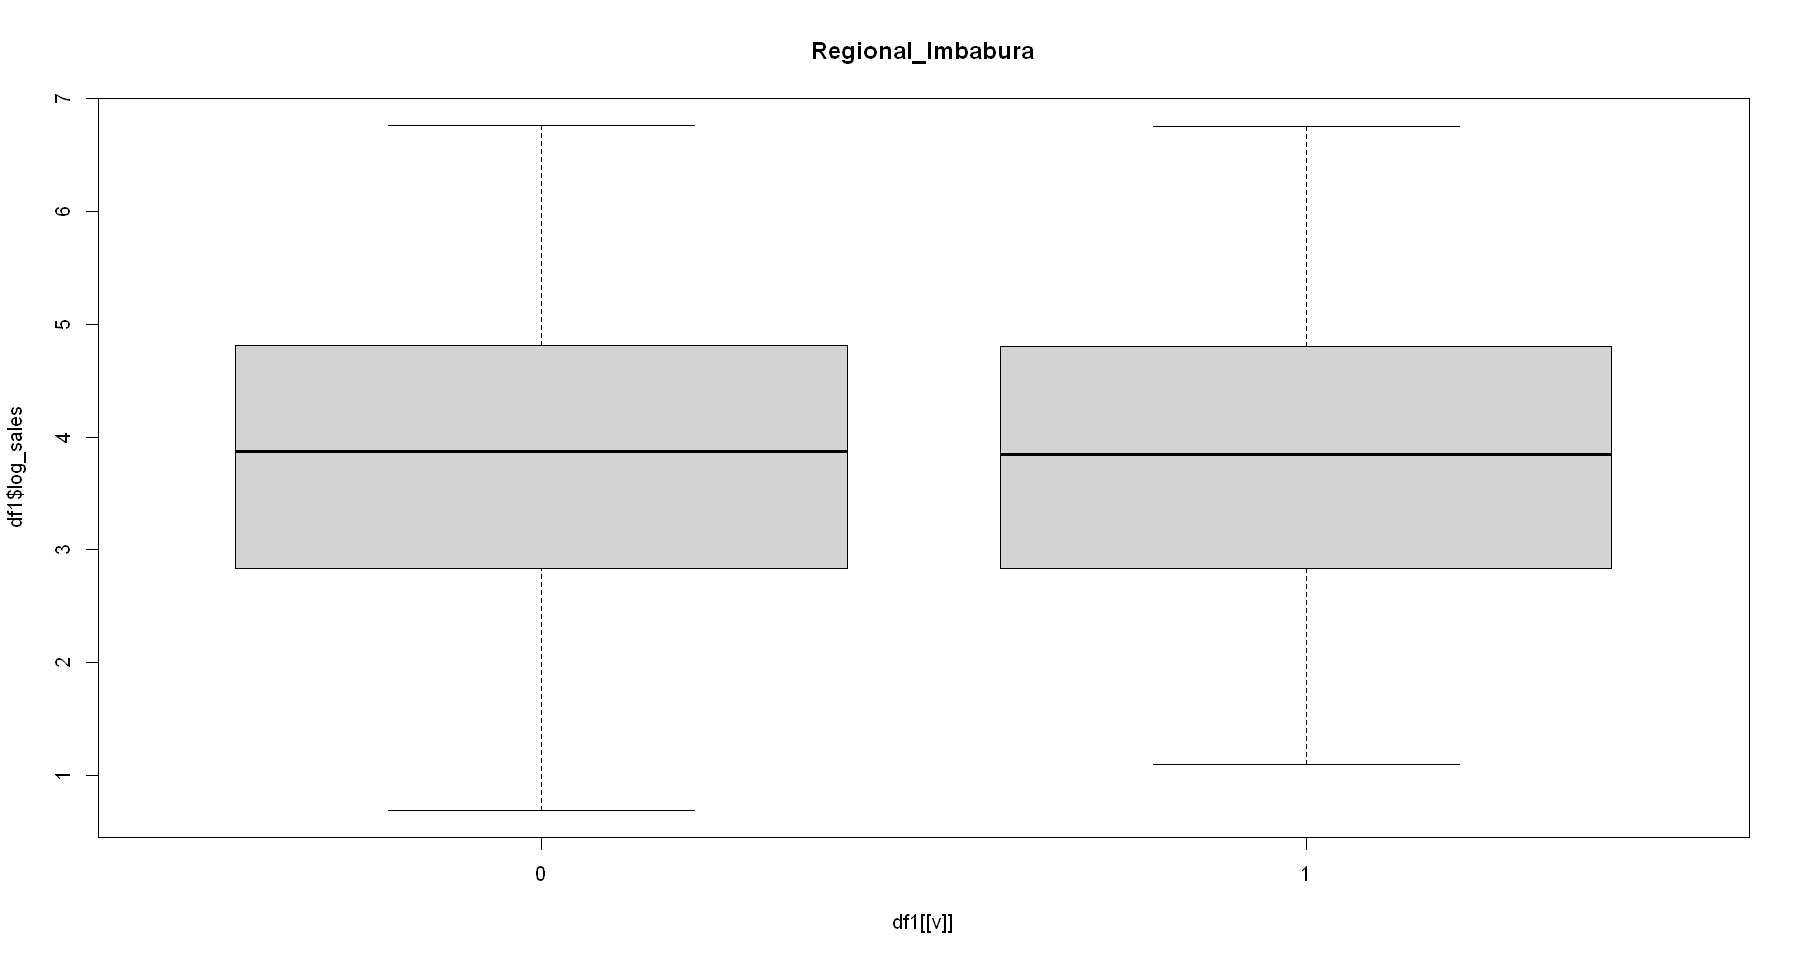

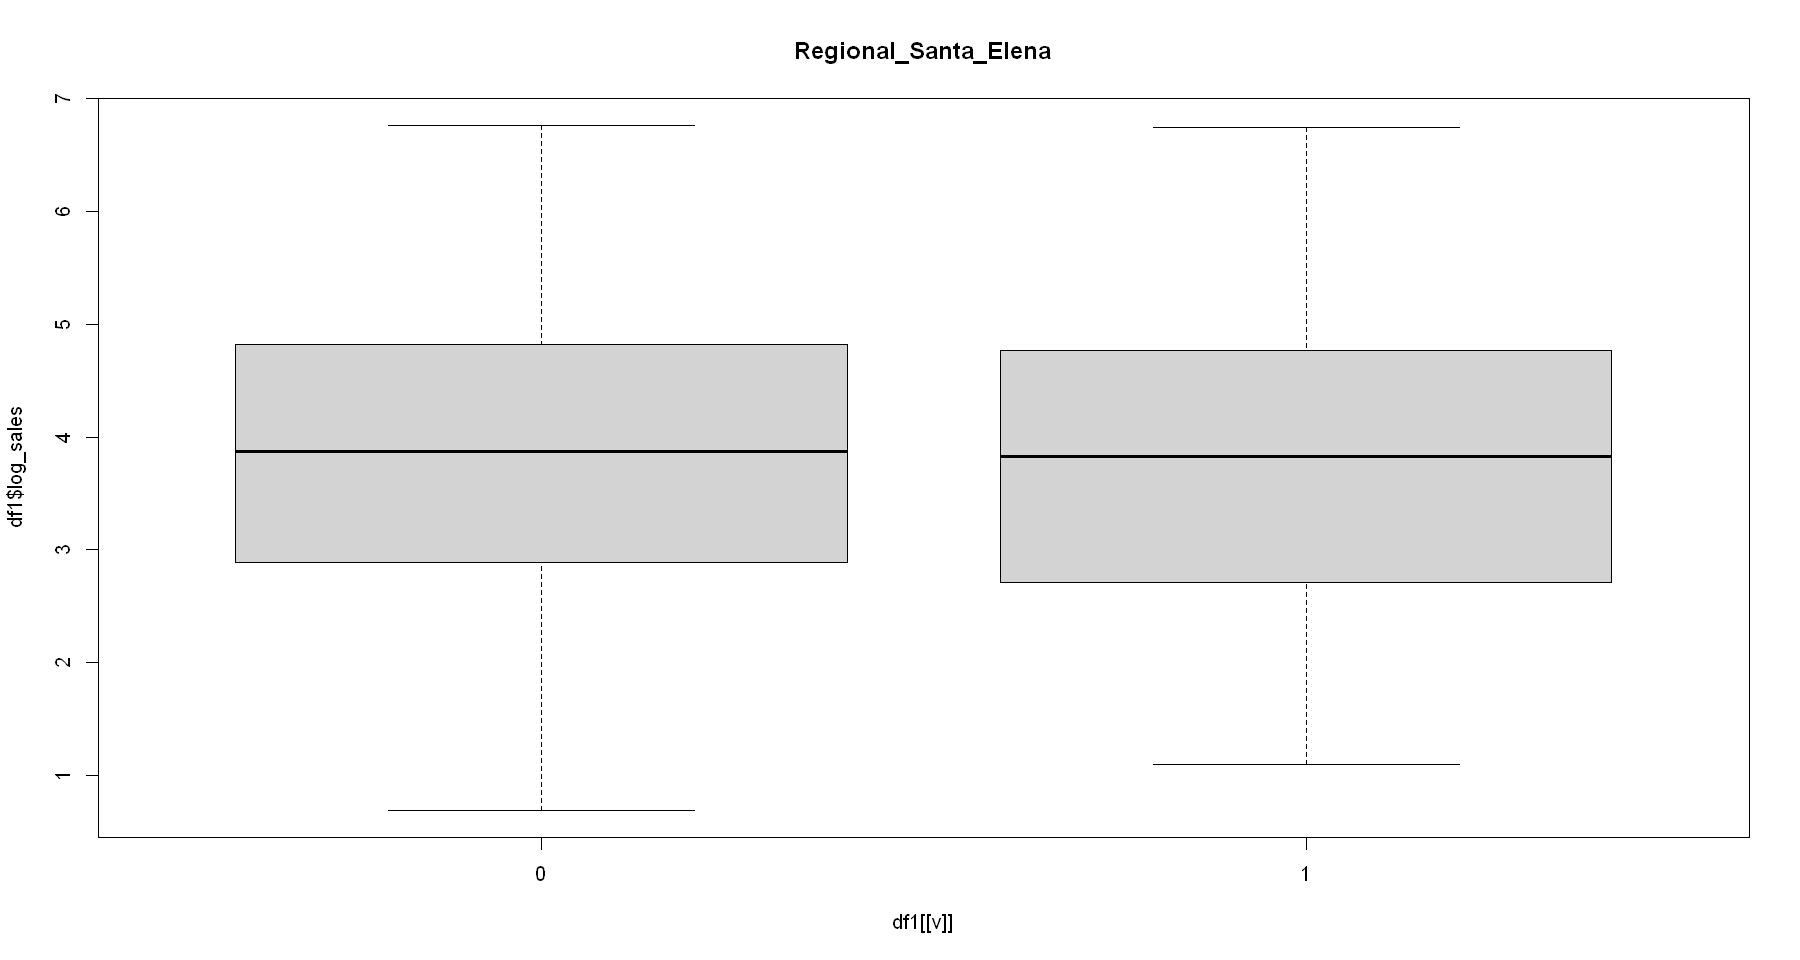

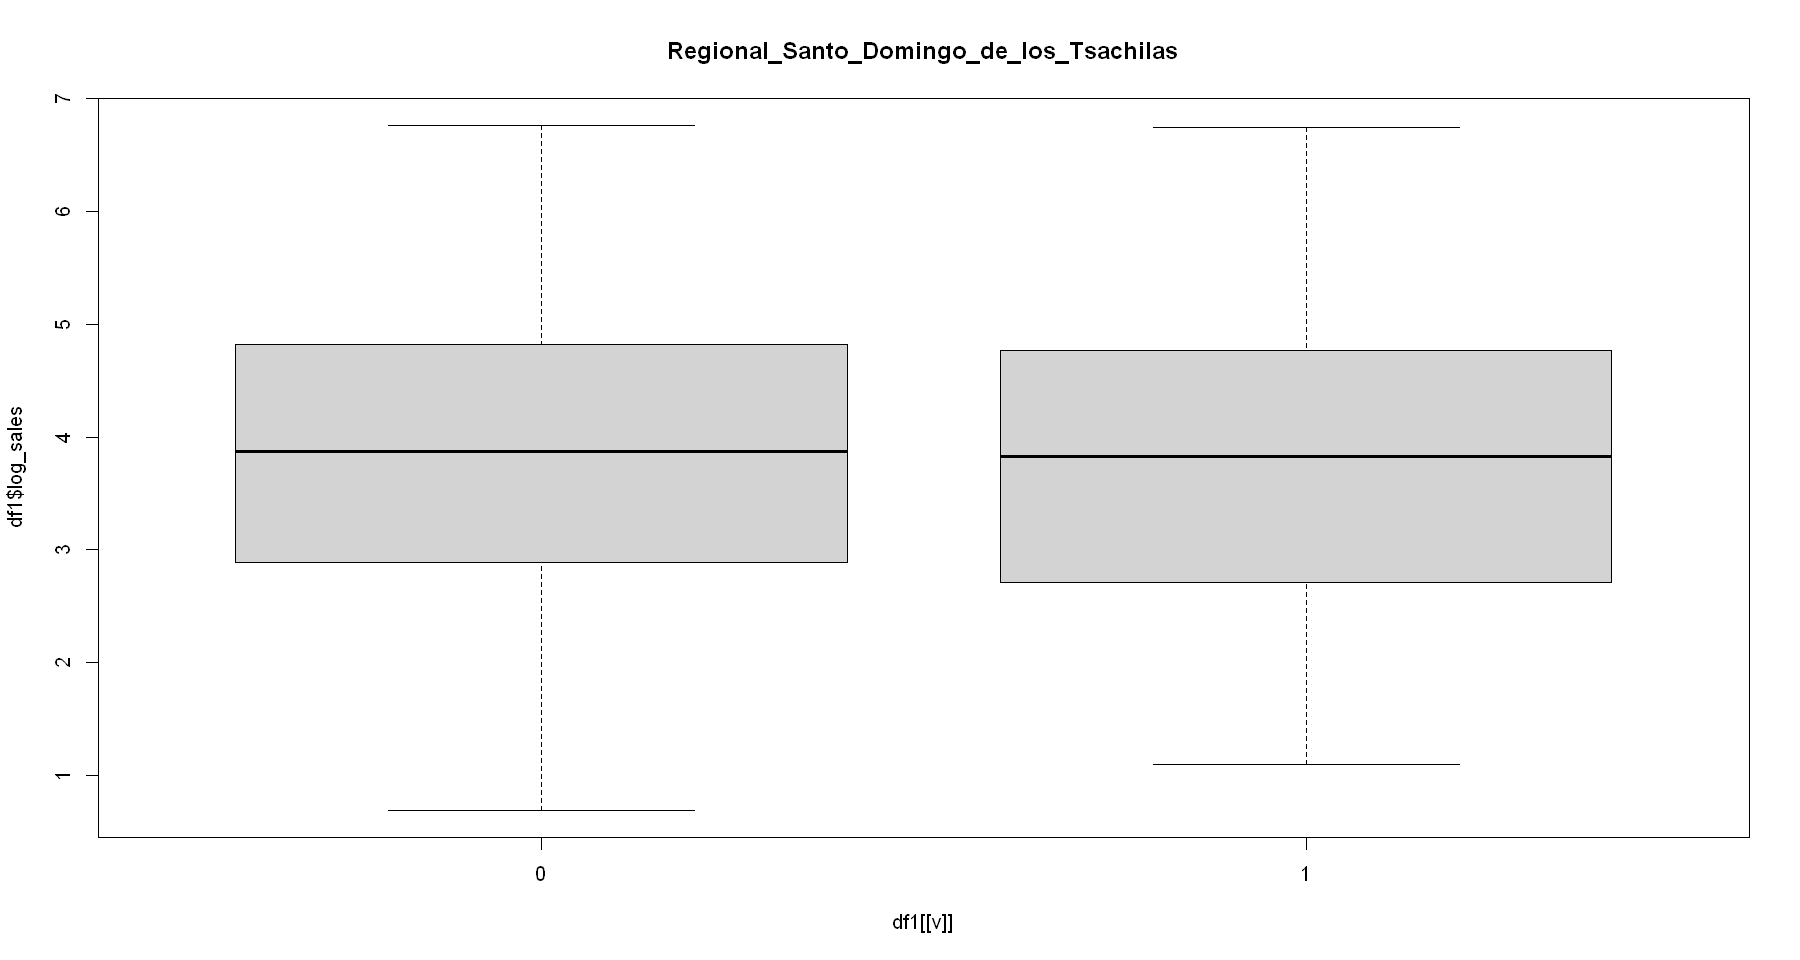

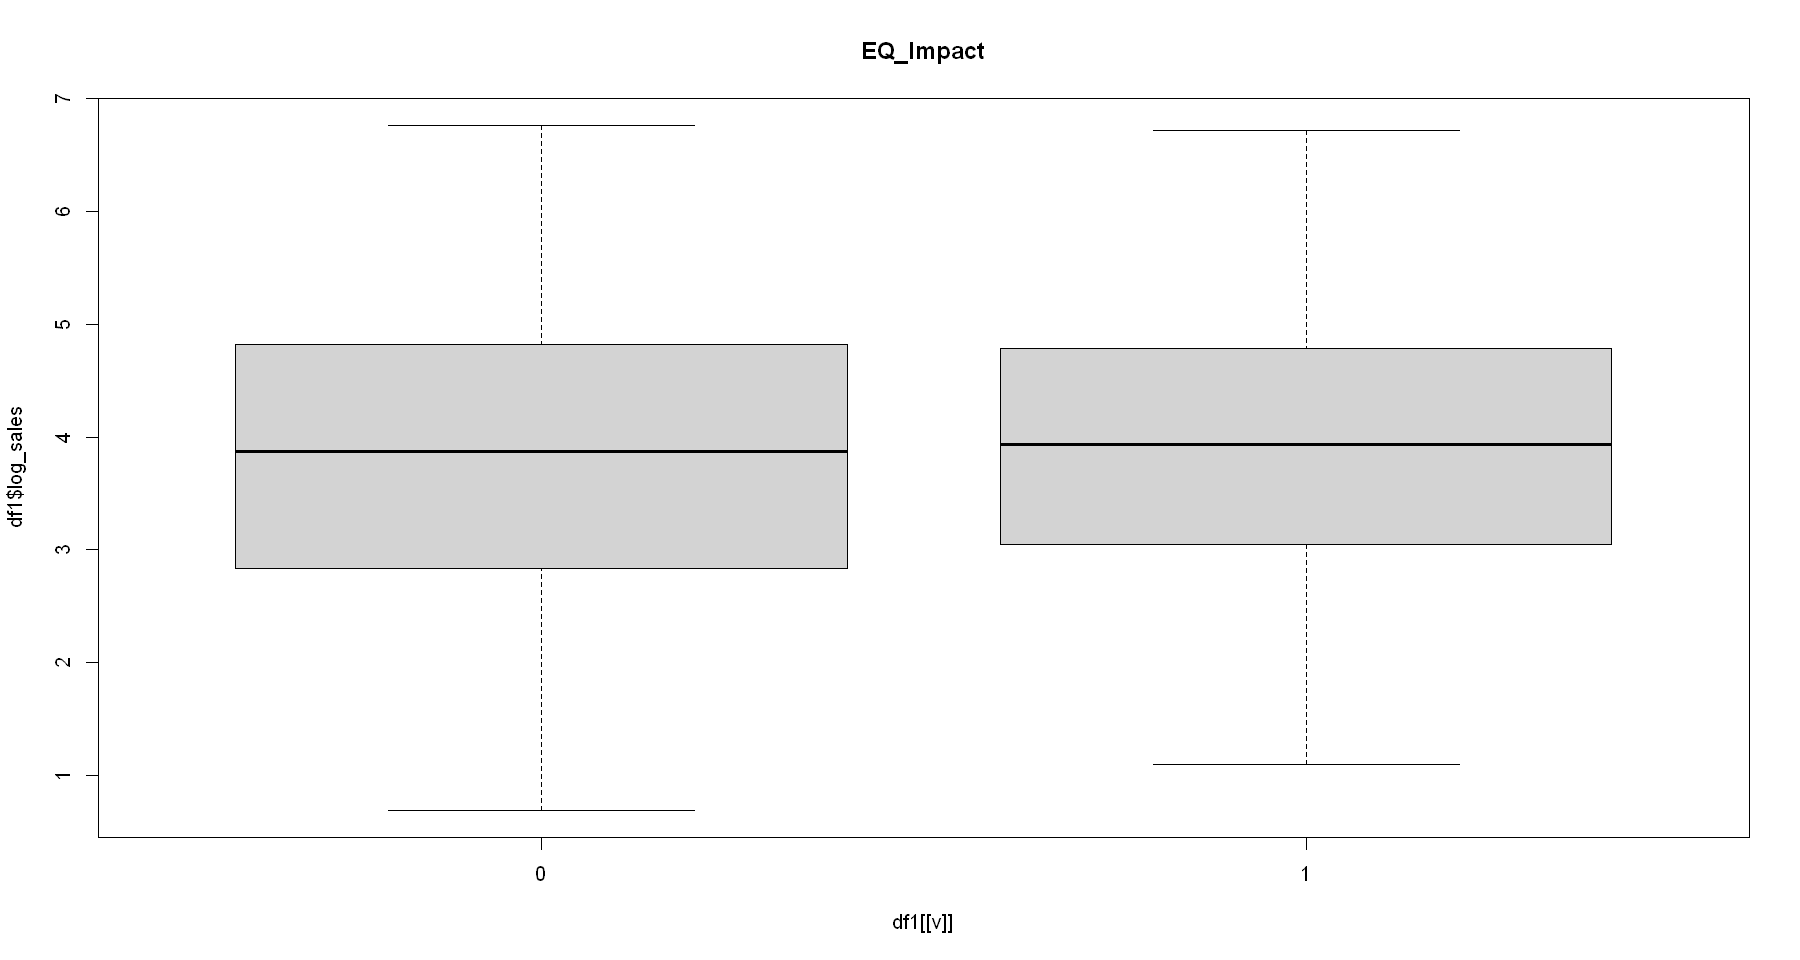

In [537]:
for (v in names(df1)) {
    if(is.factor(df1[[v]])==T) {
        boxplot(df1$log_sales ~ df1[[v]], main=v)
    }
}

In [892]:
### characters
strlst1 <- NULL
numlst1 <- NULL
for (v in names(df1)) {
    if(typeof(df1[[v]])=='character' | is.factor(df1[[v]])) {
        strlst1 <- c(strlst1,v) 
    } else {
        numlst1 <- c(numlst1, v)
    }
}
strlst1
numlst1

[1] "YYYY"                                   
 [2] "MM"                                     
 [3] "store_nbr"                              
 [4] "item_nbr"                               
 [5] "onpromotion"                            
 [6] "class"                                  
 [7] "city"                                   
 [8] "state"                                  
 [9] "store_type"                             
[10] "cluster"                                
[11] "locale_Ambato"                          
[12] "locale_Cayambe"                         
[13] "locale_Cuenca"                          
[14] "locale_El_Carmen"                       
[15] "locale_Esmeraldas"                      
[16] "locale_Guaranda"                        
[17] "locale_Guayaquil"                       
[18] "locale_Ibarra"                          
[19] "locale_Latacunga"                       
[20] "locale_Libertad"                        
[21] "locale_Loja"                            
[22] "locale_Machala"                         
[23] "locale_Manta"                           
[24] "locale_Puyo"                            
[25] "locale_Quevedo"                         
[26] "locale_Quito"                           
[27] "locale_Riobamba"                        
[28] "locale_Salinas"                         
[29] "locale_Santo_Domingo"                   
[30] "Regional_Cotopaxi"                      
[31] "Regional_Imbabura"                      
[32] "Regional_Santa_Elena"                   
[33] "Regional_Santo_Domingo_de_los_Tsachilas"
[34] "EQ_Impact"

[1] "sumtaransactions" "National_Ecuador" "averageoil"       "maxoil"          
[5] "minoil"           "log_sales"

In [893]:
# Numeric Variables

In [894]:
numvar <- NULL

for(v in names(df1)) {
  if(is.numeric(df1[[v]])==TRUE) {
    numvar <- c(numvar, v)
  }  
}

numvar

[1] "sumtaransactions" "National_Ecuador" "averageoil"       "maxoil"          
[5] "minoil"           "log_sales"

In [895]:
library(Hmisc)

cormat <- rcorr(as.matrix(df[,numvar]))

In [896]:
## correlation matrix
cormat1<-round(cormat$r,3)
cormat1<-as.matrix(cormat1)
cormat1


,sumtaransactions,National_Ecuador,averageoil,maxoil,minoil,log_sales
sumtaransactions,1.000,0.033,0.073,0.092,0.075,0.481
National_Ecuador,0.033,1.000,0.100,0.077,0.102,-0.013
averageoil,0.073,0.100,1.000,0.975,0.986,0.136
maxoil,0.092,0.077,0.975,1.000,0.979,0.156
minoil,0.075,0.102,0.986,0.979,1.000,0.145
log_sales,0.481,-0.013,0.136,0.156,0.145,1.000


In [897]:
## p-values
pmat<-cormat$P
pmat<-as.matrix(pmat)
pmat

,sumtaransactions,National_Ecuador,averageoil,maxoil,minoil,log_sales
sumtaransactions,NA,4.397512e-06,0,0,0,0.00000000
National_Ecuador,4.397512e-06,NA,0,0,0,0.07516067
averageoil,0.000000e+00,0.000000e+00,NA,0,0,0.00000000
maxoil,0.000000e+00,0.000000e+00,0,NA,0,0.00000000
minoil,0.000000e+00,0.000000e+00,0,0,NA,0.00000000
log_sales,0.000000e+00,7.516067e-02,0,0,0,NA


In [898]:
flattenCorrMatrix <- function(cormat, pmat) {
  ut <- upper.tri(cormat)
  data.frame(
    row = rownames(cormat)[row(cormat)[ut]],
    column = rownames(cormat)[col(cormat)[ut]],
    cor  =(cormat)[ut],
    p = pmat[ut]
  )
}
numcormat<- data.frame(flattenCorrMatrix(cormat1, pmat))
numcormat

row,column,cor,p
<chr>,<chr>,<dbl>,<dbl>
sumtaransactions,National_Ecuador,0.033,4.397512e-06
sumtaransactions,averageoil,0.073,0.000000e+00
National_Ecuador,averageoil,0.100,0.000000e+00
sumtaransactions,maxoil,0.092,0.000000e+00
National_Ecuador,maxoil,0.077,0.000000e+00
averageoil,maxoil,0.975,0.000000e+00
sumtaransactions,minoil,0.075,0.000000e+00
National_Ecuador,minoil,0.102,0.000000e+00
averageoil,minoil,0.986,0.000000e+00


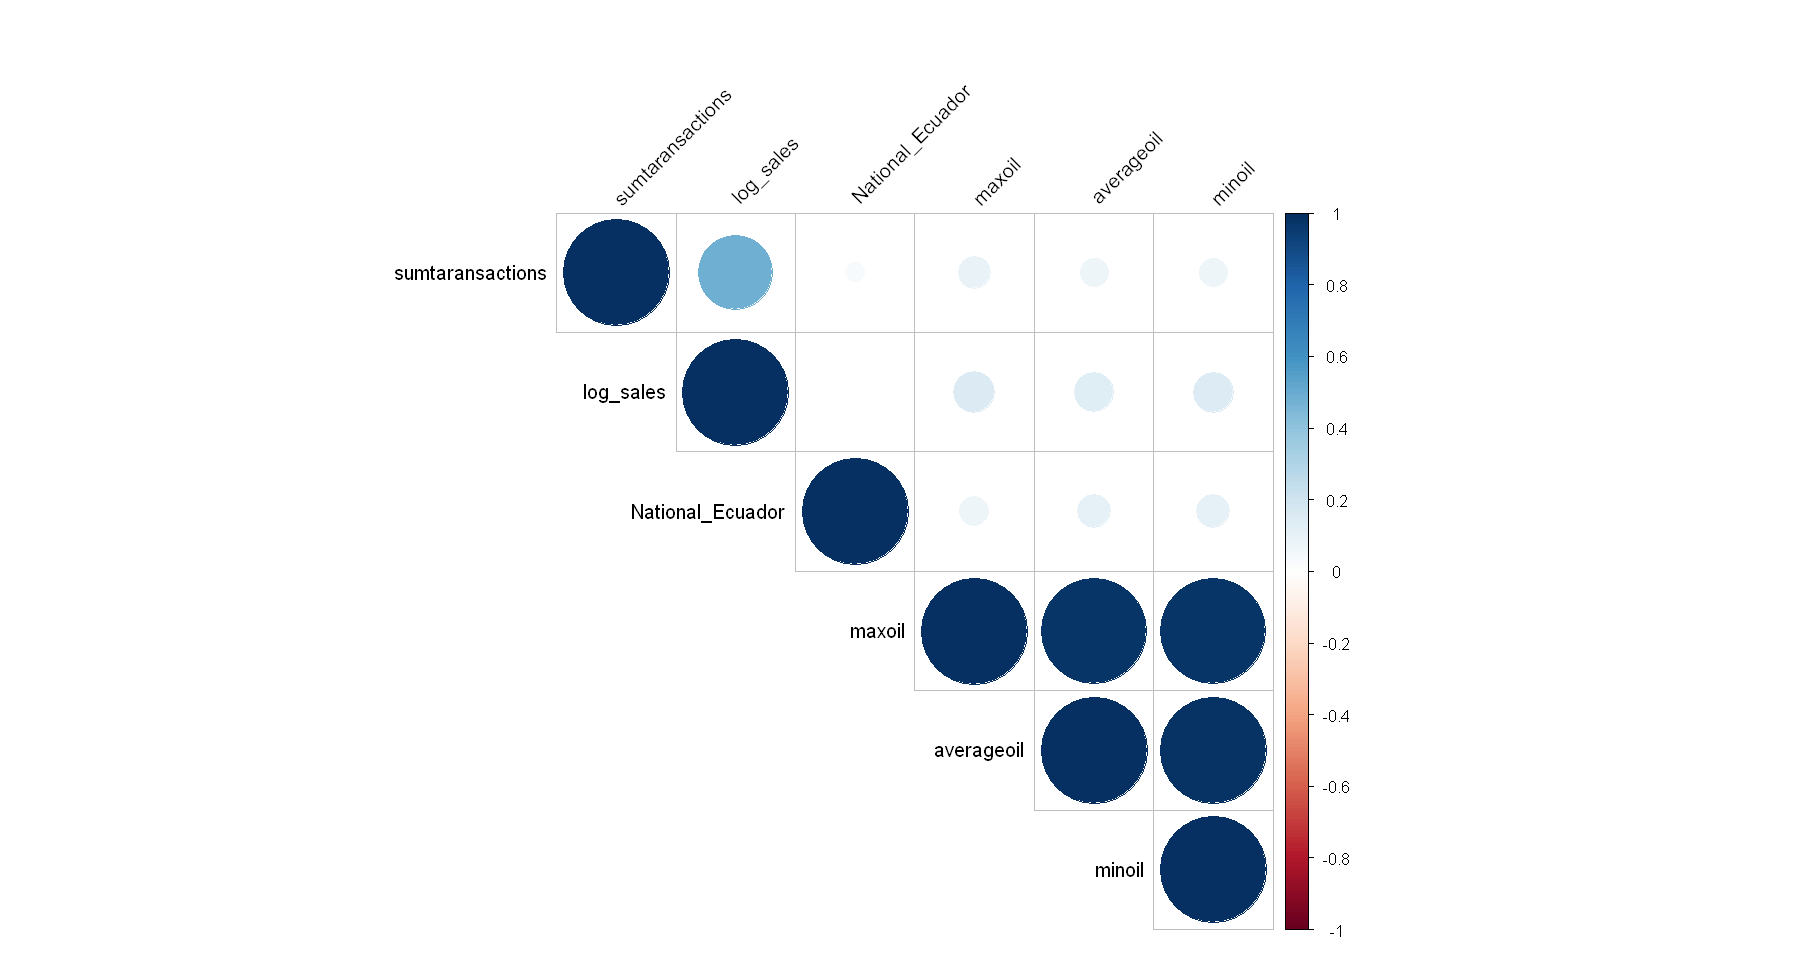

In [544]:
corrplot(cormat1, type = "upper", order = "hclust", 
         tl.col = "black", tl.srt = 45, p.mat = pmat, sig.level = 0.01, insig = "blank")

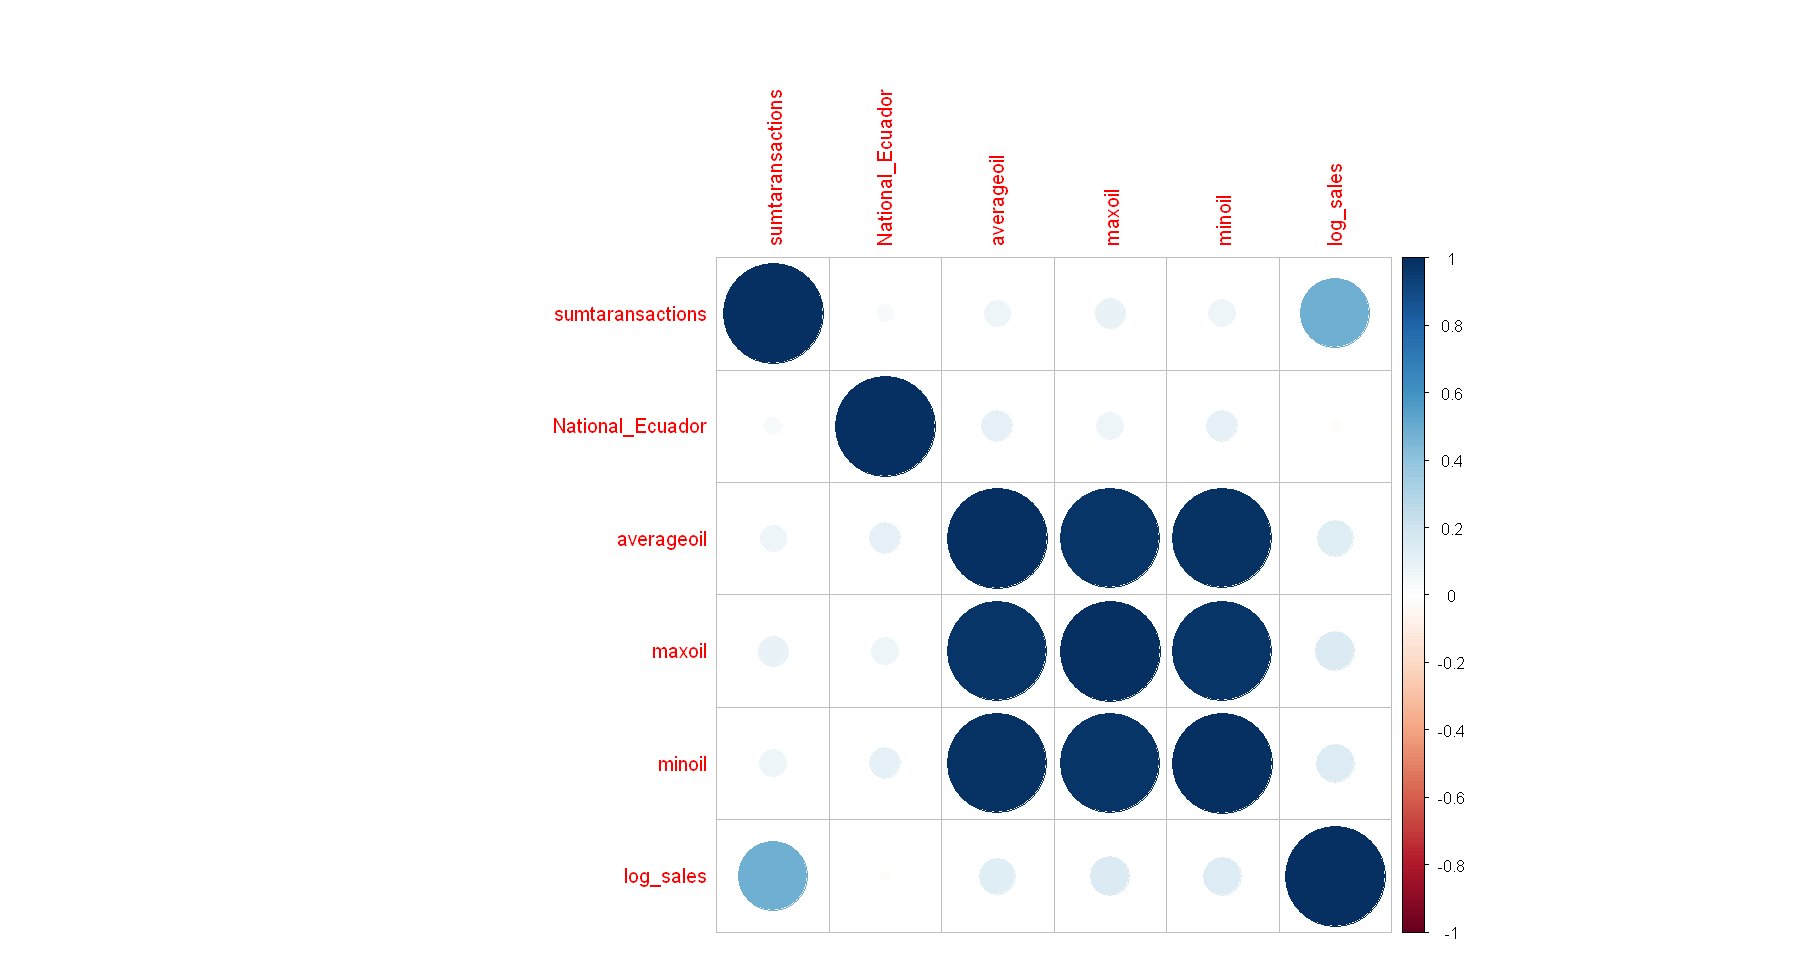

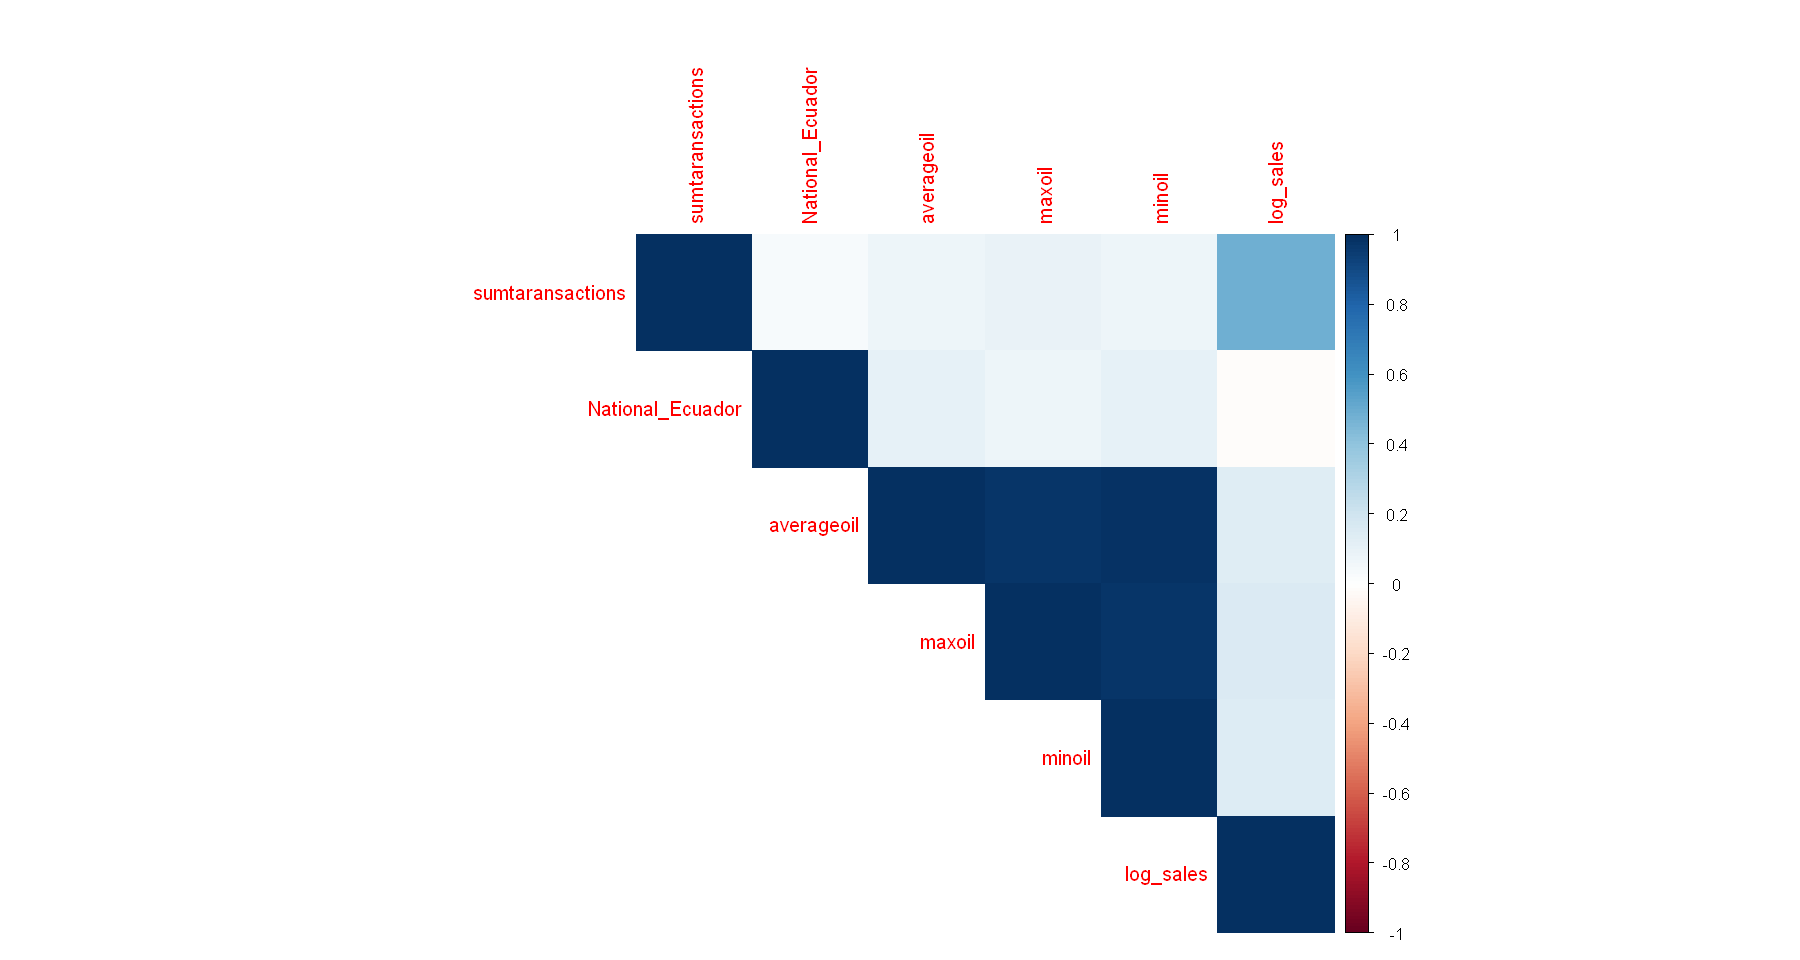

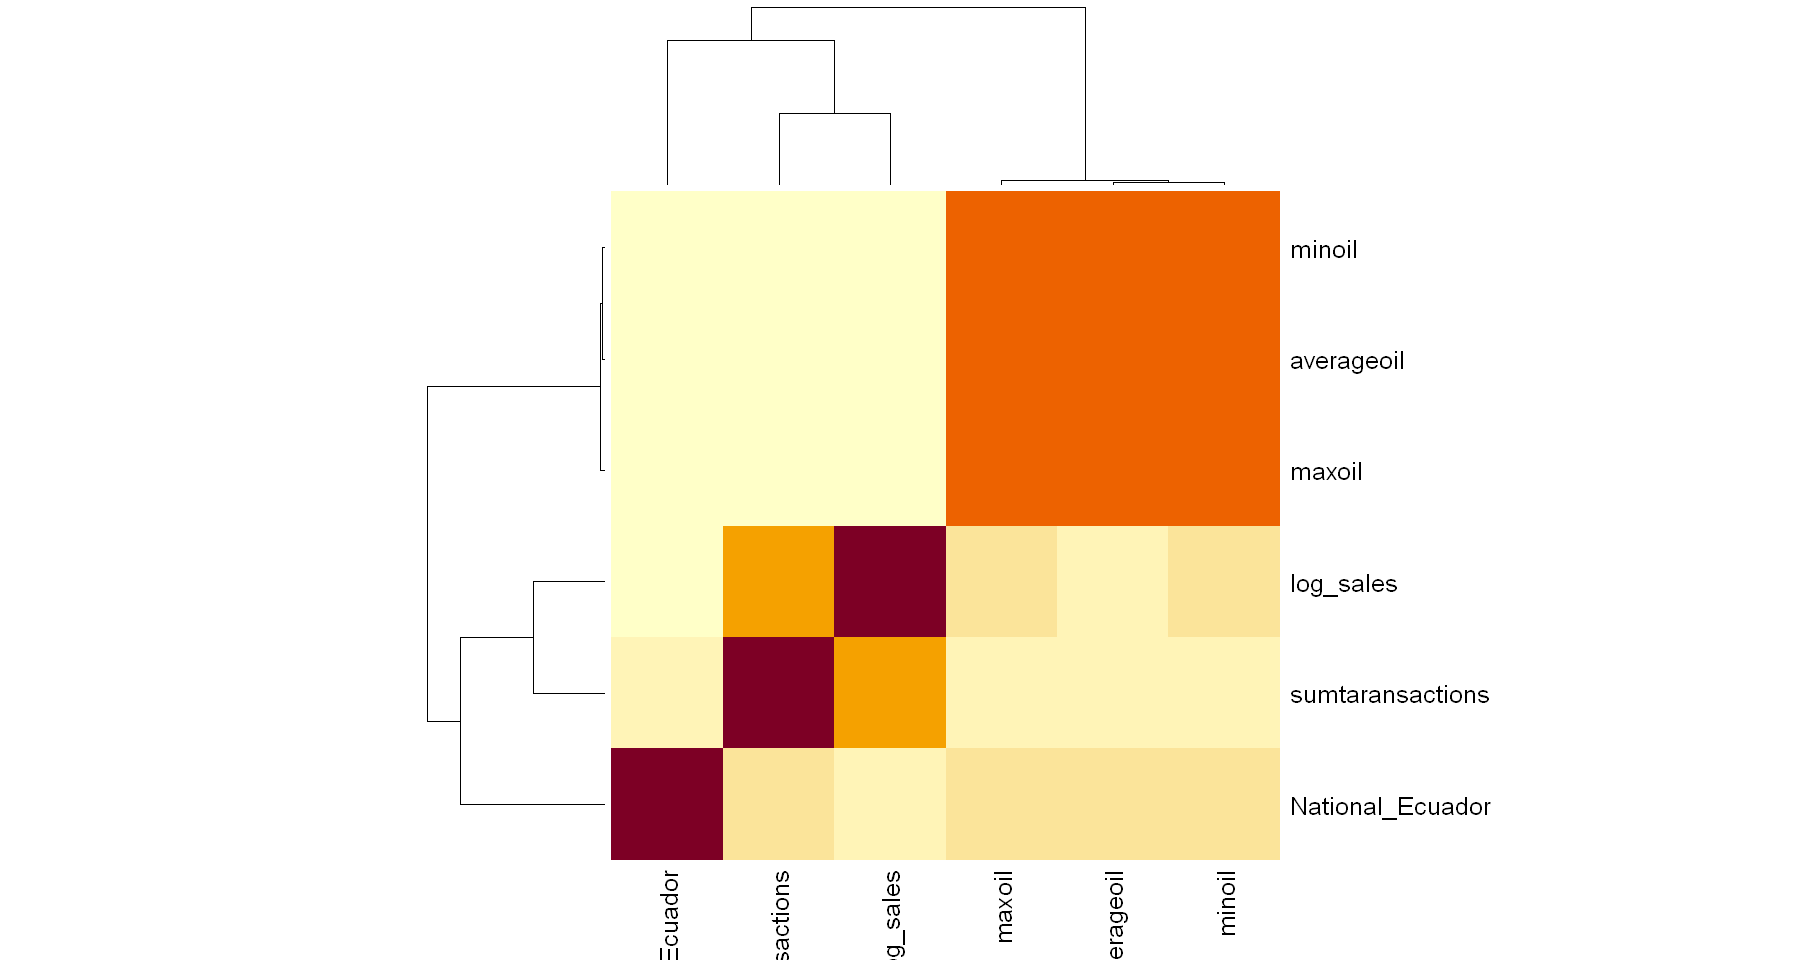

In [545]:
library(corrplot)
corrplot(cormat1)
## base
corrplot(cormat1,type = "upper",method = "color")
## another option:
heatmap(cormat1)


In [546]:
##Cramer's V - a correlation measure for categorial variables based on ChiSquare

In [765]:
names(df1)

[1] "YYYY"                                   
 [2] "MM"                                     
 [3] "store_nbr"                              
 [4] "item_nbr"                               
 [5] "onpromotion"                            
 [6] "class"                                  
 [7] "city"                                   
 [8] "state"                                  
 [9] "store_type"                             
[10] "cluster"                                
[11] "sumtaransactions"                       
[12] "locale_Ambato"                          
[13] "locale_Cayambe"                         
[14] "locale_Cuenca"                          
[15] "locale_El_Carmen"                       
[16] "locale_Esmeraldas"                      
[17] "locale_Guaranda"                        
[18] "locale_Guayaquil"                       
[19] "locale_Ibarra"                          
[20] "locale_Latacunga"                       
[21] "locale_Libertad"                        
[22] "locale_Loja"                            
[23] "locale_Machala"                         
[24] "locale_Manta"                           
[25] "locale_Puyo"                            
[26] "locale_Quevedo"                         
[27] "locale_Quito"                           
[28] "locale_Riobamba"                        
[29] "locale_Salinas"                         
[30] "locale_Santo_Domingo"                   
[31] "National_Ecuador"                       
[32] "Regional_Cotopaxi"                      
[33] "Regional_Imbabura"                      
[34] "Regional_Santa_Elena"                   
[35] "Regional_Santo_Domingo_de_los_Tsachilas"
[36] "averageoil"                             
[37] "maxoil"                                 
[38] "minoil"                                 
[39] "EQ_Impact"                              
[40] "log_sales"

In [766]:
head(df1)

,YYYY,MM,store_nbr,item_nbr,onpromotion,class,city,state,store_type,cluster,...,National_Ecuador,Regional_Cotopaxi,Regional_Imbabura,Regional_Santa_Elena,Regional_Santo_Domingo_de_los_Tsachilas,averageoil,maxoil,minoil,EQ_Impact,log_sales
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,...,<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
1,2013,1,7,695758,NA,2802,Quito,Pichincha,D,8,...,7,0,0,0,0,42,22,24,0,5.509388
2,2013,1,6,699745,NA,2802,Quito,Pichincha,D,13,...,7,0,0,0,0,42,22,24,0,4.553877
3,2013,1,26,741201,NA,2854,Guayaquil,Guayas,D,10,...,7,0,0,0,0,42,22,24,0,4.276666
4,2013,1,49,252698,NA,2806,Quito,Pichincha,A,11,...,7,0,0,0,0,42,22,24,0,5.811141
5,2013,1,23,589403,NA,2850,Ambato,Tungurahua,D,9,...,7,0,0,0,0,42,22,24,0,3.091042
6,2013,1,27,1110679,NA,2850,Daule,Guayas,D,1,...,7,0,0,0,0,42,22,24,0,4.127134


In [549]:
#summary(df2$Regional_Santo_Domingo_de_los_Tsachilas)
#summary(df2$Regional_Cotopaxi)
#summary(df2$Regional_Imbabura)
#summary(df2$Regional_Santa_Elena)
#summary(df2$Regional_Santo_Domingo_de_los_Tsachilas)


In [550]:
summary(df1[,strlst1])
head(df1[,strlst1])
dim(df1[,strlst1])
glimpse(df1[,strlst1])


   YYYY            MM         store_nbr        item_nbr    onpromotion 
 2013:1965   8      :1815   3      :  649   1247036:3435   False:8689  
 2014:3616   7      :1811   2      :  643   589403 :2845   True :8086  
 2015:5104   6      :1715   6      :  643   695758 :2433   NA's :2561  
 2016:5064   5      :1682   45     :  641   741201 :2400               
 2017:3587   4      :1665   48     :  641   1110679:2378               
             3      :1653   47     :  638   804098 :2174               
             (Other):8995   (Other):15481   (Other):3671               
  class                 city                                 state     
 2802:4282   Quito        :9493   Pichincha                     :9745  
 2806:1822   Guayaquil    :2399   Guayas                        :3283  
 2850:5223   Cuenca       :1291   Azuay                         :1291  
 2854:4574   Ambato       :1154   Tungurahua                    :1154  
 2864:3435   Santo Domingo: 737   Santo Domingo de los Tsachilas

,YYYY,MM,store_nbr,item_nbr,onpromotion,class,city,state,store_type,cluster,...,locale_Quevedo,locale_Quito,locale_Riobamba,locale_Salinas,locale_Santo_Domingo,Regional_Cotopaxi,Regional_Imbabura,Regional_Santa_Elena,Regional_Santo_Domingo_de_los_Tsachilas,EQ_Impact
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,...,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,2013,1,7,695758,NA,2802,Quito,Pichincha,D,8,...,0,0,0,0,0,0,0,0,0,0
2,2013,1,6,699745,NA,2802,Quito,Pichincha,D,13,...,0,0,0,0,0,0,0,0,0,0
3,2013,1,26,741201,NA,2854,Guayaquil,Guayas,D,10,...,0,0,0,0,0,0,0,0,0,0
4,2013,1,49,252698,NA,2806,Quito,Pichincha,A,11,...,0,0,0,0,0,0,0,0,0,0
5,2013,1,23,589403,NA,2850,Ambato,Tungurahua,D,9,...,0,0,0,0,0,0,0,0,0,0
6,2013,1,27,1110679,NA,2850,Daule,Guayas,D,1,...,0,0,0,0,0,0,0,0,0,0


[1] 19336    34

Rows: 19,336
Columns: 34
$ YYYY                                    <fct> 2013, 2013, 2013, 2013, 201...
$ MM                                      <fct> 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
$ store_nbr                               <fct> 7, 6, 26, 49, 23, 27, 4, 9,...
$ item_nbr                                <fct> 695758, 699745, 741201, 252...
$ onpromotion                             <fct> NA, NA, NA, NA, NA, NA, NA,...
$ class                                   <fct> 2802, 2802, 2854, 2806, 285...
$ city                                    <fct> Quito, Quito, Guayaquil, Qu...
$ state                                   <fct> Pichincha, Pichincha, Guaya...
$ store_type                              <fct> D, D, D, A, D, D, D, B, A, ...
$ cluster                                 <fct> 8, 13, 10, 11, 9, 1, 9, 6, ...
$ locale_Ambato                           <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
$ locale_Cayambe                          <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
$ locale_Cuenca            

In [767]:
strlst1<- NULL
numlst1 <- NULL
strlst1

NULL

In [768]:
for (v in names(df1)) {
    if(typeof(df1[[v]])=='character' | is.factor(df1[[v]])) {
        strlst1 <- c(strlst1,v) 
    } else {
        numlst1 <- c(numlst1, v)
    }
}
strlst1
numlst1

[1] "YYYY"                                   
 [2] "MM"                                     
 [3] "store_nbr"                              
 [4] "item_nbr"                               
 [5] "onpromotion"                            
 [6] "class"                                  
 [7] "city"                                   
 [8] "state"                                  
 [9] "store_type"                             
[10] "cluster"                                
[11] "locale_Ambato"                          
[12] "locale_Cayambe"                         
[13] "locale_Cuenca"                          
[14] "locale_El_Carmen"                       
[15] "locale_Esmeraldas"                      
[16] "locale_Guaranda"                        
[17] "locale_Guayaquil"                       
[18] "locale_Ibarra"                          
[19] "locale_Latacunga"                       
[20] "locale_Libertad"                        
[21] "locale_Loja"                            
[22] "locale_Machala"                         
[23] "locale_Manta"                           
[24] "locale_Puyo"                            
[25] "locale_Quevedo"                         
[26] "locale_Quito"                           
[27] "locale_Riobamba"                        
[28] "locale_Salinas"                         
[29] "locale_Santo_Domingo"                   
[30] "Regional_Cotopaxi"                      
[31] "Regional_Imbabura"                      
[32] "Regional_Santa_Elena"                   
[33] "Regional_Santo_Domingo_de_los_Tsachilas"
[34] "EQ_Impact"

[1] "sumtaransactions" "National_Ecuador" "averageoil"       "maxoil"          
[5] "minoil"           "log_sales"

In [553]:
summary(df1[,strlst1])

   YYYY            MM         store_nbr        item_nbr    onpromotion 
 2013:1965   8      :1815   3      :  649   1247036:3435   False:8689  
 2014:3616   7      :1811   2      :  643   589403 :2845   True :8086  
 2015:5104   6      :1715   6      :  643   695758 :2433   NA's :2561  
 2016:5064   5      :1682   45     :  641   741201 :2400               
 2017:3587   4      :1665   48     :  641   1110679:2378               
             3      :1653   47     :  638   804098 :2174               
             (Other):8995   (Other):15481   (Other):3671               
  class                 city                                 state     
 2802:4282   Quito        :9493   Pichincha                     :9745  
 2806:1822   Guayaquil    :2399   Guayas                        :3283  
 2850:5223   Cuenca       :1291   Azuay                         :1291  
 2854:4574   Ambato       :1154   Tungurahua                    :1154  
 2864:3435   Santo Domingo: 737   Santo Domingo de los Tsachilas

In [554]:
cv.test = function(x,y) {
  dd = chisq.test(x, y, correct=FALSE)
  CV = sqrt(dd$statistic /
    (length(x) * (min(length(unique(x)),length(unique(y))) - 1)))
    #print.noquote("Cramer V / Phi:")
  return(cbind('Cramer V'=as.numeric(CV),'p-value'=dd$p.value))
}


In [555]:
cats_corr <- NULL
for (i in strlst1) {
    for (j in strlst1){
        cats_corr <- rbind(cats_corr,cbind(i,j,(cv.test(df1[[i]],df1[[j]]))))
        #cats_corr <- data.frame(cats_corr)
        row.names(cats_corr) <- NULL
        #cats_corr$Cramer.V <- round(as.numeric(cats_corr$Cramer.V),5)
        #cats_corr$p.value <- round(as.numeric(cats_corr$p.value),5)
    }
}
cats_corr <- data.frame(cats_corr)
cats_corr$Cramer.V <- round(as.numeric(cats_corr$Cramer.V),5)
cats_corr$p.value <- round(as.numeric(cats_corr$p.value),5)

cats_corr_sig<-cats_corr%>% filter(p.value<=0.05) 
cats_corr_sig_dominant<-cats_corr_sig%>% filter(Cramer.V>=0.3) 
#cats_corr[1:25,]


Warning message in chisq.test(x, y, correct = FALSE):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(x, y, correct = FALSE):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(x, y, correct = FALSE):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(x, y, correct = FALSE):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(x, y, correct = FALSE):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(x, y, correct = FALSE):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(x, y, correct = FALSE):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(x, y, correct = FALSE):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(x, y, correct = FALSE):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(x, y, correct = FALSE):
"Chi-squared approximation may be incorrect"
Warning me

In [556]:
cats_corr_sig_dominant[1:50,]

,i,j,Cramer.V,p.value
,<chr>,<chr>,<dbl>,<dbl>
1,YYYY,YYYY,1.00000,0
2,YYYY,EQ_Impact,0.35058,0
3,MM,MM,1.00000,0
4,MM,locale_Ambato,0.70362,0
5,MM,locale_Cayambe,0.70362,0
6,MM,locale_Cuenca,0.70362,0
7,MM,locale_El_Carmen,0.70362,0
8,MM,locale_Esmeraldas,0.70362,0
9,MM,locale_Guaranda,0.70362,0


In [348]:
cats_corr_sig_dominant[1:50,]

,i,j,Cramer.V,p.value
,<chr>,<chr>,<dbl>,<dbl>
1,YYYY,YYYY,1.00000,0
2,YYYY,EQ_Impact,0.35058,0
3,MM,MM,1.00000,0
4,MM,locale_Ambato,0.70362,0
5,MM,locale_Cayambe,0.70362,0
6,MM,locale_Cuenca,0.70362,0
7,MM,locale_El_Carmen,0.70362,0
8,MM,locale_Esmeraldas,0.70362,0
9,MM,locale_Guaranda,0.70362,0


In [557]:
cats_corr_sig_dominant[51:100,]

,i,j,Cramer.V,p.value
,<chr>,<chr>,<dbl>,<dbl>
51,store_type,store_nbr,1.00000,0
52,store_type,item_nbr,0.39082,0
53,store_type,city,0.60848,0
54,store_type,state,0.48702,0
55,store_type,store_type,1.00000,0
56,store_type,cluster,0.92821,0
57,cluster,store_nbr,1.00000,0
58,cluster,city,0.60927,0
59,cluster,state,0.57728,0


In [558]:
cats_corr_sig[1:50,]

,i,j,Cramer.V,p.value
,<chr>,<chr>,<dbl>,<dbl>
1,YYYY,YYYY,1.00000,0
2,YYYY,MM,0.16555,0
3,YYYY,store_nbr,0.11002,0
4,YYYY,item_nbr,0.07974,0
5,YYYY,onpromotion,0.03364,0
6,YYYY,class,0.07584,0
7,YYYY,city,0.06068,0
8,YYYY,state,0.05763,0
9,YYYY,store_type,0.03191,0


In [559]:
cats_corr_sig[51:100,]

,i,j,Cramer.V,p.value
,<chr>,<chr>,<dbl>,<dbl>
51,MM,locale_Puyo,0.70362,0.00000
52,MM,locale_Quevedo,0.70362,0.00000
53,MM,locale_Quito,0.70362,0.00000
54,MM,locale_Riobamba,0.70362,0.00000
55,MM,locale_Salinas,0.70362,0.00000
56,MM,locale_Santo_Domingo,0.70362,0.00000
57,MM,Regional_Cotopaxi,0.70362,0.00000
58,MM,Regional_Imbabura,0.70362,0.00000
59,MM,Regional_Santa_Elena,0.70362,0.00000


In [560]:
cats_corr_sig[101:150,]

,i,j,Cramer.V,p.value
,<chr>,<chr>,<dbl>,<dbl>
101,city,store_nbr,1.00000,0
102,city,item_nbr,0.23415,0
103,city,class,0.20828,0
104,city,city,1.00000,0
105,city,state,1.00000,0
106,city,store_type,0.60848,0
107,city,cluster,0.60927,0
108,state,YYYY,0.05763,0
109,state,store_nbr,1.00000,0


In [561]:
cats_corr_sig[151:200,]

,i,j,Cramer.V,p.value
,<chr>,<chr>,<dbl>,<dbl>
151,locale_Ambato,locale_Salinas,0.09053,0
152,locale_Ambato,locale_Santo_Domingo,0.10283,0
153,locale_Ambato,Regional_Cotopaxi,0.09819,0
154,locale_Ambato,Regional_Imbabura,0.09980,0
155,locale_Ambato,Regional_Santa_Elena,0.44294,0
156,locale_Ambato,Regional_Santo_Domingo_de_los_Tsachilas,0.44294,0
157,locale_Ambato,EQ_Impact,0.09445,0
158,locale_Cayambe,YYYY,0.03850,0
159,locale_Cayambe,MM,0.70362,0


In [562]:
cats_corr_sig[201:250,]

,i,j,Cramer.V,p.value
,<chr>,<chr>,<dbl>,<dbl>
201,locale_Cuenca,locale_Quevedo,0.06214,0
202,locale_Cuenca,locale_Quito,0.06179,0
203,locale_Cuenca,locale_Riobamba,0.46074,0
204,locale_Cuenca,locale_Salinas,0.06179,0
205,locale_Cuenca,locale_Santo_Domingo,0.07019,0
206,locale_Cuenca,Regional_Cotopaxi,0.70362,0
207,locale_Cuenca,Regional_Imbabura,0.06811,0
208,locale_Cuenca,Regional_Santa_Elena,0.06181,0
209,locale_Cuenca,Regional_Santo_Domingo_de_los_Tsachilas,0.06181,0


In [563]:
cats_corr_sig[251:300,]

,i,j,Cramer.V,p.value
,<chr>,<chr>,<dbl>,<dbl>
251,locale_Esmeraldas,locale_Manta,0.07000,0
252,locale_Esmeraldas,locale_Puyo,0.07067,0
253,locale_Esmeraldas,locale_Quevedo,0.06516,0
254,locale_Esmeraldas,locale_Quito,0.06479,0
255,locale_Esmeraldas,locale_Riobamba,0.48312,0
256,locale_Esmeraldas,locale_Salinas,0.06479,0
257,locale_Esmeraldas,locale_Santo_Domingo,0.07360,0
258,locale_Esmeraldas,Regional_Cotopaxi,0.07027,0
259,locale_Esmeraldas,Regional_Imbabura,0.07142,0


In [564]:
cats_corr_sig[301:350,]

,i,j,Cramer.V,p.value
,<chr>,<chr>,<dbl>,<dbl>
301,locale_Guayaquil,locale_Loja,0.06471,0
302,locale_Guayaquil,locale_Machala,0.07134,0
303,locale_Guayaquil,locale_Manta,0.06991,0
304,locale_Guayaquil,locale_Puyo,0.07058,0
305,locale_Guayaquil,locale_Quevedo,0.06508,0
306,locale_Guayaquil,locale_Quito,0.06471,0
307,locale_Guayaquil,locale_Riobamba,0.10719,0
308,locale_Guayaquil,locale_Salinas,0.06471,0
309,locale_Guayaquil,locale_Santo_Domingo,0.70362,0


In [565]:
cats_corr_sig[351:400,]

,i,j,Cramer.V,p.value
,<chr>,<chr>,<dbl>,<dbl>
351,locale_Latacunga,locale_Latacunga,0.70362,0
352,locale_Latacunga,locale_Libertad,0.09636,0
353,locale_Latacunga,locale_Loja,0.08884,0
354,locale_Latacunga,locale_Machala,0.49735,0
355,locale_Latacunga,locale_Manta,0.09598,0
356,locale_Latacunga,locale_Puyo,0.09690,0
357,locale_Latacunga,locale_Quevedo,0.08935,0
358,locale_Latacunga,locale_Quito,0.08884,0
359,locale_Latacunga,locale_Riobamba,0.14716,0


In [566]:
cats_corr_sig[401:450,]

,i,j,Cramer.V,p.value
,<chr>,<chr>,<dbl>,<dbl>
401,locale_Loja,locale_Guaranda,0.08884,0
402,locale_Loja,locale_Guayaquil,0.06471,0
403,locale_Loja,locale_Ibarra,0.05660,0
404,locale_Loja,locale_Latacunga,0.08884,0
405,locale_Loja,locale_Libertad,0.06179,0
406,locale_Loja,locale_Loja,0.70362,0
407,locale_Loja,locale_Machala,0.06280,0
408,locale_Loja,locale_Manta,0.06154,0
409,locale_Loja,locale_Puyo,0.06213,0


In [567]:
cats_corr_sig[451:500,]

,i,j,Cramer.V,p.value
,<chr>,<chr>,<dbl>,<dbl>
451,locale_Manta,locale_El_Carmen,0.06991,0.00000
452,locale_Manta,locale_Esmeraldas,0.07000,0.00000
453,locale_Manta,locale_Guaranda,0.09598,0.00000
454,locale_Manta,locale_Guayaquil,0.06991,0.00000
455,locale_Manta,locale_Ibarra,0.06115,0.00000
456,locale_Manta,locale_Latacunga,0.09598,0.00000
457,locale_Manta,locale_Libertad,0.06675,0.00000
458,locale_Manta,locale_Loja,0.06154,0.00000
459,locale_Manta,locale_Machala,0.06784,0.00000


In [568]:
cats_corr_sig[501:550,]

,i,j,Cramer.V,p.value
,<chr>,<chr>,<dbl>,<dbl>
501,locale_Quevedo,locale_Ambato,0.09104,0
502,locale_Quevedo,locale_Cayambe,0.06508,0
503,locale_Quevedo,locale_Cuenca,0.06214,0
504,locale_Quevedo,locale_El_Carmen,0.06508,0
505,locale_Quevedo,locale_Esmeraldas,0.06516,0
506,locale_Quevedo,locale_Guaranda,0.08935,0
507,locale_Quevedo,locale_Guayaquil,0.06508,0
508,locale_Quevedo,locale_Ibarra,0.05692,0
509,locale_Quevedo,locale_Latacunga,0.08935,0


In [569]:
cats_corr_sig[551:600,]

,i,j,Cramer.V,p.value
,<chr>,<chr>,<dbl>,<dbl>
551,locale_Riobamba,YYYY,0.06149,0.00000
552,locale_Riobamba,MM,0.70362,0.00000
553,locale_Riobamba,onpromotion,0.01337,0.00857
554,locale_Riobamba,locale_Ambato,0.31077,0.00000
555,locale_Riobamba,locale_Cayambe,0.10719,0.00000
556,locale_Riobamba,locale_Cuenca,0.46074,0.00000
557,locale_Riobamba,locale_El_Carmen,0.10719,0.00000
558,locale_Riobamba,locale_Esmeraldas,0.48312,0.00000
559,locale_Riobamba,locale_Guaranda,0.14716,0.00000


In [570]:
cats_corr_sig[601:650,]

,i,j,Cramer.V,p.value
,<chr>,<chr>,<dbl>,<dbl>
601,locale_Salinas,Regional_Santa_Elena,0.05699,0
602,locale_Salinas,Regional_Santo_Domingo_de_los_Tsachilas,0.05699,0
603,locale_Salinas,EQ_Impact,0.05943,0
604,locale_Santo_Domingo,YYYY,0.03850,0
605,locale_Santo_Domingo,MM,0.70362,0
606,locale_Santo_Domingo,locale_Ambato,0.10283,0
607,locale_Santo_Domingo,locale_Cayambe,0.70362,0
608,locale_Santo_Domingo,locale_Cuenca,0.07019,0
609,locale_Santo_Domingo,locale_El_Carmen,0.70362,0


In [571]:
cats_corr_sig[651:700,]

,i,j,Cramer.V,p.value
,<chr>,<chr>,<dbl>,<dbl>
651,Regional_Cotopaxi,locale_Santo_Domingo,0.07019,0
652,Regional_Cotopaxi,Regional_Cotopaxi,0.70362,0
653,Regional_Cotopaxi,Regional_Imbabura,0.06811,0
654,Regional_Cotopaxi,Regional_Santa_Elena,0.06181,0
655,Regional_Cotopaxi,Regional_Santo_Domingo_de_los_Tsachilas,0.06181,0
656,Regional_Cotopaxi,EQ_Impact,0.30984,0
657,Regional_Imbabura,YYYY,0.04066,0
658,Regional_Imbabura,MM,0.70362,0
659,Regional_Imbabura,locale_Ambato,0.09980,0


In [572]:
cats_corr_sig[701:750,]

,i,j,Cramer.V,p.value
,<chr>,<chr>,<dbl>,<dbl>
701,Regional_Santa_Elena,locale_Riobamba,0.09440,0.00000
702,Regional_Santa_Elena,locale_Salinas,0.05699,0.00000
703,Regional_Santa_Elena,locale_Santo_Domingo,0.06474,0.00000
704,Regional_Santa_Elena,Regional_Cotopaxi,0.06181,0.00000
705,Regional_Santa_Elena,Regional_Imbabura,0.06282,0.00000
706,Regional_Santa_Elena,Regional_Santa_Elena,0.70362,0.00000
707,Regional_Santa_Elena,Regional_Santo_Domingo_de_los_Tsachilas,0.70362,0.00000
708,Regional_Santa_Elena,EQ_Impact,0.05946,0.00000
709,Regional_Santo_Domingo_de_los_Tsachilas,YYYY,0.10121,0.00000


In [573]:
cats_corr_sig[751:762,]

,i,j,Cramer.V,p.value
,<chr>,<chr>,<dbl>,<dbl>
751,EQ_Impact,locale_Manta,0.06421,0
752,EQ_Impact,locale_Puyo,0.30046,0
753,EQ_Impact,locale_Quevedo,0.05977,0
754,EQ_Impact,locale_Quito,0.05943,0
755,EQ_Impact,locale_Riobamba,0.17505,0
756,EQ_Impact,locale_Salinas,0.05943,0
757,EQ_Impact,locale_Santo_Domingo,0.06751,0
758,EQ_Impact,Regional_Cotopaxi,0.30984,0
759,EQ_Impact,Regional_Imbabura,0.06552,0


In [769]:
df2$city

NULL

In [575]:
#   Outcome

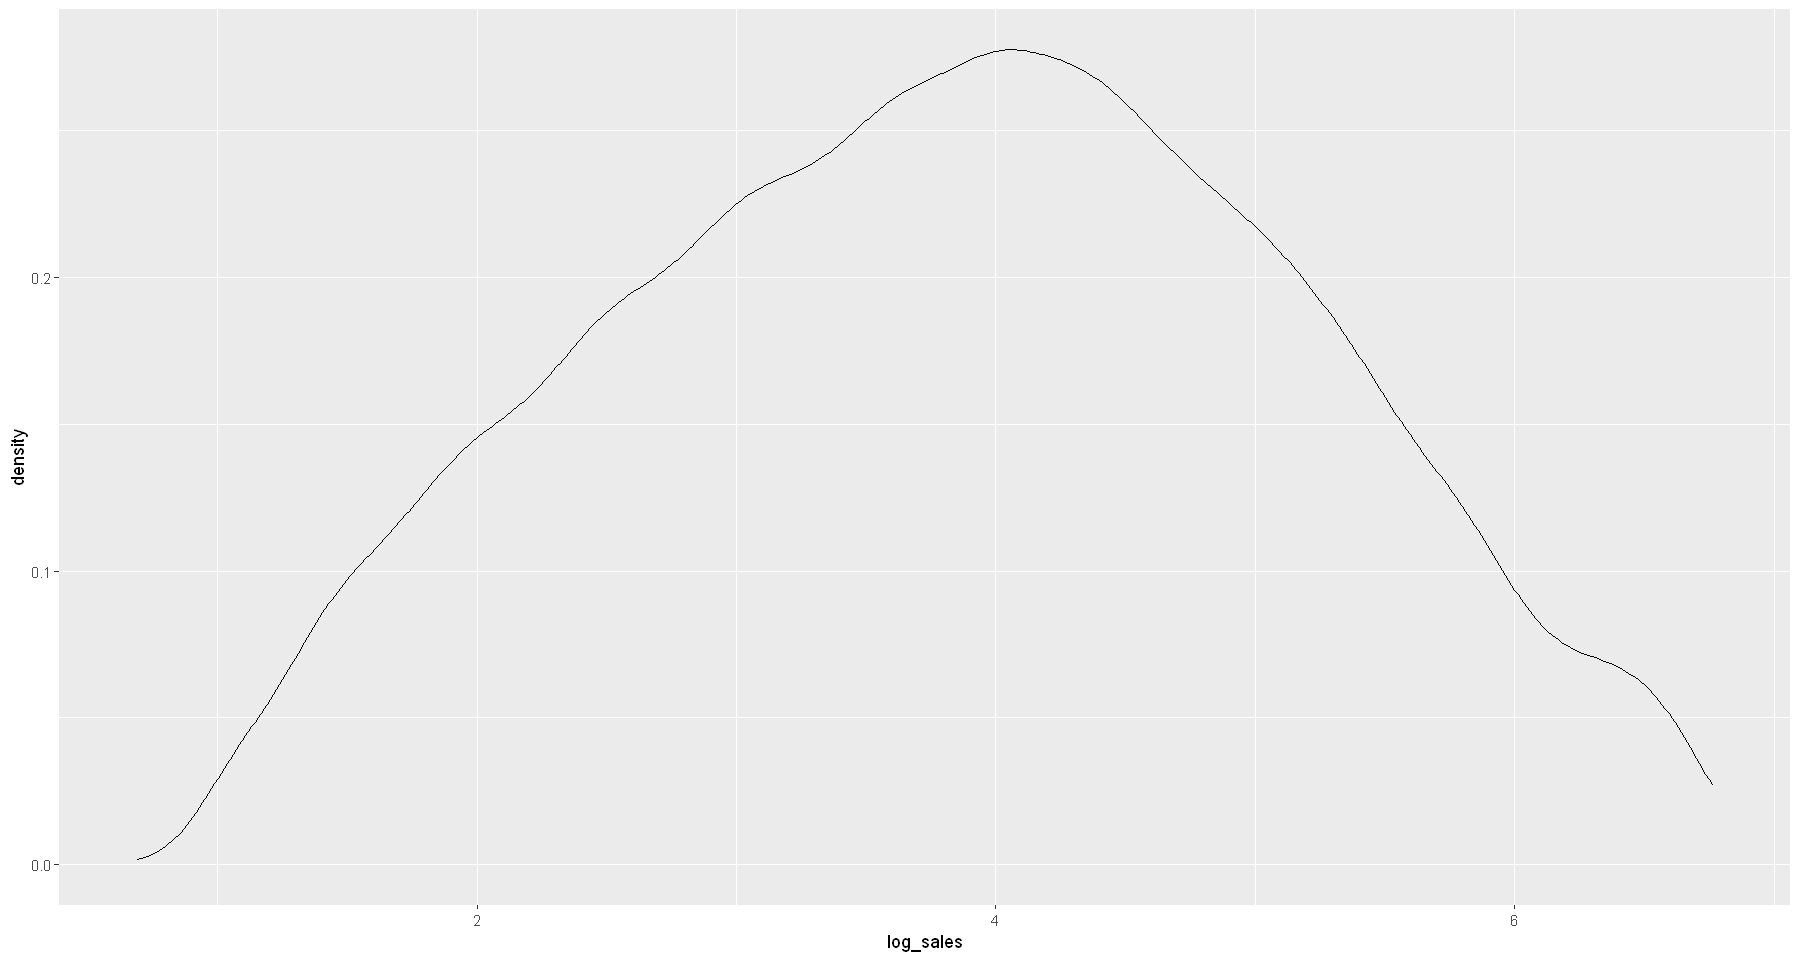

In [576]:
library(ggplot2)

ggplot(data=df1,aes(x=log_sales)) +
 geom_density()


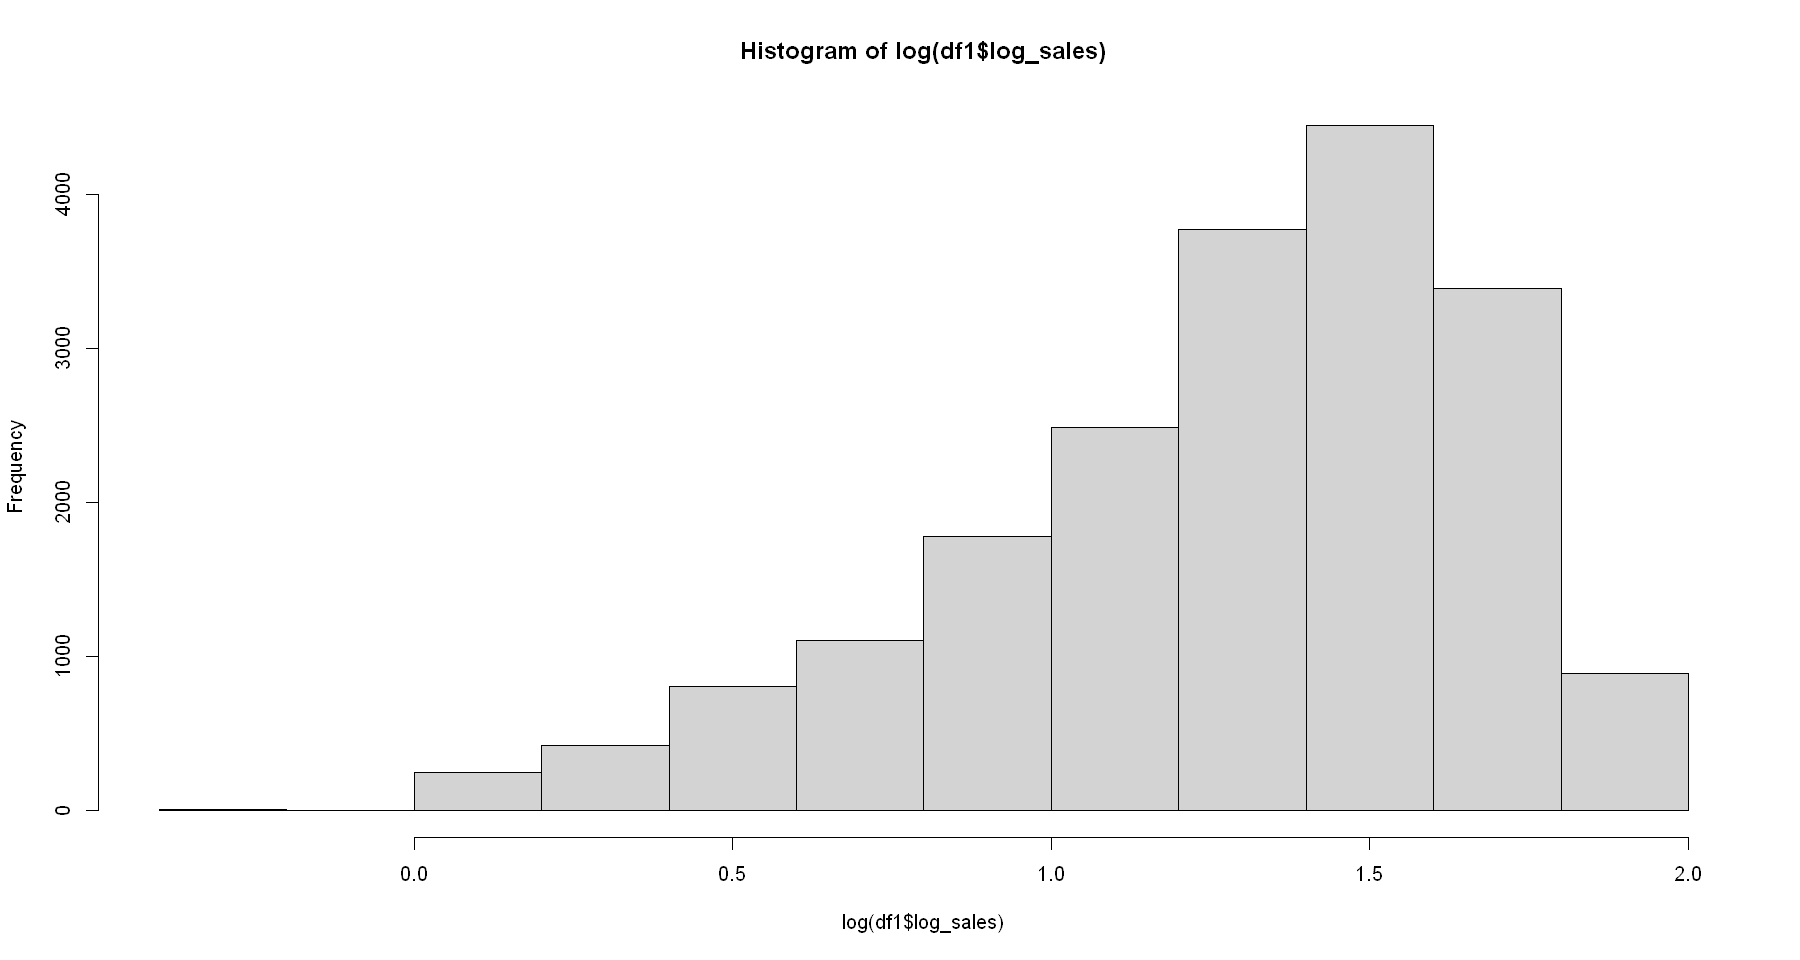

In [577]:
hist(log(df1$log_sales))

In [ ]:
#####         Outliers Check

In [770]:
data<-df1
outlierMatrix <- function(data,threshold=1.5) {
    vn <- names(data)
    outdata <- data.frame(row1=1:nrow(data))
    for(v in vn) {
        if(is.numeric(data[[v]])) {
            outlow <- quantile(data[[v]],probs = 0.25,na.rm = T) 
            outhigh <- quantile(data[[v]],probs = 0.75, na.rm = T)
            irq_level <- (outhigh - outlow) * threshold
            outlow <- outlow - irq_level
            outhigh <- outhigh +  irq_level
            mv <- ifelse(data[[v]] < outlow | data[[v]] > outhigh, 1, 0)
            outdata[v] <- mv
        } else {
            mv <- rep(0,nrow(data))
        }
    }
    outdata$row1 <- NULL
    return(outdata)
}


In [771]:
####    Individual variables analysis

In [772]:
df_out <- outlierMatrix(df1)
head(df_out)


,sumtaransactions,National_Ecuador,averageoil,maxoil,minoil,log_sales
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
5,0,0,0,0,0,0
6,0,0,0,0,0,0


In [773]:
#table <- Table1(data=df_out)
summary(df_out)

 sumtaransactions National_Ecuador   averageoil      maxoil        minoil   
 Min.   :0        Min.   :0        Min.   :0     Min.   :0     Min.   :0    
 1st Qu.:0        1st Qu.:0        1st Qu.:0     1st Qu.:0     1st Qu.:0    
 Median :0        Median :0        Median :0     Median :0     Median :0    
 Mean   :0        Mean   :0        Mean   :0     Mean   :0     Mean   :0    
 3rd Qu.:0        3rd Qu.:0        3rd Qu.:0     3rd Qu.:0     3rd Qu.:0    
 Max.   :0        Max.   :0        Max.   :0     Max.   :0     Max.   :0    
                  NA's   :190      NA's   :574   NA's   :574   NA's   :574  
   log_sales
 Min.   :0  
 1st Qu.:0  
 Median :0  
 Mean   :0  
 3rd Qu.:0  
 Max.   :0  
            

In [774]:
outmat <- outlierMatrix(df1)
summary(outmat)

 sumtaransactions National_Ecuador   averageoil      maxoil        minoil   
 Min.   :0        Min.   :0        Min.   :0     Min.   :0     Min.   :0    
 1st Qu.:0        1st Qu.:0        1st Qu.:0     1st Qu.:0     1st Qu.:0    
 Median :0        Median :0        Median :0     Median :0     Median :0    
 Mean   :0        Mean   :0        Mean   :0     Mean   :0     Mean   :0    
 3rd Qu.:0        3rd Qu.:0        3rd Qu.:0     3rd Qu.:0     3rd Qu.:0    
 Max.   :0        Max.   :0        Max.   :0     Max.   :0     Max.   :0    
                  NA's   :190      NA's   :574   NA's   :574   NA's   :574  
   log_sales
 Min.   :0  
 1st Qu.:0  
 Median :0  
 Mean   :0  
 3rd Qu.:0  
 Max.   :0  
            

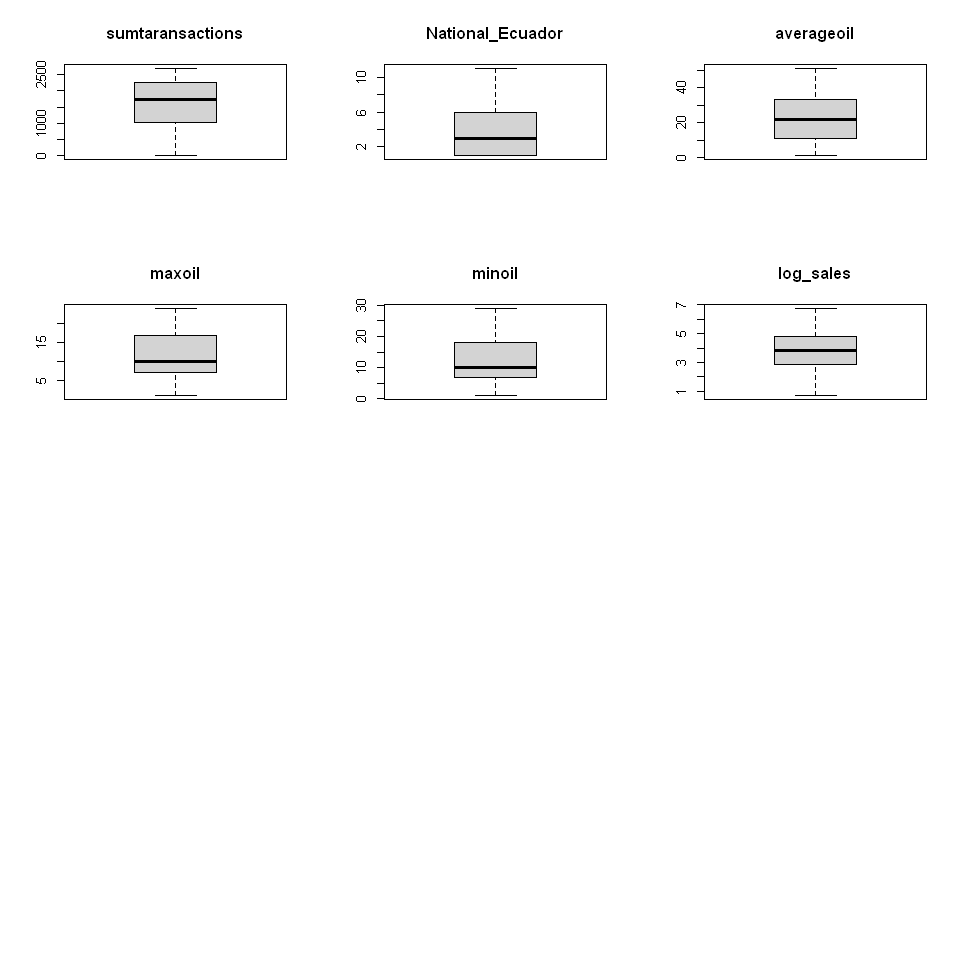

In [583]:
## Visual determination of univariate outliers using boxplots 
options(repr.plot.width = 8, repr.plot.height = 8)
par(mfrow=c(4,3))
for(v in names(df1)) {
    if(is.numeric(df1[[v]])==T){
    boxplot(df1[[v]],main=v)
        }
}
#par(mfrow=c(1,1))





In [584]:
# No Outliers found among the numeric varaibles

In [585]:
# what about the log_sales outliers among different variables catagories??? Thomas said to ignore

In [586]:
##################  Missing Values

In [775]:
missingMatrix <- function(data) {
    vn <- names(data)
    missdata <- data.frame(row1=1:nrow(data))
    for(v in vn) {
        mv <- ifelse(is.na(data[[v]]),1,0)
        missdata[v] <- mv
    }
    missdata$row1 <- NULL
    return(missdata)
}

getMissingness <- function (data, getRows = FALSE) {
    require(dplyr)
    l <- nrow(data)
    vn <- names(data)
    nadf <- data
    cnt <- NULL
    miss <- function(x) return(sum(is.na(x)))
    for (n in vn) {
        nadf[[n]] <- ifelse(is.na(nadf[[n]]) == T, 1, 0)
        cnt <- rbind(cnt, data.frame(n, sum(nadf[[n]])))
    }
    names(cnt) <- c("var", "na.count")
    cnt$rate <- round((cnt$na.count/nrow(nadf)) * 100, 1)
    nadf$na.cnt <- 0
    nadf$na.cnt <- rowSums(nadf)
    cnt <- cnt %>% dplyr::arrange(desc(na.count)) %>% dplyr::filter(na.count > 
        0)
    totmiss <- nadf %>% dplyr::filter(na.cnt == 0) %>% dplyr::tally()
    idx <- NULL
    msg <- (paste("This dataset has ", as.character(totmiss), 
        " (", as.character(round(totmiss/nrow(data) * 100, 1)), 
        "%)", " complete rows. Original data has ", nrow(data), 
        " rows.", sep = ""))
    if (getRows == TRUE & totmiss != 0) {
        nadf$rn <- seq_len(nrow(data))
        idx <- nadf %>% dplyr::filter(na.cnt == 0) %>% dplyr::select(rn)
    }
    print(list(head(cnt, n = 10), msg))
    return(list(missingness = cnt, message = msg, rows = idx$rn))
}

In [776]:
mm <- getMissingness(data = df1)

[[1]]
                 var na.count rate
1        onpromotion     2561 13.2
2         averageoil      574  3.0
3             maxoil      574  3.0
4             minoil      574  3.0
5      locale_Ambato      190  1.0
6     locale_Cayambe      190  1.0
7      locale_Cuenca      190  1.0
8   locale_El_Carmen      190  1.0
9  locale_Esmeraldas      190  1.0
10   locale_Guaranda      190  1.0

[[2]]
[1] "This dataset has 16506 (85.4%) complete rows. Original data has 19336 rows."



In [777]:
mm$missingness

var,na.count,rate
<chr>,<dbl>,<dbl>
onpromotion,2561,13.2
averageoil,574,3.0
maxoil,574,3.0
minoil,574,3.0
locale_Ambato,190,1.0
locale_Cayambe,190,1.0
locale_Cuenca,190,1.0
locale_El_Carmen,190,1.0
locale_Esmeraldas,190,1.0


In [778]:
mm$missingness$var

[1] "onpromotion"                            
 [2] "averageoil"                             
 [3] "maxoil"                                 
 [4] "minoil"                                 
 [5] "locale_Ambato"                          
 [6] "locale_Cayambe"                         
 [7] "locale_Cuenca"                          
 [8] "locale_El_Carmen"                       
 [9] "locale_Esmeraldas"                      
[10] "locale_Guaranda"                        
[11] "locale_Guayaquil"                       
[12] "locale_Ibarra"                          
[13] "locale_Latacunga"                       
[14] "locale_Libertad"                        
[15] "locale_Loja"                            
[16] "locale_Machala"                         
[17] "locale_Manta"                           
[18] "locale_Puyo"                            
[19] "locale_Quevedo"                         
[20] "locale_Quito"                           
[21] "locale_Riobamba"                        
[22] "locale_Salinas"                         
[23] "locale_Santo_Domingo"                   
[24] "National_Ecuador"                       
[25] "Regional_Cotopaxi"                      
[26] "Regional_Imbabura"                      
[27] "Regional_Santa_Elena"                   
[28] "Regional_Santo_Domingo_de_los_Tsachilas"

In [779]:
#generate a missing matrix
df_na <- missingMatrix(df1)

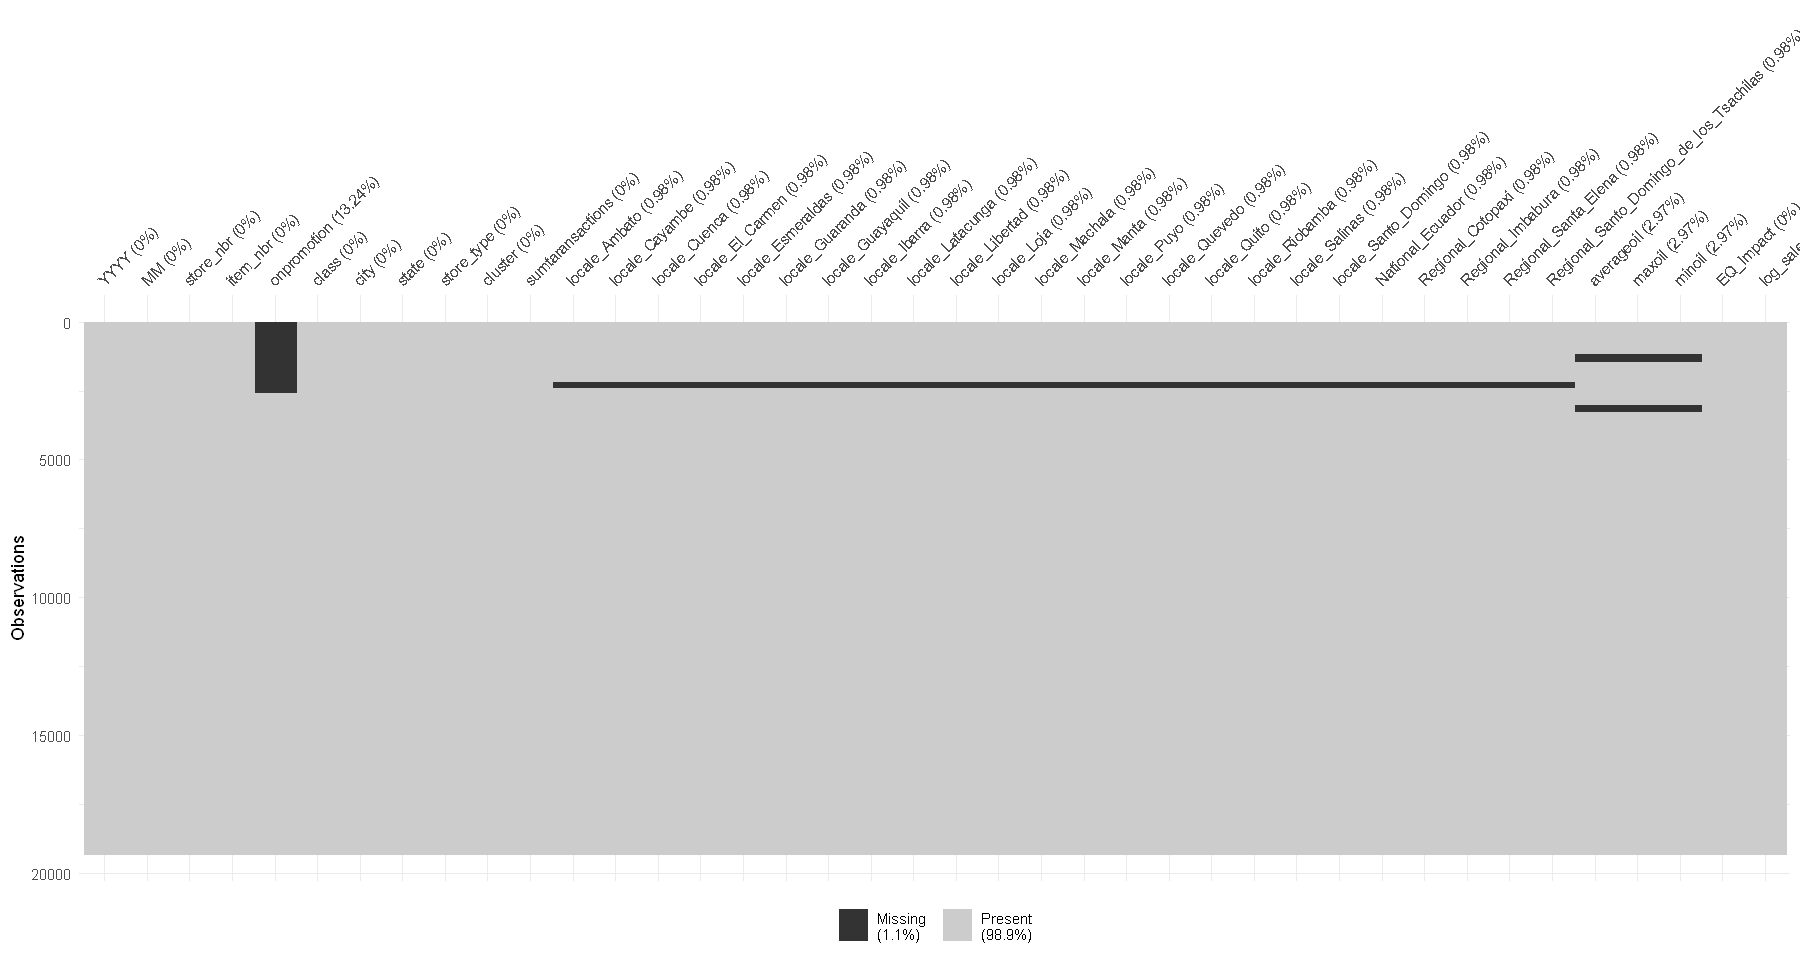

In [780]:
library(naniar)
options(repr.plot.width = 15, repr.plot.height = 8)
vis_miss(df1,warn_large_data=F)

In [ ]:
# Now we can check for the number of missing per rows. This will help to ensure if there are rows the we have to drop.

In [781]:
dfna_sum <- df_na
dfna_sum$pct <- rowSums(df_na)/ncol(df_na)
dfna_sum %>% group_by(pct) %>% tally



pct,n
<dbl>,<int>
0.000,16506
0.025,2066
0.075,269
0.100,305
0.625,190


In [594]:
# There are 190 rows that have a very high percent of missingness (over 50%). We will drop these rows 
# After dropping we will check again the missing matrix.

In [782]:
df3<-df1

In [783]:
df3$drop <- ifelse(dfna_sum$pct >= 0.5,1,0)
df3 <- df3 %>% filter(df3$drop==0)
df3$drop <- NULL
df_na <- missingMatrix(df3)

In [784]:
dfna_sum <- df_na
dfna_sum$pct <- rowSums(df_na)/ncol(df_na)
dfna_sum %>% group_by(pct) %>% tally


pct,n
<dbl>,<int>
0.000,16506
0.025,2066
0.075,269
0.100,305


In [785]:
mechkar::getMissingness(df3)

list(var = c("onpromotion", "averageoil", "maxoil", "minoil"), na_count = c(2371, 574, 574, 574), rate = c(12.4, 3, 3, 3))This dataset has 16506 (86.2%) complete rows. Original data has 19146 rows.



var,na_count,rate
<chr>,<dbl>,<dbl>
onpromotion,2371,12.4
averageoil,574,3.0
maxoil,574,3.0
minoil,574,3.0


In [599]:
# check any correlation between the missing values by making a correlation matrix for the missingness (missing matrix)

In [786]:
mmrevised <- getMissingness(data = df3)
mmrevised$missingness$var

[[1]]
          var na.count rate
1 onpromotion     2371 12.4
2  averageoil      574  3.0
3      maxoil      574  3.0
4      minoil      574  3.0

[[2]]
[1] "This dataset has 16506 (86.2%) complete rows. Original data has 19146 rows."



[1] "onpromotion" "averageoil"  "maxoil"      "minoil"

In [787]:
df_na <- df_na[,mmrevised$missingness$var]
head(df_na)
summary(df_na)

,onpromotion,averageoil,maxoil,minoil
,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
5,1,0,0,0
6,1,0,0,0


  onpromotion       averageoil          maxoil            minoil       
 Min.   :0.0000   Min.   :0.00000   Min.   :0.00000   Min.   :0.00000  
 1st Qu.:0.0000   1st Qu.:0.00000   1st Qu.:0.00000   1st Qu.:0.00000  
 Median :0.0000   Median :0.00000   Median :0.00000   Median :0.00000  
 Mean   :0.1238   Mean   :0.02998   Mean   :0.02998   Mean   :0.02998  
 3rd Qu.:0.0000   3rd Qu.:0.00000   3rd Qu.:0.00000   3rd Qu.:0.00000  
 Max.   :1.0000   Max.   :1.00000   Max.   :1.00000   Max.   :1.00000  

Warning message:
"Removed 574 rows containing non-finite values (stat_density)."
Warning message:
"Removed 574 rows containing non-finite values (stat_density)."
Warning message:
"Removed 574 rows containing non-finite values (stat_density)."
Warning message:
"Removed 574 rows containing non-finite values (stat_density)."
Warning message:
"Removed 574 rows containing non-finite values (stat_density)."


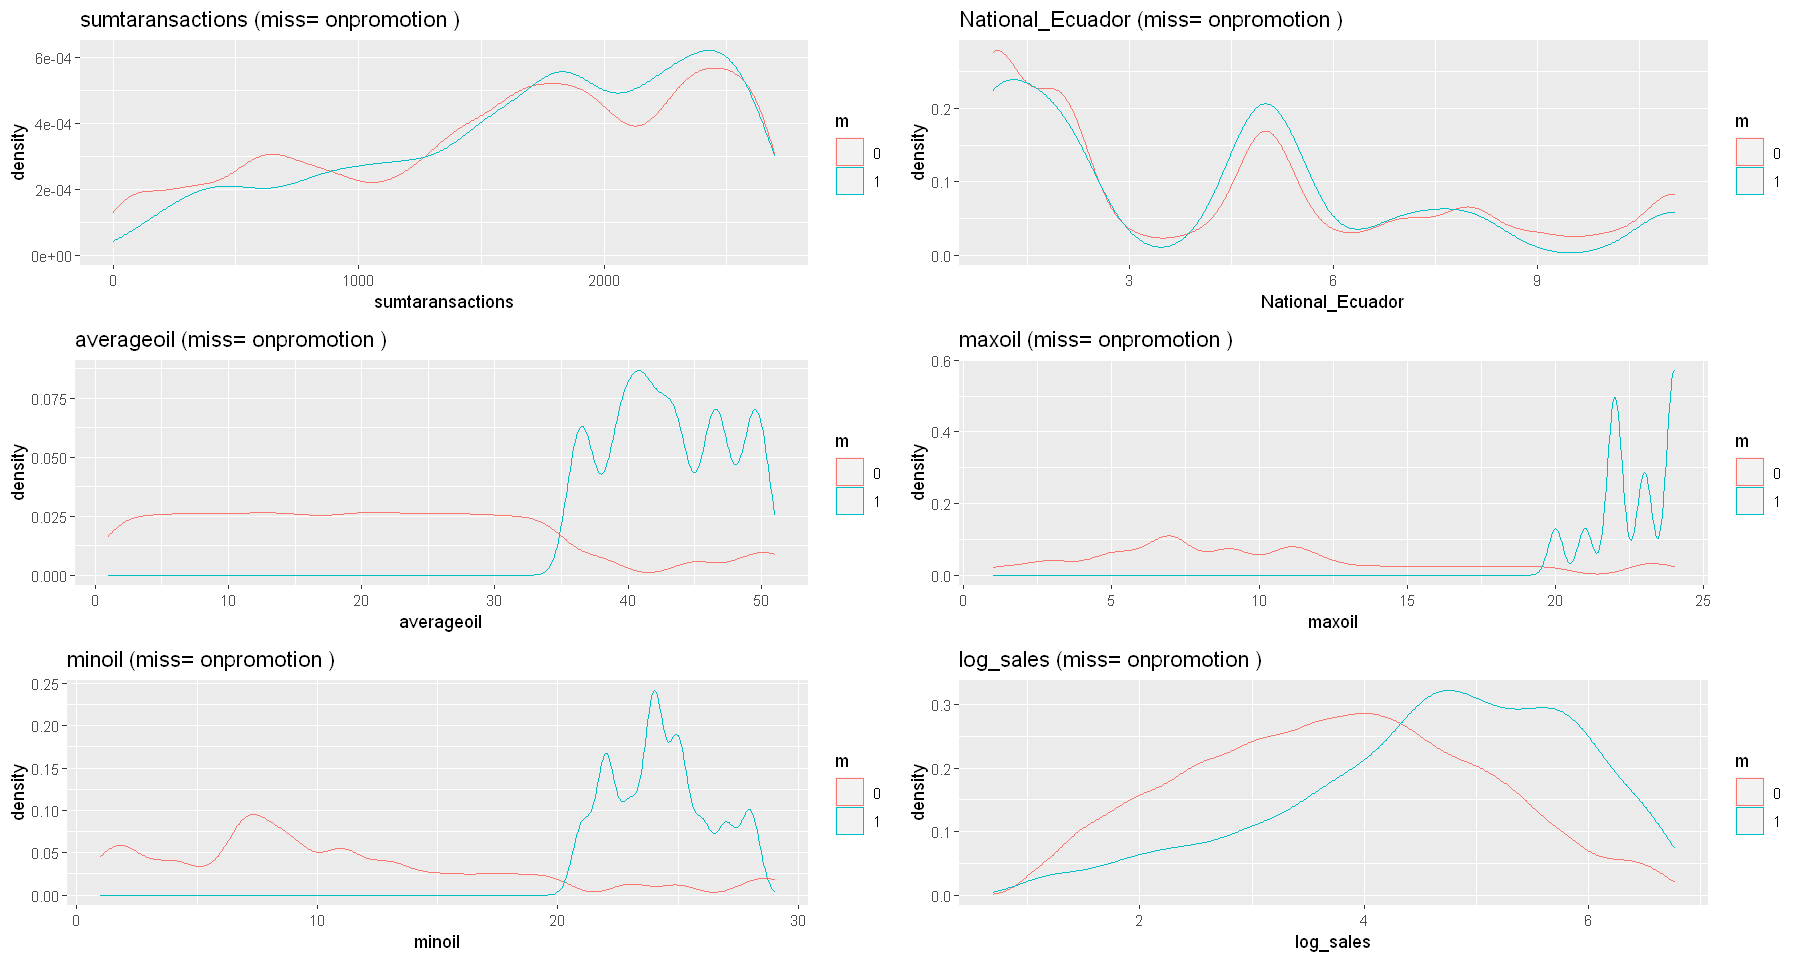

Warning message:
"Removed 574 rows containing non-finite values (stat_density)."
Warning message:
"Removed 574 rows containing non-finite values (stat_density)."


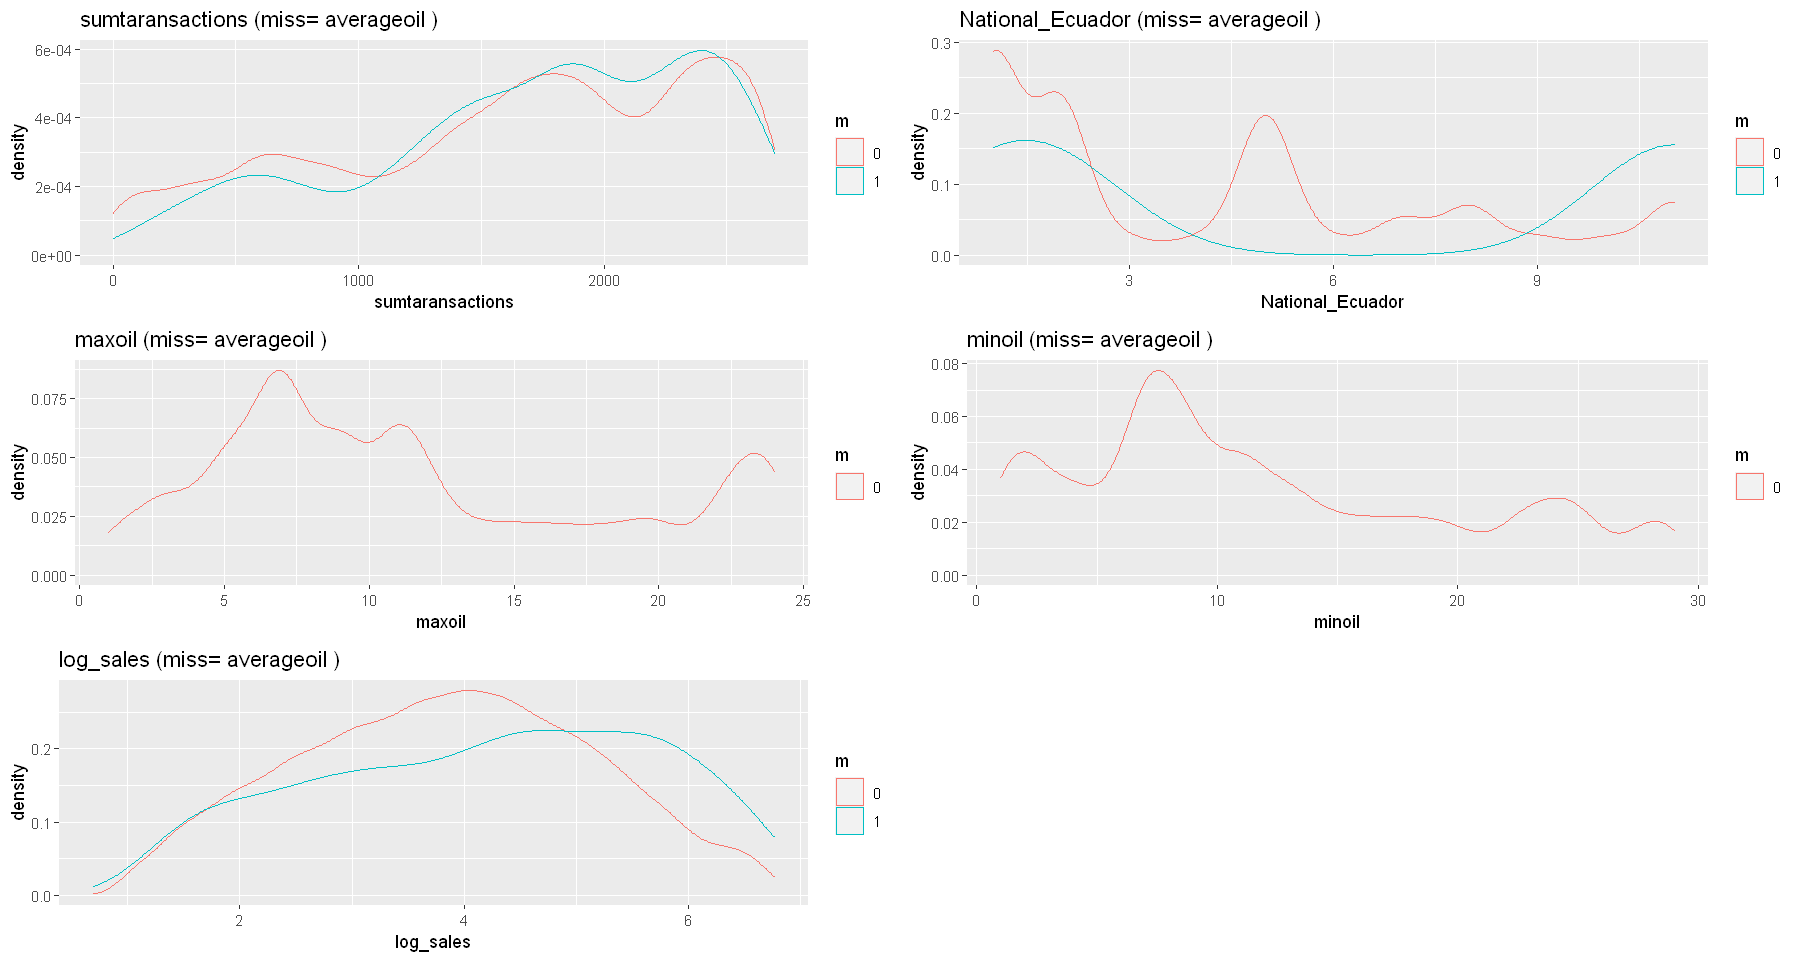

Warning message:
"Removed 574 rows containing non-finite values (stat_density)."
Warning message:
"Removed 574 rows containing non-finite values (stat_density)."


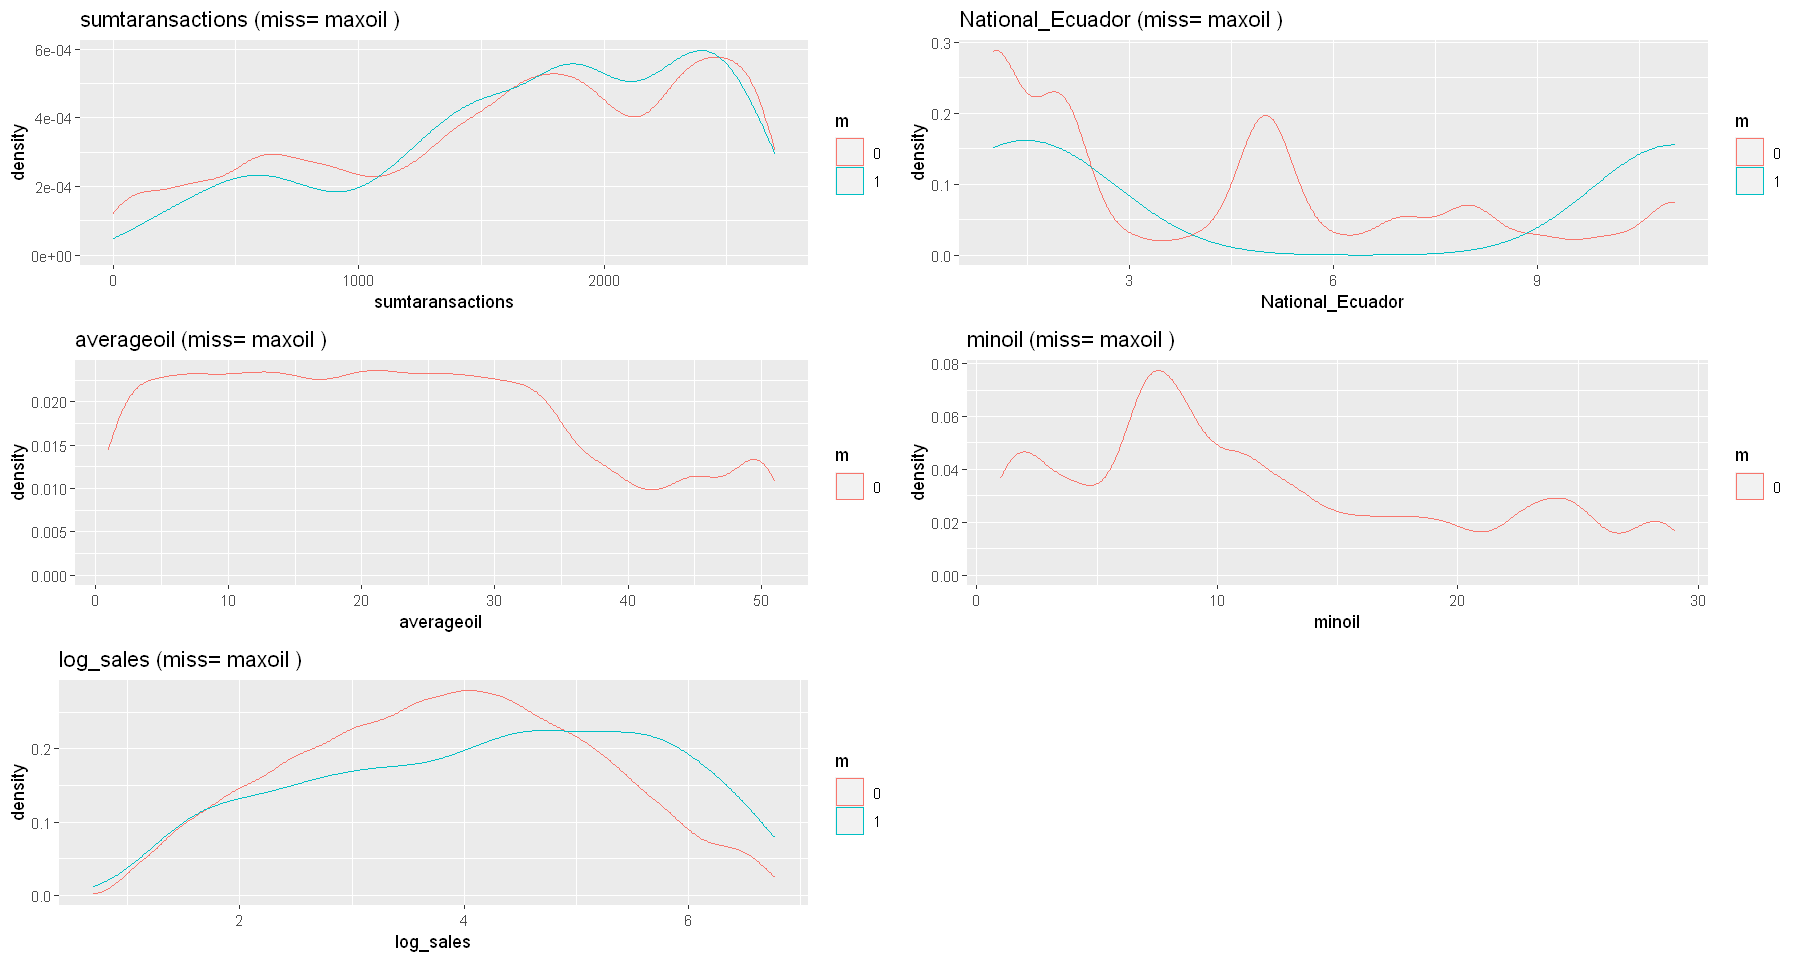

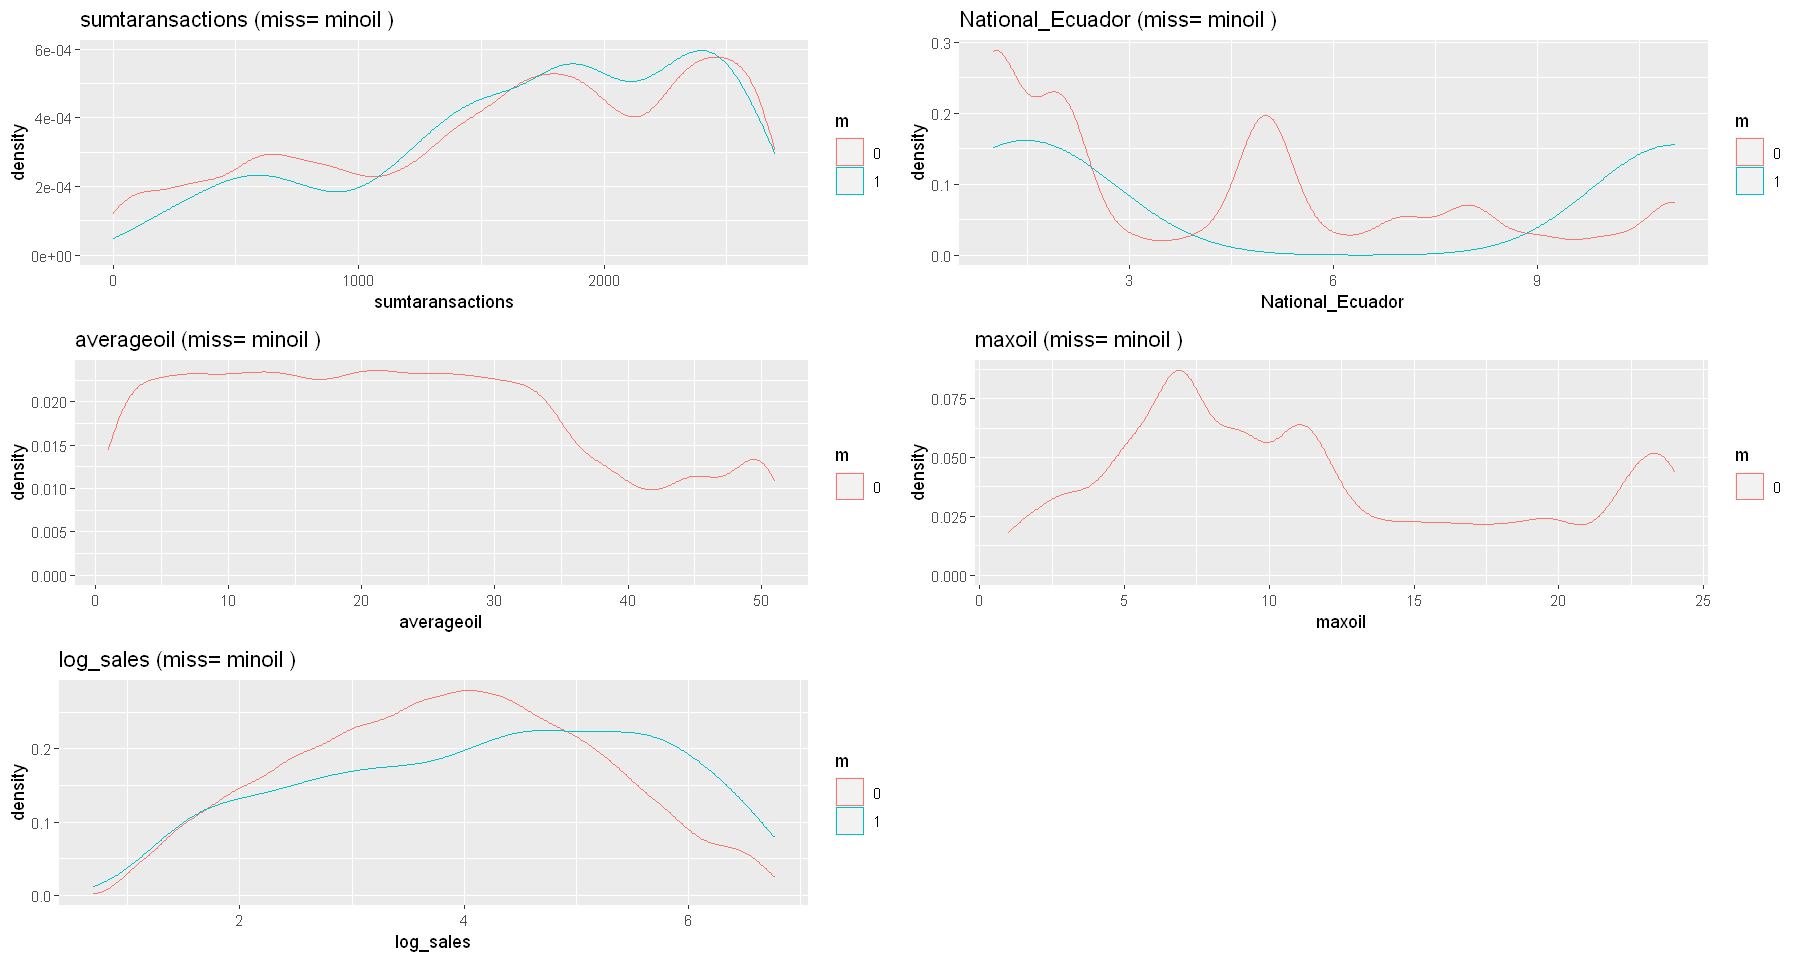

In [602]:
library(gridExtra)
library(ggplot2)

for (m in mmrevised$missingness$var) {
    p <- list()
    i <- 1
    for (v in numlst1) {
        if (v != m) {
            ff <- data.frame(v=df3[[v]],m=factor(df_na[[m]]))
            p[[i]] <- suppressMessages(ggplot(data=ff,aes(x=v,group=m,color=m)) +
              geom_density()+labs(title=paste(v, "(miss=", m,")"),x =v))
            i <- i + 1
        }
    }
    do.call(grid.arrange,p)
}


In [603]:
####    Making desicions about the mechanism of missingness using the Kolmogorov-Smirnov test

In [788]:

mmrevised$missingness$var
numlst1

[1] "onpromotion" "averageoil"  "maxoil"      "minoil"

[1] "sumtaransactions" "National_Ecuador" "averageoil"       "maxoil"          
[5] "minoil"           "log_sales"

In [789]:
length(df_na$averageoil)

[1] 19146

In [790]:
mmrevised <- getMissingness(data = df3)
mmrevised$missingness$var

[[1]]
          var na.count rate
1 onpromotion     2371 12.4
2  averageoil      574  3.0
3      maxoil      574  3.0
4      minoil      574  3.0

[[2]]
[1] "This dataset has 16506 (86.2%) complete rows. Original data has 19146 rows."



[1] "onpromotion" "averageoil"  "maxoil"      "minoil"

In [607]:
### test the missing mechanism using glm
res <- NULL
for (m in mmrevised$missingness$var) {
    ## change the current tested variable with the missing indicator for this variable
    ff <- df3[,nm1]
    ff[[m]] <- df_na[[m]]
    mod <- glm(ff[[m]] ~.,data=ff,family="binomial")
    sm <- summary(mod)
    if(is.null(sm)==F) {
      sm2 <- data.frame(var=row.names(sm$coefficients),pvalue=sm$coefficients[,4])
      res <- rbind(res, cbind(m,sm2))
      #append(res, sm, m)
    } else {
      print(sm)
    }
}
row.names(res) <- NULL
res

Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: algorithm did not converge"


m,var,pvalue
<chr>,<chr>,<dbl>
onpromotion,(Intercept),0.9995122
onpromotion,YYYY2014,1.0000000
onpromotion,YYYY2015,1.0000000
onpromotion,YYYY2016,1.0000000
onpromotion,YYYY2017,1.0000000
onpromotion,MM2,1.0000000
onpromotion,MM3,1.0000000
onpromotion,MM4,1.0000000
onpromotion,MM5,1.0000000


In [608]:
row.names(res) <- NULL

In [609]:
res %>% filter(pvalue<0.05)

m,var,pvalue
<chr>,<chr>,<dbl>


In [ ]:
#None of the explanatory variables have significantly predicted the missingness on any variable.
#So no variable can explain the presence of missing values on any of the missing variables
#Thus we can assume that the missing mechanism is at least MAR
#Imputation of the missing values - to "Onpromotion" will add a catagory 2 = Null (0=False, 1=True)
#Since aveoil/maxoli/minoil missings stands at 3% only it will be removed

In [791]:
df3$onpromotion_revised <- 2
df3$onpromotion_revised[df3$onpromotion=='False'] <-0
df3$onpromotion_revised[df3$onpromotion=='True'] <-1

df3$onpromotion_revised <-as.factor(df3$onpromotion_revised)
summary(df3$onpromotion_revised)


0    1    2 
8689 8086 2371

In [792]:
df3$onpromotion<-df3$onpromotion_revised

In [793]:
mechkar::getMissingness(df3)

list(var = c("averageoil", "maxoil", "minoil"), na_count = c(574, 574, 574), rate = c(3, 3, 3))This dataset has 18572 (97%) complete rows. Original data has 19146 rows.



var,na_count,rate
<chr>,<dbl>,<dbl>
averageoil,574,3
maxoil,574,3
minoil,574,3


In [794]:
mm <- getMissingness(df3, getRows = TRUE)


[[1]]
         var na.count rate
1 averageoil      574    3
2     maxoil      574    3
3     minoil      574    3

[[2]]
[1] "This dataset has 18572 (97%) complete rows. Original data has 19146 rows."



In [795]:
df_na <- missingMatrix(df3)
dfna_sum <- df_na
dfna_sum$pct <- rowSums(df_na)/ncol(df_na)
dfna_sum %>% group_by(pct) %>% tally

pct,n
<dbl>,<int>
0.00000000,18572
0.07317073,574


In [796]:
df3$drop <- ifelse(dfna_sum$pct >= 0.03,1,0)
df3 <- df3 %>% filter(df3$drop==0)
df3$drop <- NULL
df_na <- missingMatrix(df3)

In [797]:
mm <- getMissingness(df3, getRows = TRUE)

[[1]]
[1] var      na.count rate    
<0 rows> (or 0-length row.names)

[[2]]
[1] "This dataset has 18572 (100%) complete rows. Original data has 18572 rows."



In [798]:
names(df3)

[1] "YYYY"                                   
 [2] "MM"                                     
 [3] "store_nbr"                              
 [4] "item_nbr"                               
 [5] "onpromotion"                            
 [6] "class"                                  
 [7] "city"                                   
 [8] "state"                                  
 [9] "store_type"                             
[10] "cluster"                                
[11] "sumtaransactions"                       
[12] "locale_Ambato"                          
[13] "locale_Cayambe"                         
[14] "locale_Cuenca"                          
[15] "locale_El_Carmen"                       
[16] "locale_Esmeraldas"                      
[17] "locale_Guaranda"                        
[18] "locale_Guayaquil"                       
[19] "locale_Ibarra"                          
[20] "locale_Latacunga"                       
[21] "locale_Libertad"                        
[22] "locale_Loja"                            
[23] "locale_Machala"                         
[24] "locale_Manta"                           
[25] "locale_Puyo"                            
[26] "locale_Quevedo"                         
[27] "locale_Quito"                           
[28] "locale_Riobamba"                        
[29] "locale_Salinas"                         
[30] "locale_Santo_Domingo"                   
[31] "National_Ecuador"                       
[32] "Regional_Cotopaxi"                      
[33] "Regional_Imbabura"                      
[34] "Regional_Santa_Elena"                   
[35] "Regional_Santo_Domingo_de_los_Tsachilas"
[36] "averageoil"                             
[37] "maxoil"                                 
[38] "minoil"                                 
[39] "EQ_Impact"                              
[40] "log_sales"                              
[41] "onpromotion_revised"

In [799]:
df4<-df3[,-c(41:81)]

In [800]:
names(df4)

[1] "YYYY"                                   
 [2] "MM"                                     
 [3] "store_nbr"                              
 [4] "item_nbr"                               
 [5] "onpromotion"                            
 [6] "class"                                  
 [7] "city"                                   
 [8] "state"                                  
 [9] "store_type"                             
[10] "cluster"                                
[11] "sumtaransactions"                       
[12] "locale_Ambato"                          
[13] "locale_Cayambe"                         
[14] "locale_Cuenca"                          
[15] "locale_El_Carmen"                       
[16] "locale_Esmeraldas"                      
[17] "locale_Guaranda"                        
[18] "locale_Guayaquil"                       
[19] "locale_Ibarra"                          
[20] "locale_Latacunga"                       
[21] "locale_Libertad"                        
[22] "locale_Loja"                            
[23] "locale_Machala"                         
[24] "locale_Manta"                           
[25] "locale_Puyo"                            
[26] "locale_Quevedo"                         
[27] "locale_Quito"                           
[28] "locale_Riobamba"                        
[29] "locale_Salinas"                         
[30] "locale_Santo_Domingo"                   
[31] "National_Ecuador"                       
[32] "Regional_Cotopaxi"                      
[33] "Regional_Imbabura"                      
[34] "Regional_Santa_Elena"                   
[35] "Regional_Santo_Domingo_de_los_Tsachilas"
[36] "averageoil"                             
[37] "maxoil"                                 
[38] "minoil"                                 
[39] "EQ_Impact"                              
[40] "log_sales"

In [621]:
#write.csv(df4,"C:/Users/Eyal Bijaoui/datascience/project/Favorita__df4.csv", row.names = TRUE)

Feature Engineering  / Impact Coding / Data Extraction / Data Transformation

In [801]:
levels(df4$store_nbr)
summary(df$store_nbr)

[1] "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "12" "13" "14" "15"
[16] "16" "17" "18" "19" "20" "21" "22" "23" "24" "25" "26" "27" "28" "29" "30"
[31] "31" "32" "33" "34" "35" "36" "37" "38" "39" "40" "41" "42" "43" "44" "45"
[46] "46" "47" "48" "49" "50" "51" "52" "53" "54"

1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
631 643 649 589 463 643 635 635 351 164 252 126 123 138 171 156 171 329 144 232 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
118  88 568 593 381 329 593 271 141 114 233 132 104 191  95 196 605 410 347 163 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54 
394 339 123 635 641 633 638 641 633 586 628  53 327 148

In [802]:
store_mix <- levels(factor(df4$store_nbr))
length(store_mix)
store_mix

[1] 54

[1] "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "12" "13" "14" "15"
[16] "16" "17" "18" "19" "20" "21" "22" "23" "24" "25" "26" "27" "28" "29" "30"
[31] "31" "32" "33" "34" "35" "36" "37" "38" "39" "40" "41" "42" "43" "44" "45"
[46] "46" "47" "48" "49" "50" "51" "52" "53" "54"

In [803]:
total <- nrow(df4)
store_mix_aggr <- df4 %>% group_by(store_nbr) %>% tally()
total
store_mix_aggr

[1] 18572

store_nbr,n
<fct>,<int>
1,606
2,612
3,618
4,562
5,441
6,612
7,603
8,604
9,336


In [804]:
store_mix_aggr$store_pct <- store_mix_aggr$n/total
store_mix_aggr
sum(store_mix_aggr$store_pct)

store_nbr,n,store_pct
<fct>,<int>,<dbl>
1,606,0.032629765
2,612,0.032952832
3,618,0.033275899
4,562,0.030260607
5,441,0.023745423
6,612,0.032952832
7,603,0.032468232
8,604,0.032522076
9,336,0.018091751


[1] 1

In [805]:
df4 <- left_join(df4, store_mix_aggr)
head(df4)

Joining, by = "store_nbr"



,YYYY,MM,store_nbr,item_nbr,onpromotion,class,city,state,store_type,cluster,...,Regional_Imbabura,Regional_Santa_Elena,Regional_Santo_Domingo_de_los_Tsachilas,averageoil,maxoil,minoil,EQ_Impact,log_sales,n,store_pct
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,...,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<int>,<dbl>
1,2013,1,7,695758,2,2802,Quito,Pichincha,D,8,...,0,0,0,42,22,24,0,5.509388,603,0.03246823
2,2013,1,6,699745,2,2802,Quito,Pichincha,D,13,...,0,0,0,42,22,24,0,4.553877,612,0.03295283
3,2013,1,26,741201,2,2854,Guayaquil,Guayas,D,10,...,0,0,0,42,22,24,0,4.276666,319,0.01717639
4,2013,1,49,252698,2,2806,Quito,Pichincha,A,11,...,0,0,0,42,22,24,0,5.811141,608,0.03273745
5,2013,1,23,589403,2,2850,Ambato,Tungurahua,D,9,...,0,0,0,42,22,24,0,3.091042,540,0.02907603
6,2013,1,27,1110679,2,2850,Daule,Guayas,D,1,...,0,0,0,42,22,24,0,4.127134,561,0.03020676


In [806]:
# Remove store_nbr, n
df4 <- df4[ ,-c(3,41) ]
head(df4)

,YYYY,MM,item_nbr,onpromotion,class,city,state,store_type,cluster,sumtaransactions,...,Regional_Cotopaxi,Regional_Imbabura,Regional_Santa_Elena,Regional_Santo_Domingo_de_los_Tsachilas,averageoil,maxoil,minoil,EQ_Impact,log_sales,store_pct
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,...,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
1,2013,1,695758,2,2802,Quito,Pichincha,D,8,1652,...,0,0,0,0,42,22,24,0,5.509388,0.03246823
2,2013,1,699745,2,2802,Quito,Pichincha,D,13,1796,...,0,0,0,0,42,22,24,0,4.553877,0.03295283
3,2013,1,741201,2,2854,Guayaquil,Guayas,D,10,308,...,0,0,0,0,42,22,24,0,4.276666,0.01717639
4,2013,1,252698,2,2806,Quito,Pichincha,A,11,1927,...,0,0,0,0,42,22,24,0,5.811141,0.03273745
5,2013,1,589403,2,2850,Ambato,Tungurahua,D,9,808,...,0,0,0,0,42,22,24,0,3.091042,0.02907603
6,2013,1,1110679,2,2850,Daule,Guayas,D,1,778,...,0,0,0,0,42,22,24,0,4.127134,0.03020676


In [807]:
levels(df4$city)
summary(df4$city)

[1] "Ambato"        "Babahoyo"      "Cayambe"       "Cuenca"       
 [5] "Daule"         "El Carmen"     "Esmeraldas"    "Guaranda"     
 [9] "Guayaquil"     "Ibarra"        "Latacunga"     "Libertad"     
[13] "Loja"          "Machala"       "Manta"         "Playas"       
[17] "Puyo"          "Quevedo"       "Quito"         "Riobamba"     
[21] "Salinas"       "Santo Domingo"

Ambato      Babahoyo       Cayambe        Cuenca         Daule 
         1101           225           243          1245           561 
    El Carmen    Esmeraldas      Guaranda     Guayaquil        Ibarra 
          145           121           142          2324           166 
    Latacunga      Libertad          Loja       Machala         Manta 
          244           188           390           534           372 
       Playas          Puyo       Quevedo         Quito      Riobamba 
           93            88            99          9083           135 
      Salinas Santo Domingo 
          364           709

In [808]:
city_mix <- levels(factor(df4$city))
length(city_mix)
city_mix

[1] 22

[1] "Ambato"        "Babahoyo"      "Cayambe"       "Cuenca"       
 [5] "Daule"         "El Carmen"     "Esmeraldas"    "Guaranda"     
 [9] "Guayaquil"     "Ibarra"        "Latacunga"     "Libertad"     
[13] "Loja"          "Machala"       "Manta"         "Playas"       
[17] "Puyo"          "Quevedo"       "Quito"         "Riobamba"     
[21] "Salinas"       "Santo Domingo"

In [809]:
total <- nrow(df4)
city_mix_aggr <- df4 %>% group_by(city) %>% tally()
total
city_mix_aggr

[1] 18572

city,n
<fct>,<int>
Ambato,1101
Babahoyo,225
Cayambe,243
Cuenca,1245
Daule,561
El Carmen,145
Esmeraldas,121
Guaranda,142
Guayaquil,2324


In [810]:
city_mix_aggr$city_pct <- city_mix_aggr$n/total
city_mix_aggr
sum(city_mix_aggr$city_pct)

city,n,city_pct
<fct>,<int>,<dbl>
Ambato,1101,0.059282791
Babahoyo,225,0.012115012
Cayambe,243,0.013084213
Cuenca,1245,0.067036399
Daule,561,0.030206763
El Carmen,145,0.007807452
Esmeraldas,121,0.006515184
Guaranda,142,0.007645919
Guayaquil,2324,0.125134611


[1] 1

In [811]:
df4 <- left_join(df4, city_mix_aggr)
head(df4)

Joining, by = "city"



,YYYY,MM,item_nbr,onpromotion,class,city,state,store_type,cluster,sumtaransactions,...,Regional_Santa_Elena,Regional_Santo_Domingo_de_los_Tsachilas,averageoil,maxoil,minoil,EQ_Impact,log_sales,store_pct,n,city_pct
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,...,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<int>,<dbl>
1,2013,1,695758,2,2802,Quito,Pichincha,D,8,1652,...,0,0,42,22,24,0,5.509388,0.03246823,9083,0.48906957
2,2013,1,699745,2,2802,Quito,Pichincha,D,13,1796,...,0,0,42,22,24,0,4.553877,0.03295283,9083,0.48906957
3,2013,1,741201,2,2854,Guayaquil,Guayas,D,10,308,...,0,0,42,22,24,0,4.276666,0.01717639,2324,0.12513461
4,2013,1,252698,2,2806,Quito,Pichincha,A,11,1927,...,0,0,42,22,24,0,5.811141,0.03273745,9083,0.48906957
5,2013,1,589403,2,2850,Ambato,Tungurahua,D,9,808,...,0,0,42,22,24,0,3.091042,0.02907603,1101,0.05928279
6,2013,1,1110679,2,2850,Daule,Guayas,D,1,778,...,0,0,42,22,24,0,4.127134,0.03020676,561,0.03020676


In [812]:
names(df4)

[1] "YYYY"                                   
 [2] "MM"                                     
 [3] "item_nbr"                               
 [4] "onpromotion"                            
 [5] "class"                                  
 [6] "city"                                   
 [7] "state"                                  
 [8] "store_type"                             
 [9] "cluster"                                
[10] "sumtaransactions"                       
[11] "locale_Ambato"                          
[12] "locale_Cayambe"                         
[13] "locale_Cuenca"                          
[14] "locale_El_Carmen"                       
[15] "locale_Esmeraldas"                      
[16] "locale_Guaranda"                        
[17] "locale_Guayaquil"                       
[18] "locale_Ibarra"                          
[19] "locale_Latacunga"                       
[20] "locale_Libertad"                        
[21] "locale_Loja"                            
[22] "locale_Machala"                         
[23] "locale_Manta"                           
[24] "locale_Puyo"                            
[25] "locale_Quevedo"                         
[26] "locale_Quito"                           
[27] "locale_Riobamba"                        
[28] "locale_Salinas"                         
[29] "locale_Santo_Domingo"                   
[30] "National_Ecuador"                       
[31] "Regional_Cotopaxi"                      
[32] "Regional_Imbabura"                      
[33] "Regional_Santa_Elena"                   
[34] "Regional_Santo_Domingo_de_los_Tsachilas"
[35] "averageoil"                             
[36] "maxoil"                                 
[37] "minoil"                                 
[38] "EQ_Impact"                              
[39] "log_sales"                              
[40] "store_pct"                              
[41] "n"                                      
[42] "city_pct"

In [813]:
# Remove city, n
df4 <- df4[ ,-c(6,41) ]
head(df4)

,YYYY,MM,item_nbr,onpromotion,class,state,store_type,cluster,sumtaransactions,locale_Ambato,...,Regional_Imbabura,Regional_Santa_Elena,Regional_Santo_Domingo_de_los_Tsachilas,averageoil,maxoil,minoil,EQ_Impact,log_sales,store_pct,city_pct
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,...,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>
1,2013,1,695758,2,2802,Pichincha,D,8,1652,0,...,0,0,0,42,22,24,0,5.509388,0.03246823,0.48906957
2,2013,1,699745,2,2802,Pichincha,D,13,1796,0,...,0,0,0,42,22,24,0,4.553877,0.03295283,0.48906957
3,2013,1,741201,2,2854,Guayas,D,10,308,0,...,0,0,0,42,22,24,0,4.276666,0.01717639,0.12513461
4,2013,1,252698,2,2806,Pichincha,A,11,1927,0,...,0,0,0,42,22,24,0,5.811141,0.03273745,0.48906957
5,2013,1,589403,2,2850,Tungurahua,D,9,808,0,...,0,0,0,42,22,24,0,3.091042,0.02907603,0.05928279
6,2013,1,1110679,2,2850,Guayas,D,1,778,0,...,0,0,0,42,22,24,0,4.127134,0.03020676,0.03020676


In [814]:
levels(df4$state)
summary(df$state)

[1] "Azuay"                          "Bolivar"                       
 [3] "Chimborazo"                     "Cotopaxi"                      
 [5] "El Oro"                         "Esmeraldas"                    
 [7] "Guayas"                         "Imbabura"                      
 [9] "Loja"                           "Los Rios"                      
[11] "Manabi"                         "Pastaza"                       
[13] "Pichincha"                      "Santa Elena"                   
[15] "Santo Domingo de los Tsachilas" "Tungurahua"

Azuay                        Bolivar 
                          1291                            144 
                    Chimborazo                       Cotopaxi 
                           138                            249 
                        El Oro                     Esmeraldas 
                           557                            123 
                        Guayas                       Imbabura 
                          3283                            171 
                          Loja                       Los Rios 
                           410                            337 
                        Manabi                        Pastaza 
                           528                             88 
                     Pichincha                    Santa Elena 
                          9745                            381 
Santo Domingo de los Tsachilas                     Tungurahua 
                           737                           1154

In [815]:
state_mix <- levels(factor(df4$state))
length(state_mix)
state_mix

[1] 16

[1] "Azuay"                          "Bolivar"                       
 [3] "Chimborazo"                     "Cotopaxi"                      
 [5] "El Oro"                         "Esmeraldas"                    
 [7] "Guayas"                         "Imbabura"                      
 [9] "Loja"                           "Los Rios"                      
[11] "Manabi"                         "Pastaza"                       
[13] "Pichincha"                      "Santa Elena"                   
[15] "Santo Domingo de los Tsachilas" "Tungurahua"

In [816]:
total <- nrow(df4)
state_mix_aggr <- df4 %>% group_by(state) %>% tally()
total
state_mix_aggr

[1] 18572

state,n
<fct>,<int>
Azuay,1245
Bolivar,142
Chimborazo,135
Cotopaxi,244
El Oro,534
Esmeraldas,121
Guayas,3166
Imbabura,166
Loja,390


In [817]:
state_mix_aggr$state_pct <- state_mix_aggr$n/total
state_mix_aggr
sum(state_mix_aggr$state_pct)

state,n,state_pct
<fct>,<int>,<dbl>
Azuay,1245,0.067036399
Bolivar,142,0.007645919
Chimborazo,135,0.007269007
Cotopaxi,244,0.013138057
El Oro,534,0.028752961
Esmeraldas,121,0.006515184
Guayas,3166,0.170471678
Imbabura,166,0.008938187
Loja,390,0.020999354


[1] 1

In [818]:
df4 <- left_join(df4, state_mix_aggr)
head(df4)

Joining, by = "state"



,YYYY,MM,item_nbr,onpromotion,class,state,store_type,cluster,sumtaransactions,locale_Ambato,...,Regional_Santo_Domingo_de_los_Tsachilas,averageoil,maxoil,minoil,EQ_Impact,log_sales,store_pct,city_pct,n,state_pct
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,...,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,2013,1,695758,2,2802,Pichincha,D,8,1652,0,...,0,42,22,24,0,5.509388,0.03246823,0.48906957,9326,0.50215378
2,2013,1,699745,2,2802,Pichincha,D,13,1796,0,...,0,42,22,24,0,4.553877,0.03295283,0.48906957,9326,0.50215378
3,2013,1,741201,2,2854,Guayas,D,10,308,0,...,0,42,22,24,0,4.276666,0.01717639,0.12513461,3166,0.17047168
4,2013,1,252698,2,2806,Pichincha,A,11,1927,0,...,0,42,22,24,0,5.811141,0.03273745,0.48906957,9326,0.50215378
5,2013,1,589403,2,2850,Tungurahua,D,9,808,0,...,0,42,22,24,0,3.091042,0.02907603,0.05928279,1101,0.05928279
6,2013,1,1110679,2,2850,Guayas,D,1,778,0,...,0,42,22,24,0,4.127134,0.03020676,0.03020676,3166,0.17047168


In [819]:
# Remove state, n
df4 <- df4[ ,-c(6,41) ]
head(df4)

,YYYY,MM,item_nbr,onpromotion,class,store_type,cluster,sumtaransactions,locale_Ambato,locale_Cayambe,...,Regional_Santa_Elena,Regional_Santo_Domingo_de_los_Tsachilas,averageoil,maxoil,minoil,EQ_Impact,log_sales,store_pct,city_pct,state_pct
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,...,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,2013,1,695758,2,2802,D,8,1652,0,0,...,0,0,42,22,24,0,5.509388,0.03246823,0.48906957,0.50215378
2,2013,1,699745,2,2802,D,13,1796,0,0,...,0,0,42,22,24,0,4.553877,0.03295283,0.48906957,0.50215378
3,2013,1,741201,2,2854,D,10,308,0,0,...,0,0,42,22,24,0,4.276666,0.01717639,0.12513461,0.17047168
4,2013,1,252698,2,2806,A,11,1927,0,0,...,0,0,42,22,24,0,5.811141,0.03273745,0.48906957,0.50215378
5,2013,1,589403,2,2850,D,9,808,0,0,...,0,0,42,22,24,0,3.091042,0.02907603,0.05928279,0.05928279
6,2013,1,1110679,2,2850,D,1,778,0,0,...,0,0,42,22,24,0,4.127134,0.03020676,0.03020676,0.17047168


In [820]:
levels(df4$store_type)
summary(df$store_type)
# will use one hot encoding later

[1] "A" "B" "C" "D" "E"

A    B    C    D    E 
5088 2053 2037 9427  731

In [821]:
levels(df4$cluster)
summary(df$cluster)

[1] "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "12" "13" "14" "15"
[16] "16" "17"

1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
1567  944  912 1267  635 1491  226 1919 1157 1293 1327  171 2244 2498  728  329 
  17 
 628

In [822]:
cluster_mix <- levels(factor(df4$cluster))
length(cluster_mix)
cluster_mix

[1] 17

[1] "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "12" "13" "14" "15"
[16] "16" "17"

In [823]:
total <- nrow(df4)
cluster_mix_aggr <- df4 %>% group_by(cluster) %>% tally()
total
cluster_mix_aggr

[1] 18572

cluster,n
<fct>,<int>
1,1501
2,914
3,886
4,1207
5,610
6,1444
7,223
8,1825
9,1102


In [824]:
cluster_mix_aggr$cluster_pct <- cluster_mix_aggr$n/total
cluster_mix_aggr
sum(cluster_mix_aggr$cluster_pct)

cluster,n,cluster_pct
<fct>,<int>,<dbl>
1,1501,0.080820590
2,914,0.049213870
3,886,0.047706224
4,1207,0.064990308
5,610,0.032845143
6,1444,0.077751454
7,223,0.012007323
8,1825,0.098266207
9,1102,0.059336636


[1] 1

In [825]:
df4 <- left_join(df4, cluster_mix_aggr)
head(df4)

Joining, by = "cluster"



,YYYY,MM,item_nbr,onpromotion,class,store_type,cluster,sumtaransactions,locale_Ambato,locale_Cayambe,...,averageoil,maxoil,minoil,EQ_Impact,log_sales,store_pct,city_pct,state_pct,n,cluster_pct
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,...,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,2013,1,695758,2,2802,D,8,1652,0,0,...,42,22,24,0,5.509388,0.03246823,0.48906957,0.50215378,1825,0.09826621
2,2013,1,699745,2,2802,D,13,1796,0,0,...,42,22,24,0,4.553877,0.03295283,0.48906957,0.50215378,2149,0.11571182
3,2013,1,741201,2,2854,D,10,308,0,0,...,42,22,24,0,4.276666,0.01717639,0.12513461,0.17047168,1253,0.06746715
4,2013,1,252698,2,2806,A,11,1927,0,0,...,42,22,24,0,5.811141,0.03273745,0.48906957,0.50215378,1272,0.06849020
5,2013,1,589403,2,2850,D,9,808,0,0,...,42,22,24,0,3.091042,0.02907603,0.05928279,0.05928279,1102,0.05933664
6,2013,1,1110679,2,2850,D,1,778,0,0,...,42,22,24,0,4.127134,0.03020676,0.03020676,0.17047168,1501,0.08082059


In [826]:
# Remove state, n
df4 <- df4[ ,-c(7,41) ]
head(df4)

,YYYY,MM,item_nbr,onpromotion,class,store_type,sumtaransactions,locale_Ambato,locale_Cayambe,locale_Cuenca,...,Regional_Santo_Domingo_de_los_Tsachilas,averageoil,maxoil,minoil,EQ_Impact,log_sales,store_pct,city_pct,state_pct,cluster_pct
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,...,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2013,1,695758,2,2802,D,1652,0,0,0,...,0,42,22,24,0,5.509388,0.03246823,0.48906957,0.50215378,0.09826621
2,2013,1,699745,2,2802,D,1796,0,0,0,...,0,42,22,24,0,4.553877,0.03295283,0.48906957,0.50215378,0.11571182
3,2013,1,741201,2,2854,D,308,0,0,0,...,0,42,22,24,0,4.276666,0.01717639,0.12513461,0.17047168,0.06746715
4,2013,1,252698,2,2806,A,1927,0,0,0,...,0,42,22,24,0,5.811141,0.03273745,0.48906957,0.50215378,0.06849020
5,2013,1,589403,2,2850,D,808,0,0,0,...,0,42,22,24,0,3.091042,0.02907603,0.05928279,0.05928279,0.05933664
6,2013,1,1110679,2,2850,D,778,0,0,0,...,0,42,22,24,0,4.127134,0.03020676,0.03020676,0.17047168,0.08082059


One-hot encoding and Dummy encoding

In [827]:
df5<-df4

In [828]:
head(df5)

,YYYY,MM,item_nbr,onpromotion,class,store_type,sumtaransactions,locale_Ambato,locale_Cayambe,locale_Cuenca,...,Regional_Santo_Domingo_de_los_Tsachilas,averageoil,maxoil,minoil,EQ_Impact,log_sales,store_pct,city_pct,state_pct,cluster_pct
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,...,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2013,1,695758,2,2802,D,1652,0,0,0,...,0,42,22,24,0,5.509388,0.03246823,0.48906957,0.50215378,0.09826621
2,2013,1,699745,2,2802,D,1796,0,0,0,...,0,42,22,24,0,4.553877,0.03295283,0.48906957,0.50215378,0.11571182
3,2013,1,741201,2,2854,D,308,0,0,0,...,0,42,22,24,0,4.276666,0.01717639,0.12513461,0.17047168,0.06746715
4,2013,1,252698,2,2806,A,1927,0,0,0,...,0,42,22,24,0,5.811141,0.03273745,0.48906957,0.50215378,0.06849020
5,2013,1,589403,2,2850,D,808,0,0,0,...,0,42,22,24,0,3.091042,0.02907603,0.05928279,0.05928279,0.05933664
6,2013,1,1110679,2,2850,D,778,0,0,0,...,0,42,22,24,0,4.127134,0.03020676,0.03020676,0.17047168,0.08082059


In [829]:
var<-c('item_nbr', 'onpromotion','class','store_type')
var

[1] "item_nbr"    "onpromotion" "class"       "store_type"

In [830]:
one_hot_encode <- function(df,var) {
    df[[var]] <- factor(df[[var]])
    for (l in levels(df[[var]])) {
        df[[paste(var,l,sep="_")]] <- ifelse(df[[var]]==l,1,0)
    }
    return(df)
}

In [831]:
df5 <- one_hot_encode(df5,"item_nbr")
head(df5)

,YYYY,MM,item_nbr,onpromotion,class,store_type,sumtaransactions,locale_Ambato,locale_Cayambe,locale_Cuenca,...,state_pct,cluster_pct,item_nbr_252698,item_nbr_589403,item_nbr_695758,item_nbr_699745,item_nbr_741201,item_nbr_804098,item_nbr_1110679,item_nbr_1247036
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2013,1,695758,2,2802,D,1652,0,0,0,...,0.50215378,0.09826621,0,0,1,0,0,0,0,0
2,2013,1,699745,2,2802,D,1796,0,0,0,...,0.50215378,0.11571182,0,0,0,1,0,0,0,0
3,2013,1,741201,2,2854,D,308,0,0,0,...,0.17047168,0.06746715,0,0,0,0,1,0,0,0
4,2013,1,252698,2,2806,A,1927,0,0,0,...,0.50215378,0.06849020,1,0,0,0,0,0,0,0
5,2013,1,589403,2,2850,D,808,0,0,0,...,0.05928279,0.05933664,0,1,0,0,0,0,0,0
6,2013,1,1110679,2,2850,D,778,0,0,0,...,0.17047168,0.08082059,0,0,0,0,0,0,1,0


In [832]:
df5 <- one_hot_encode(df5,"class")
head(df5)

,YYYY,MM,item_nbr,onpromotion,class,store_type,sumtaransactions,locale_Ambato,locale_Cayambe,locale_Cuenca,...,item_nbr_699745,item_nbr_741201,item_nbr_804098,item_nbr_1110679,item_nbr_1247036,class_2802,class_2806,class_2850,class_2854,class_2864
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2013,1,695758,2,2802,D,1652,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2013,1,699745,2,2802,D,1796,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,2013,1,741201,2,2854,D,308,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,2013,1,252698,2,2806,A,1927,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,2013,1,589403,2,2850,D,808,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,2013,1,1110679,2,2850,D,778,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [833]:
df5 <- one_hot_encode(df5,"store_type")
head(df5)

,YYYY,MM,item_nbr,onpromotion,class,store_type,sumtaransactions,locale_Ambato,locale_Cayambe,locale_Cuenca,...,class_2802,class_2806,class_2850,class_2854,class_2864,store_type_A,store_type_B,store_type_C,store_type_D,store_type_E
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2013,1,695758,2,2802,D,1652,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,2013,1,699745,2,2802,D,1796,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,2013,1,741201,2,2854,D,308,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,2013,1,252698,2,2806,A,1927,0,0,0,...,0,1,0,0,0,1,0,0,0,0
5,2013,1,589403,2,2850,D,808,0,0,0,...,0,0,1,0,0,0,0,0,1,0
6,2013,1,1110679,2,2850,D,778,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [834]:
df5 <- one_hot_encode(df5,"onpromotion")
head(df5)

,YYYY,MM,item_nbr,onpromotion,class,store_type,sumtaransactions,locale_Ambato,locale_Cayambe,locale_Cuenca,...,class_2854,class_2864,store_type_A,store_type_B,store_type_C,store_type_D,store_type_E,onpromotion_0,onpromotion_1,onpromotion_2
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2013,1,695758,2,2802,D,1652,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,2013,1,699745,2,2802,D,1796,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,2013,1,741201,2,2854,D,308,0,0,0,...,1,0,0,0,0,1,0,0,0,1
4,2013,1,252698,2,2806,A,1927,0,0,0,...,0,0,1,0,0,0,0,0,0,1
5,2013,1,589403,2,2850,D,808,0,0,0,...,0,0,0,0,0,1,0,0,0,1
6,2013,1,1110679,2,2850,D,778,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [857]:
df5 <- one_hot_encode(df5,"MM")
head(df5)

,YYYY,MM,item_nbr,onpromotion,class,store_type,sumtaransactions,locale_Ambato,locale_Cayambe,locale_Cuenca,...,MM_3,MM_4,MM_5,MM_6,MM_7,MM_8,MM_9,MM_10,MM_11,MM_12
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2013,1,695758,2,2802,D,1652,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2013,1,699745,2,2802,D,1796,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2013,1,741201,2,2854,D,308,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2013,1,252698,2,2806,A,1927,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2013,1,589403,2,2850,D,808,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2013,1,1110679,2,2850,D,778,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [858]:
df6<-df5
df6<-select(df6, -onpromotion)
df6<-select(df6, -store_type)
df6<-select(df6, -class)
df6<-select(df6, -item_nbr)
df6<-select(df6, -YYYY)
df6<-select(df6, -MM)

head(df6)
names(df6)

,sumtaransactions,locale_Ambato,locale_Cayambe,locale_Cuenca,locale_El_Carmen,locale_Esmeraldas,locale_Guaranda,locale_Guayaquil,locale_Ibarra,locale_Latacunga,...,MM_3,MM_4,MM_5,MM_6,MM_7,MM_8,MM_9,MM_10,MM_11,MM_12
,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1652,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1796,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,308,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1927,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,808,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,778,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


[1] "sumtaransactions"                       
 [2] "locale_Ambato"                          
 [3] "locale_Cayambe"                         
 [4] "locale_Cuenca"                          
 [5] "locale_El_Carmen"                       
 [6] "locale_Esmeraldas"                      
 [7] "locale_Guaranda"                        
 [8] "locale_Guayaquil"                       
 [9] "locale_Ibarra"                          
[10] "locale_Latacunga"                       
[11] "locale_Libertad"                        
[12] "locale_Loja"                            
[13] "locale_Machala"                         
[14] "locale_Manta"                           
[15] "locale_Puyo"                            
[16] "locale_Quevedo"                         
[17] "locale_Quito"                           
[18] "locale_Riobamba"                        
[19] "locale_Salinas"                         
[20] "locale_Santo_Domingo"                   
[21] "National_Ecuador"                       
[22] "Regional_Cotopaxi"                      
[23] "Regional_Imbabura"                      
[24] "Regional_Santa_Elena"                   
[25] "Regional_Santo_Domingo_de_los_Tsachilas"
[26] "averageoil"                             
[27] "maxoil"                                 
[28] "minoil"                                 
[29] "EQ_Impact"                              
[30] "log_sales"                              
[31] "store_pct"                              
[32] "city_pct"                               
[33] "state_pct"                              
[34] "cluster_pct"                            
[35] "item_nbr_252698"                        
[36] "item_nbr_589403"                        
[37] "item_nbr_695758"                        
[38] "item_nbr_699745"                        
[39] "item_nbr_741201"                        
[40] "item_nbr_804098"                        
[41] "item_nbr_1110679"                       
[42] "item_nbr_1247036"                       
[43] "class_2802"                             
[44] "class_2806"                             
[45] "class_2850"                             
[46] "class_2854"                             
[47] "class_2864"                             
[48] "store_type_A"                           
[49] "store_type_B"                           
[50] "store_type_C"                           
[51] "store_type_D"                           
[52] "store_type_E"                           
[53] "onpromotion_0"                          
[54] "onpromotion_1"                          
[55] "onpromotion_2"                          
[56] "MM_1"                                   
[57] "MM_2"                                   
[58] "MM_3"                                   
[59] "MM_4"                                   
[60] "MM_5"                                   
[61] "MM_6"                                   
[62] "MM_7"                                   
[63] "MM_8"                                   
[64] "MM_9"                                   
[65] "MM_10"                                  
[66] "MM_11"                                  
[67] "MM_12"

In [ ]:
# For each origin categorical variable that we used one-hot-encoding we'll reduce dummies that have the less frequent 1

In [866]:
df4 %>% group_by(onpromotion) %>% tally

onpromotion,n
<fct>,<int>
0,8516
1,7990
2,2066


In [867]:
df6<-select(df6, -onpromotion_2)

In [868]:
df4 %>% group_by(store_type) %>% tally


store_type,n
<fct>,<int>
A,4879
B,1981
C,1986
D,9017
E,709


In [869]:
df6<-select(df6, -store_type_E)

In [870]:
df4 %>% group_by(class) %>% tally

class,n
<fct>,<int>
2802,4086
2806,1750
2850,4972
2854,4428
2864,3336


In [871]:
df6<-select(df6, -class_2806)

In [872]:
df4 %>% group_by(item_nbr) %>% tally

item_nbr,n
<fct>,<int>
252698,1750
589403,2705
695758,2327
699745,1759
741201,2300
804098,2128
1110679,2267
1247036,3336


In [873]:
df6<-select(df6, -item_nbr_252698)

In [874]:
df4 %>% group_by(MM) %>% tally

MM,n
<fct>,<int>
1,1610
2,1460
3,1653
4,1665
5,1682
6,1446
7,1811
8,1667
9,1260


In [875]:
df6<-select(df6, -MM_9)

ERROR: Error: Can't subset columns that don't exist.
[31mx[39m Column `MM_9` doesn't exist.


In [876]:
# Verify that there're no missings
mechkar::getMissingness(df6)

list(var = character(0), na_count = numeric(0), rate = numeric(0))This dataset has 18572 (100%) complete rows. Original data has 18572 rows.



var,na_count,rate
<chr>,<dbl>,<dbl>


In [877]:
dim(df6)

[1] 18572    62

In [878]:
names(df6)

[1] "sumtaransactions"                       
 [2] "locale_Ambato"                          
 [3] "locale_Cayambe"                         
 [4] "locale_Cuenca"                          
 [5] "locale_El_Carmen"                       
 [6] "locale_Esmeraldas"                      
 [7] "locale_Guaranda"                        
 [8] "locale_Guayaquil"                       
 [9] "locale_Ibarra"                          
[10] "locale_Latacunga"                       
[11] "locale_Libertad"                        
[12] "locale_Loja"                            
[13] "locale_Machala"                         
[14] "locale_Manta"                           
[15] "locale_Puyo"                            
[16] "locale_Quevedo"                         
[17] "locale_Quito"                           
[18] "locale_Riobamba"                        
[19] "locale_Salinas"                         
[20] "locale_Santo_Domingo"                   
[21] "National_Ecuador"                       
[22] "Regional_Cotopaxi"                      
[23] "Regional_Imbabura"                      
[24] "Regional_Santa_Elena"                   
[25] "Regional_Santo_Domingo_de_los_Tsachilas"
[26] "averageoil"                             
[27] "maxoil"                                 
[28] "minoil"                                 
[29] "EQ_Impact"                              
[30] "log_sales"                              
[31] "store_pct"                              
[32] "city_pct"                               
[33] "state_pct"                              
[34] "cluster_pct"                            
[35] "item_nbr_589403"                        
[36] "item_nbr_695758"                        
[37] "item_nbr_699745"                        
[38] "item_nbr_741201"                        
[39] "item_nbr_804098"                        
[40] "item_nbr_1110679"                       
[41] "item_nbr_1247036"                       
[42] "class_2802"                             
[43] "class_2850"                             
[44] "class_2854"                             
[45] "class_2864"                             
[46] "store_type_A"                           
[47] "store_type_B"                           
[48] "store_type_C"                           
[49] "store_type_D"                           
[50] "onpromotion_0"                          
[51] "onpromotion_1"                          
[52] "MM_1"                                   
[53] "MM_2"                                   
[54] "MM_3"                                   
[55] "MM_4"                                   
[56] "MM_5"                                   
[57] "MM_6"                                   
[58] "MM_7"                                   
[59] "MM_8"                                   
[60] "MM_10"                                  
[61] "MM_11"                                  
[62] "MM_12"

In [879]:
write.csv(df6,"C:/Users/Eyal Bijaoui/datascience/project/Favorita__df6.csv", row.names = TRUE)

In [ ]:
# After selecting and voting in Python by multivariate analysis returning to R for the univariate analysis

In [ ]:
#check Correlations on Python dfselected Variables

In [7]:
Pythondfselected<-read.csv("C:/Users/Eyal Bijaoui/datascience/project/Favorita__dfselected.csv")

In [8]:
head(Pythondfselected)

,sumtaransactions,locale_Ibarra,locale_Loja,locale_Manta,locale_Quito,National_Ecuador,averageoil,maxoil,minoil,EQ_Impact,...,store_type_B,store_type_C,store_type_D,onpromotion_0,onpromotion_1,MM_1,MM_2,MM_3,MM_12,log_sales
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,1652,0,0,0,0,7,42,22,24,0,...,0,0,1,0,0,1,0,0,0,5.509388
2,1796,0,0,0,0,7,42,22,24,0,...,0,0,1,0,0,1,0,0,0,4.553877
3,308,0,0,0,0,7,42,22,24,0,...,0,0,1,0,0,1,0,0,0,4.276666
4,1927,0,0,0,0,7,42,22,24,0,...,0,0,0,0,0,1,0,0,0,5.811141
5,808,0,0,0,0,7,42,22,24,0,...,0,0,1,0,0,1,0,0,0,3.091042
6,778,0,0,0,0,7,42,22,24,0,...,0,0,1,0,0,1,0,0,0,4.127134


In [9]:
dim(Pythondfselected)

[1] 18572    35

In [911]:
#Pythondfselected[] <- sapply(Pythondfselected[], as.numeric) 

In [25]:
numvarsel <- NULL

for(v in names(Pythondfselected)) {
  if(is.numeric(Pythondfselected[[v]])==TRUE) {
    numvarsel <- c(numvarsel, v)
  }  
}

numvarsel

[1] "sumtaransactions" "locale_Ibarra"    "locale_Loja"      "locale_Manta"    
 [5] "locale_Quito"     "National_Ecuador" "averageoil"       "maxoil"          
 [9] "minoil"           "EQ_Impact"        "store_pct"        "city_pct"        
[13] "state_pct"        "cluster_pct"      "item_nbr_589403"  "item_nbr_699745" 
[17] "item_nbr_741201"  "item_nbr_804098"  "item_nbr_1110679" "item_nbr_1247036"
[21] "class_2802"       "class_2850"       "class_2854"       "class_2864"      
[25] "store_type_A"     "store_type_B"     "store_type_C"     "store_type_D"    
[29] "onpromotion_0"    "onpromotion_1"    "MM_1"             "MM_2"            
[33] "MM_3"             "MM_12"            "log_sales"

In [32]:
library(Hmisc)

cormatsel <- rcorr(as.matrix(Pythondfselected[,numvarsel]))

In [33]:
## correlation matrix
corsel<-round(cormatsel$r,3)
corsel<-as.matrix(corsel)
corsel


,sumtaransactions,locale_Ibarra,locale_Loja,locale_Manta,locale_Quito,National_Ecuador,averageoil,maxoil,minoil,EQ_Impact,...,store_type_B,store_type_C,store_type_D,onpromotion_0,onpromotion_1,MM_1,MM_2,MM_3,MM_12,log_sales
sumtaransactions,1.000,-0.010,0.103,0.020,0.103,0.034,0.075,0.095,0.077,0.004,...,-0.024,-0.423,-0.172,-0.026,-0.001,-0.014,-0.038,0.020,0.103,0.481
locale_Ibarra,-0.010,1.000,-0.078,-0.084,-0.078,-0.265,-0.064,-0.072,0.012,-0.058,...,-0.002,0.006,0.000,0.020,0.040,-0.083,-0.079,-0.084,-0.078,-0.017
locale_Loja,0.103,-0.078,1.000,-0.090,1.000,0.418,0.014,0.031,0.003,-0.062,...,-0.001,0.006,-0.001,-0.016,0.001,-0.089,-0.084,-0.090,1.000,-0.015
locale_Manta,0.020,-0.084,-0.090,1.000,-0.090,-0.235,-0.034,-0.019,-0.046,-0.067,...,0.000,0.000,0.003,-0.028,-0.041,-0.096,-0.091,1.000,-0.090,0.047
locale_Quito,0.103,-0.078,1.000,-0.090,1.000,0.418,0.014,0.031,0.003,-0.062,...,-0.001,0.006,-0.001,-0.016,0.001,-0.089,-0.084,-0.090,1.000,-0.015
National_Ecuador,0.034,-0.265,0.418,-0.235,0.418,1.000,0.100,0.077,0.102,0.055,...,-0.007,-0.008,0.009,-0.011,-0.011,0.029,0.077,-0.235,0.418,-0.006
averageoil,0.075,-0.064,0.014,-0.034,0.014,0.100,1.000,0.974,0.986,-0.192,...,-0.010,-0.034,0.013,-0.133,-0.188,-0.045,-0.049,-0.034,0.014,0.131
maxoil,0.095,-0.072,0.031,-0.019,0.031,0.077,0.974,1.000,0.979,-0.194,...,-0.011,-0.037,0.014,-0.158,-0.209,-0.039,-0.091,-0.019,0.031,0.150
minoil,0.077,0.012,0.003,-0.046,0.003,0.102,0.986,0.979,1.000,-0.205,...,-0.011,-0.037,0.014,-0.142,-0.201,-0.045,-0.054,-0.046,0.003,0.139
EQ_Impact,0.004,-0.058,-0.062,-0.067,-0.062,0.055,-0.192,-0.194,-0.205,1.000,...,0.003,-0.002,0.003,0.039,0.008,-0.066,-0.062,-0.067,-0.062,0.009


In [40]:
## p-values
pmatsel<-round(cormatsel$P,3)
pmatsel<-as.matrix(pmatsel)
pmatsel

,sumtaransactions,locale_Ibarra,locale_Loja,locale_Manta,locale_Quito,National_Ecuador,averageoil,maxoil,minoil,EQ_Impact,...,store_type_B,store_type_C,store_type_D,onpromotion_0,onpromotion_1,MM_1,MM_2,MM_3,MM_12,log_sales
sumtaransactions,NA,0.191,0.000,0.006,0.000,0.000,0.000,0.000,0.000,0.619,...,0.001,0.000,0.000,0.000,0.910,0.056,0.000,0.006,0.000,0.000
locale_Ibarra,0.191,NA,0.000,0.000,0.000,0.000,0.000,0.000,0.095,0.000,...,0.821,0.435,0.988,0.006,0.000,0.000,0.000,0.000,0.000,0.024
locale_Loja,0.000,0.000,NA,0.000,0.000,0.000,0.050,0.000,0.687,0.000,...,0.862,0.441,0.902,0.025,0.909,0.000,0.000,0.000,0.000,0.046
locale_Manta,0.006,0.000,0.000,NA,0.000,0.000,0.000,0.010,0.000,0.000,...,0.955,0.949,0.701,0.000,0.000,0.000,0.000,0.000,0.000,0.000
locale_Quito,0.000,0.000,0.000,0.000,NA,0.000,0.050,0.000,0.687,0.000,...,0.862,0.441,0.902,0.025,0.909,0.000,0.000,0.000,0.000,0.046
National_Ecuador,0.000,0.000,0.000,0.000,0.000,NA,0.000,0.000,0.000,0.000,...,0.343,0.277,0.215,0.137,0.136,0.000,0.000,0.000,0.000,0.420
averageoil,0.000,0.000,0.050,0.000,0.050,0.000,NA,0.000,0.000,0.000,...,0.160,0.000,0.083,0.000,0.000,0.000,0.000,0.000,0.050,0.000
maxoil,0.000,0.000,0.000,0.010,0.000,0.000,0.000,NA,0.000,0.000,...,0.120,0.000,0.061,0.000,0.000,0.000,0.000,0.010,0.000,0.000
minoil,0.000,0.095,0.687,0.000,0.687,0.000,0.000,0.000,NA,0.000,...,0.151,0.000,0.053,0.000,0.000,0.000,0.000,0.000,0.687,0.000
EQ_Impact,0.619,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NA,...,0.657,0.780,0.681,0.000,0.264,0.000,0.000,0.000,0.000,0.215


In [41]:
flattenCorrMatrix <- function(corsel, pmatsel) {
  ut <- upper.tri(corsel)
  data.frame(
    row = rownames(corsel)[row(corsel)[ut]],
    column = rownames(corsel)[col(corsel)[ut]],
    cor  =(corsel)[ut],
    p = pmatsel[ut]
  )
}
numcormatsel<- data.frame(flattenCorrMatrix(corsel, pmatsel))
numcormatsel

row,column,cor,p
<chr>,<chr>,<dbl>,<dbl>
sumtaransactions,locale_Ibarra,-0.010,0.191
sumtaransactions,locale_Loja,0.103,0.000
locale_Ibarra,locale_Loja,-0.078,0.000
sumtaransactions,locale_Manta,0.020,0.006
locale_Ibarra,locale_Manta,-0.084,0.000
locale_Loja,locale_Manta,-0.090,0.000
sumtaransactions,locale_Quito,0.103,0.000
locale_Ibarra,locale_Quito,-0.078,0.000
locale_Loja,locale_Quito,1.000,0.000


In [43]:

numcormatsel %>% filter(cor >0.9)

row,column,cor,p
<chr>,<chr>,<dbl>,<dbl>
locale_Loja,locale_Quito,1.000,0
averageoil,maxoil,0.974,0
averageoil,minoil,0.986,0
maxoil,minoil,0.979,0
city_pct,state_pct,0.959,0
item_nbr_1247036,class_2864,1.000,0
locale_Manta,MM_3,1.000,0
locale_Loja,MM_12,1.000,0
locale_Quito,MM_12,1.000,0


In [ ]:
#Using Regression to Calculate Variable Importance

In [ ]:
mod1 <- lm(log_sales ~ averageoil ,data=Pythondfselected)
summary(mod1)

In [ ]:
mod2 <- lm(log_sales ~ maxoil ,data=Pythondfselected)
summary(mod2)

In [ ]:
mod3 <- lm(log_sales ~ minoil ,data=Pythondfselected)
summary(mod3)

In [ ]:
# We'll reduce averageoil and minoil -----> Selected MAXOIL

In [15]:
mod4 <- lm(log_sales ~ city_pct ,data=Pythondfselected)
summary(mod4)


Call:
lm(formula = log_sales ~ city_pct, data = Pythondfselected)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2611 -0.8632  0.0223  0.9081  3.1463 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.18869    0.01392  229.01   <2e-16 ***
city_pct     2.39444    0.04026   59.47   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.198 on 18570 degrees of freedom
Multiple R-squared:   0.16,	Adjusted R-squared:  0.1599 
F-statistic:  3537 on 1 and 18570 DF,  p-value: < 2.2e-16


In [16]:
mod5 <- lm(log_sales ~ state_pct ,data=Pythondfselected)
summary(mod5)


Call:
lm(formula = log_sales ~ state_pct, data = Pythondfselected)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2307 -0.8905  0.0274  0.9071  3.0988 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.12803    0.01497  208.89   <2e-16 ***
state_pct    2.39227    0.04118   58.09   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.202 on 18570 degrees of freedom
Multiple R-squared:  0.1538,	Adjusted R-squared:  0.1537 
F-statistic:  3374 on 1 and 18570 DF,  p-value: < 2.2e-16


In [ ]:
# We'll reduce state_pct -----> Selected city_pct

In [59]:
filter(numcormatsel, p<=0.05 & column=="log_sales")

row,column,cor,p
<chr>,<chr>,<dbl>,<dbl>
sumtaransactions,log_sales,0.481,0.000
locale_Ibarra,log_sales,-0.017,0.024
locale_Loja,log_sales,-0.015,0.046
locale_Manta,log_sales,0.047,0.000
locale_Quito,log_sales,-0.015,0.046
averageoil,log_sales,0.131,0.000
maxoil,log_sales,0.150,0.000
minoil,log_sales,0.139,0.000
store_pct,log_sales,0.408,0.000


In [10]:
mod5 <- lm(log_sales ~ . ,data=Pythondfselected)
summary(mod5)


Call:
lm(formula = log_sales ~ ., data = Pythondfselected)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.6496 -0.4926  0.0361  0.5505  3.4777 

Coefficients: (6 not defined because of singularities)
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       2.536e+00  5.803e-02  43.705  < 2e-16 ***
sumtaransactions  6.757e-04  1.503e-05  44.950  < 2e-16 ***
locale_Ibarra     4.400e-02  3.184e-02   1.382   0.1671    
locale_Loja      -2.687e-01  2.667e-02 -10.076  < 2e-16 ***
locale_Manta      5.750e-02  2.274e-02   2.528   0.0115 *  
locale_Quito             NA         NA      NA       NA    
National_Ecuador -4.169e-04  2.385e-03  -0.175   0.8612    
averageoil        5.307e-03  3.114e-03   1.704   0.0884 .  
maxoil           -9.296e-03  5.516e-03  -1.685   0.0920 .  
minoil           -4.876e-03  6.651e-03  -0.733   0.4635    
EQ_Impact         6.540e-02  3.114e-02   2.100   0.0357 *  
store_pct         2.644e+01  1.908e+00  13.856  < 2e-16 ***
city_pct  

In [17]:
###         Remove state_pct, averageoil, minoil ### 
dffinal<-Pythondfselected[,-c(7,9,13)]
head(dffinal)

,sumtaransactions,locale_Ibarra,locale_Loja,locale_Manta,locale_Quito,National_Ecuador,maxoil,EQ_Impact,store_pct,city_pct,...,store_type_B,store_type_C,store_type_D,onpromotion_0,onpromotion_1,MM_1,MM_2,MM_3,MM_12,log_sales
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,1652,0,0,0,0,7,22,0,0.03246823,0.48906957,...,0,0,1,0,0,1,0,0,0,5.509388
2,1796,0,0,0,0,7,22,0,0.03295283,0.48906957,...,0,0,1,0,0,1,0,0,0,4.553877
3,308,0,0,0,0,7,22,0,0.01717639,0.12513461,...,0,0,1,0,0,1,0,0,0,4.276666
4,1927,0,0,0,0,7,22,0,0.03273745,0.48906957,...,0,0,0,0,0,1,0,0,0,5.811141
5,808,0,0,0,0,7,22,0,0.02907603,0.05928279,...,0,0,1,0,0,1,0,0,0,3.091042
6,778,0,0,0,0,7,22,0,0.03020676,0.03020676,...,0,0,1,0,0,1,0,0,0,4.127134


In [18]:
colnames(dffinal)

[1] "sumtaransactions" "locale_Ibarra"    "locale_Loja"      "locale_Manta"    
 [5] "locale_Quito"     "National_Ecuador" "maxoil"           "EQ_Impact"       
 [9] "store_pct"        "city_pct"         "cluster_pct"      "item_nbr_589403" 
[13] "item_nbr_699745"  "item_nbr_741201"  "item_nbr_804098"  "item_nbr_1110679"
[17] "item_nbr_1247036" "class_2802"       "class_2850"       "class_2854"      
[21] "class_2864"       "store_type_A"     "store_type_B"     "store_type_C"    
[25] "store_type_D"     "onpromotion_0"    "onpromotion_1"    "MM_1"            
[29] "MM_2"             "MM_3"             "MM_12"            "log_sales"

In [19]:
write.csv(dffinal,"C:/Users/Eyal Bijaoui/datascience/project/Favorita__dffinal.csv", row.names = TRUE)